<a href="https://colab.research.google.com/github/SylvainHam/TFG-Pollen-Machine-Learning-by-Sylvain-Hamers/blob/main/tfg_polen_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Representaciones iniciales**

## Representación Días/Concentración todos los años

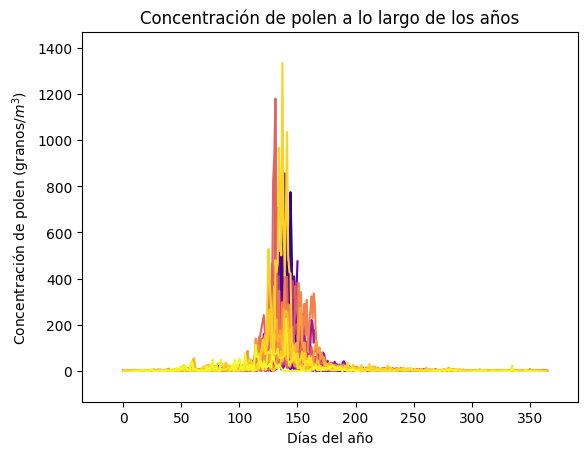

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios1.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Declarar variables
i=1
n=0

fig, ax = plt.subplots()

# Loop para representar cada año
while i<=23:
    # Tomar datos contando los bisiestos
    if i==23:
        dias=np.arange(364)
        concentracion=datos[n:n+364,4]
    else:
        if i==4 or i==8 or i==12 or i==16 or i==20:
            dias=np.arange(366)
            concentracion=datos[n:n+366,4]
        else:
            dias=np.arange(365)
            concentracion=datos[n:n+365,4]

    # Defino el año en un string
    ano=2000+i
    ano_str=str(ano)

    # Comandos para dar un color a cada año
    colormap = plt.cm.plasma
    color=colormap(i / 23)

    # Crear la figura y los ejes
    plt.plot(dias, concentracion, linestyle='-', color=color, label=ano_str)

    # Etiquetas y título
    ax.set_xlabel('Días del año')
    ax.set_ylabel(r'Concentración de polen (granos/$m^3$)')
    ax.set_ylim(top=max(datos[:,4]) * 1.1)
    ax.set_ylim(bottom=-max(datos[:,4]) * 0.1)
    ax.set_xlim(right=356*1.1)
    ax.set_xlim(left=-356*0.1)
    ax.set_title('Concentración de polen a lo largo de los años')

    # Aumento el año
    if i==4 or i==8 or i==12 or i==16 or i==20:
        n=n+1
    n=n+365
    i=i+1

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Todos los años juntos días-concentración.png")

## Representación Días/Concentración por años

<ipython-input-5-42a29a0c1cc2>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


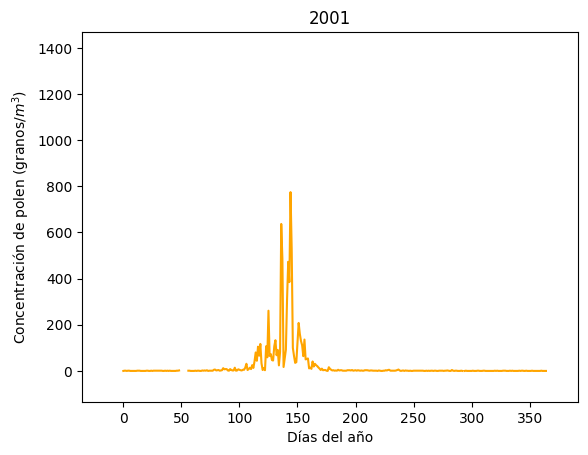

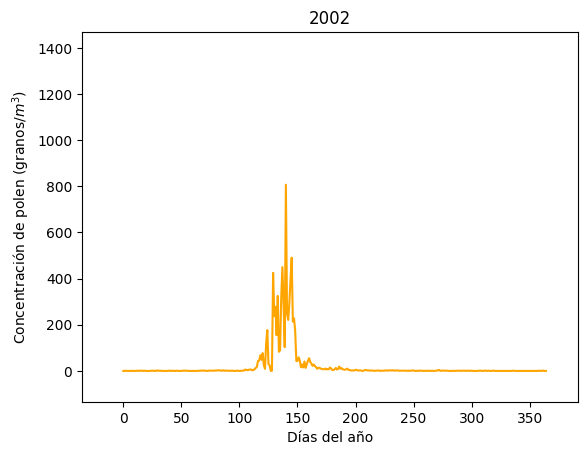

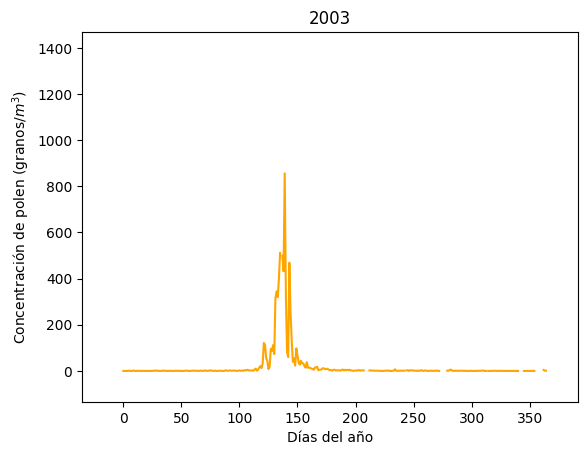

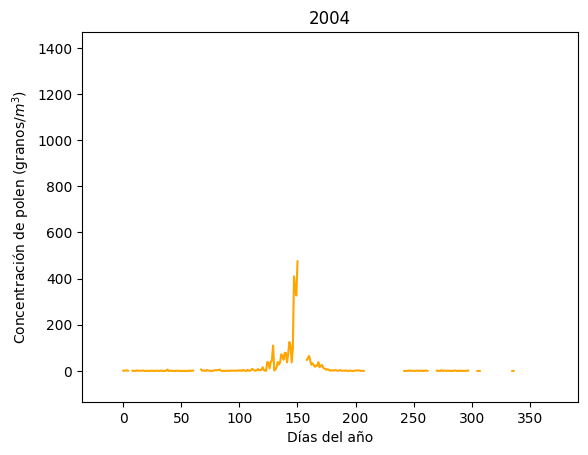

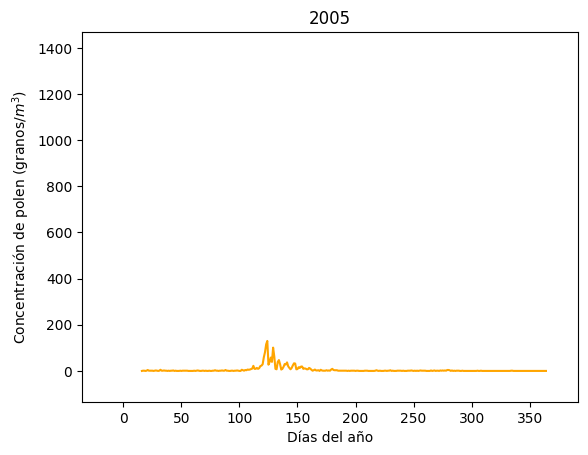

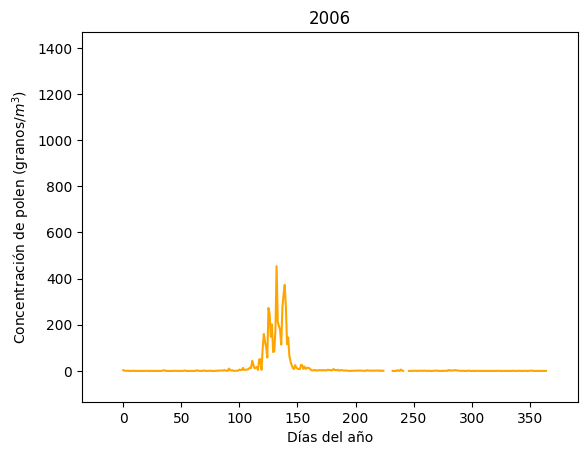

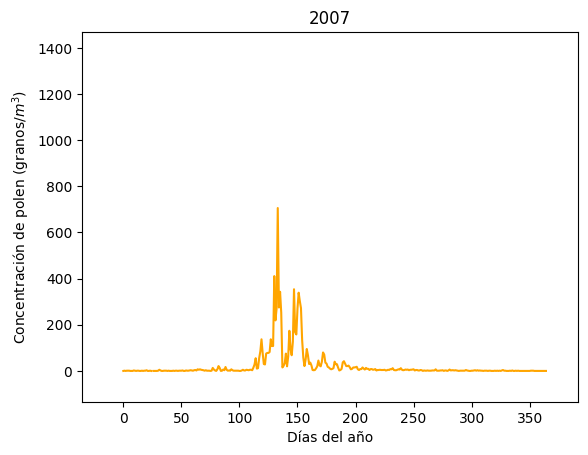

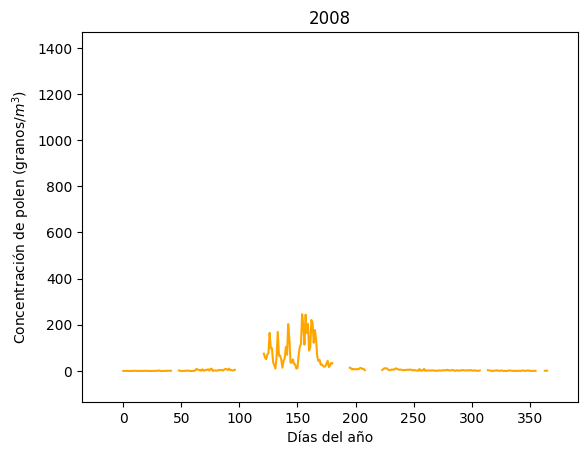

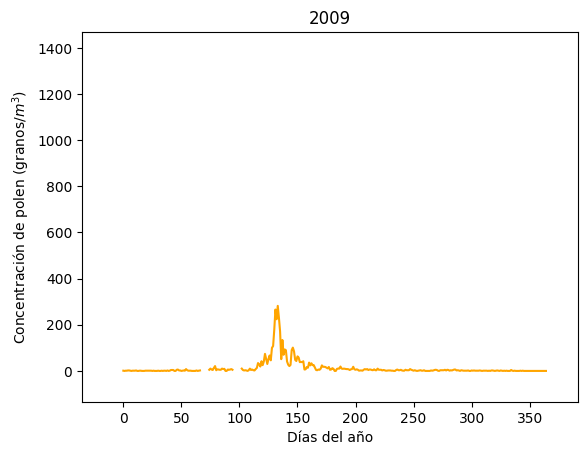

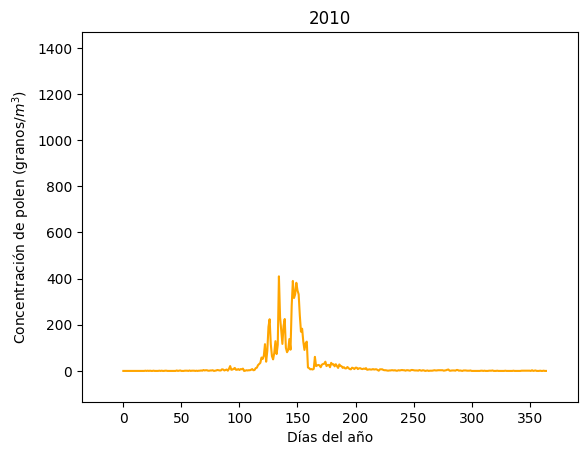

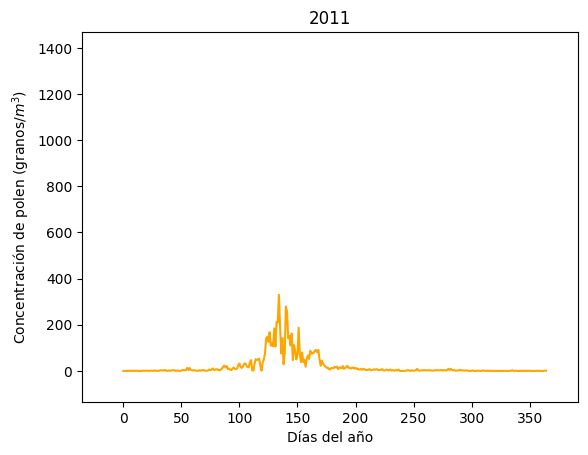

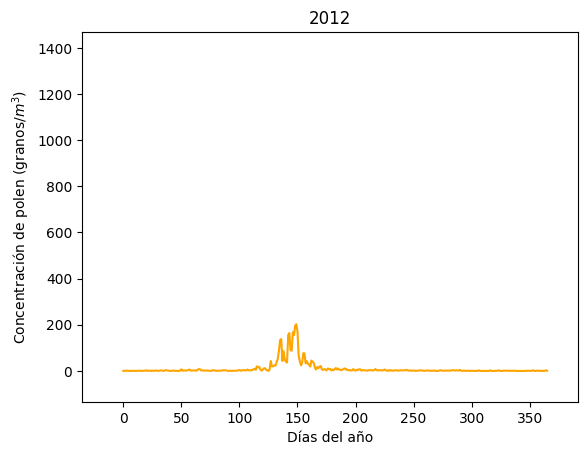

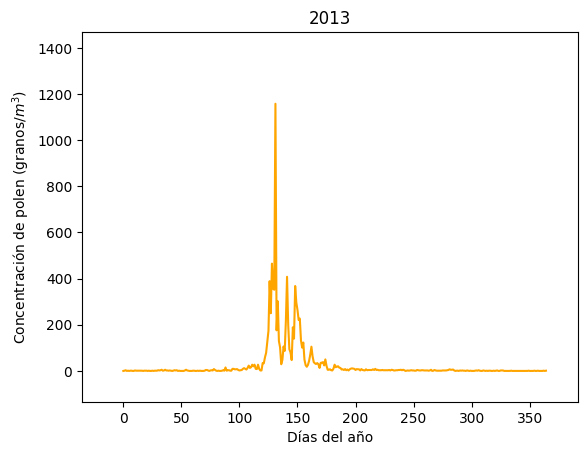

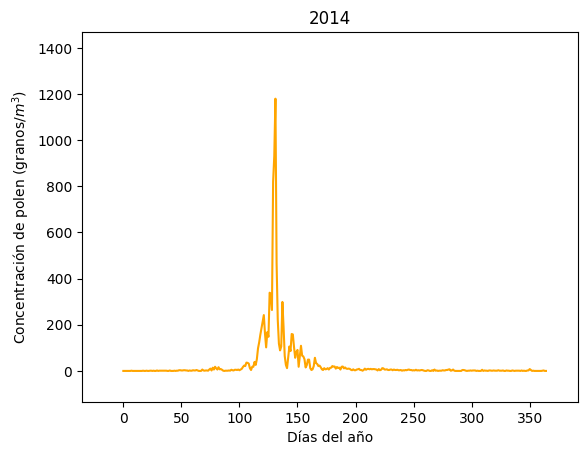

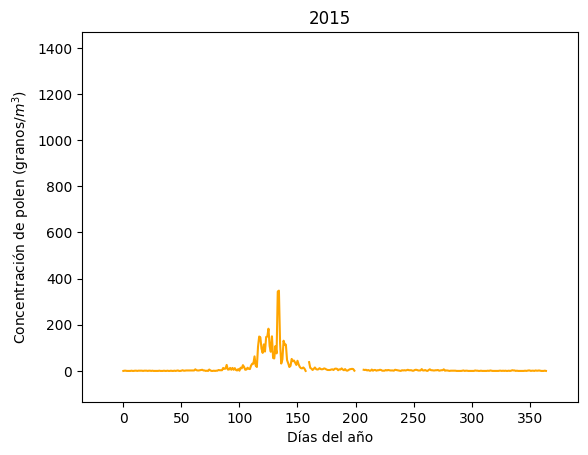

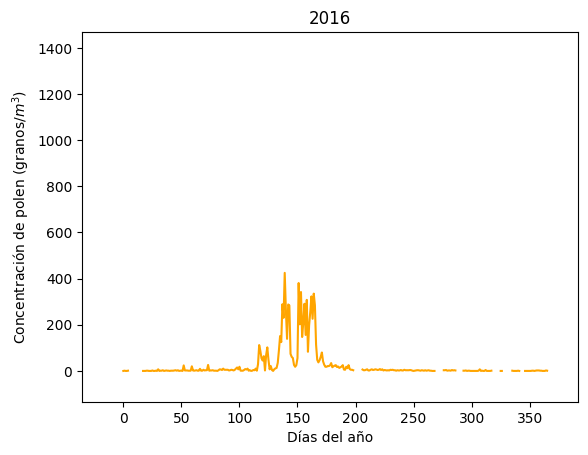

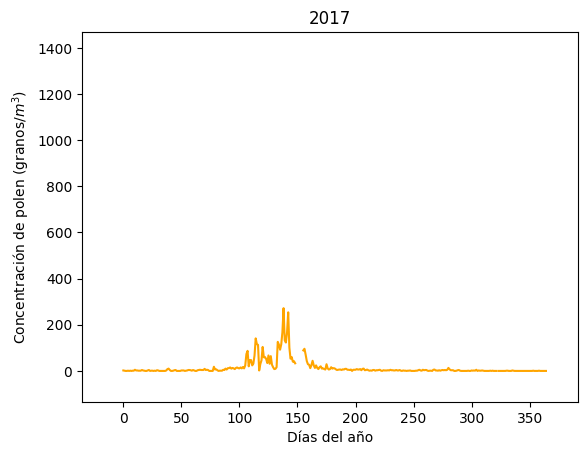

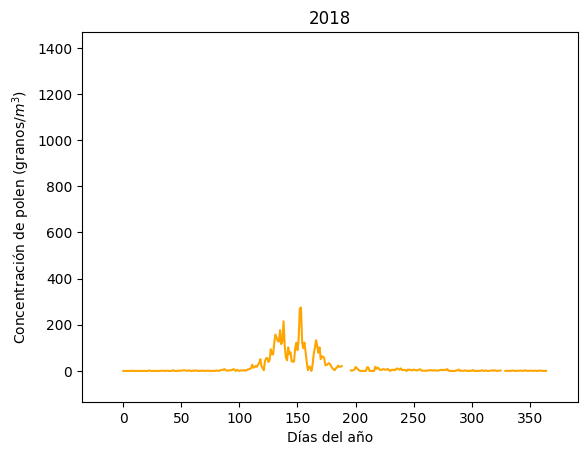

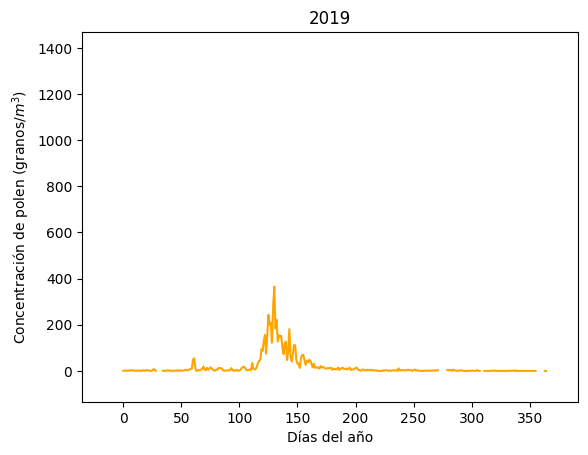

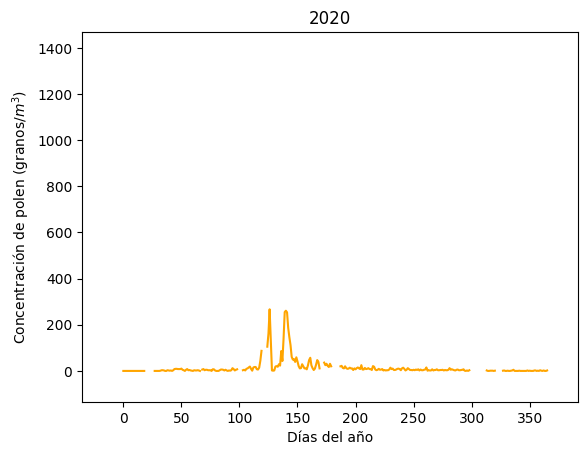

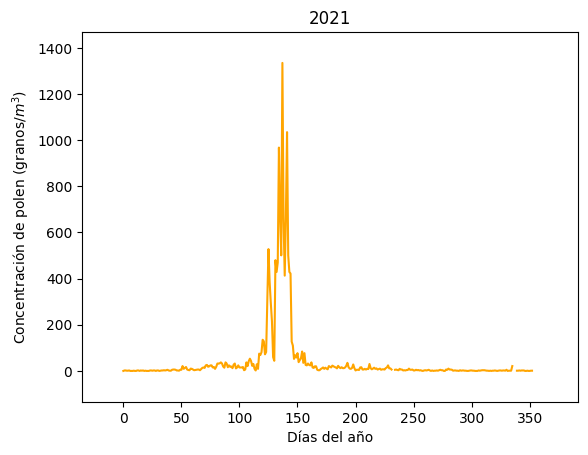

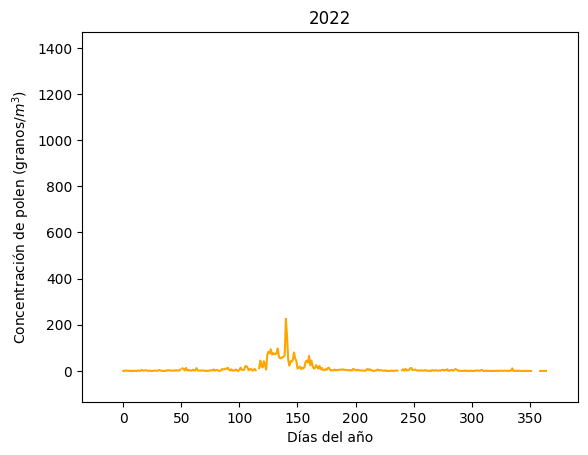

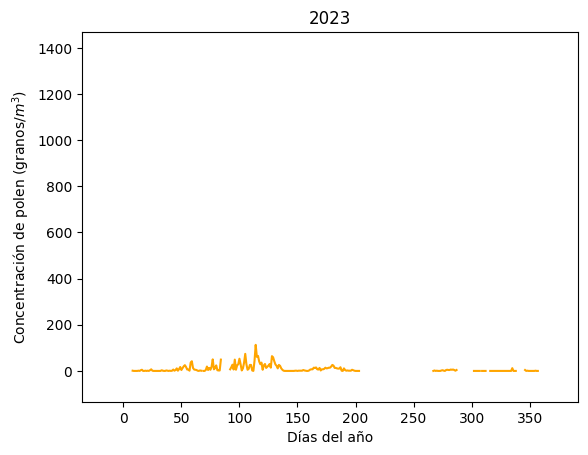

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios1.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Declarar variables
i=1
n=0

# Loop para representar cada año
while i<=23:
    # Tomar datos contando los bisiestos
    if i==23:
        dias=np.arange(364)
        concentracion=datos[n:n+364,4]
    else:
        if i==4 or i==8 or i==12 or i==16 or i==20:
            dias=np.arange(366)
            concentracion=datos[n:n+366,4]
        else:
            dias=np.arange(365)
            concentracion=datos[n:n+365,4]

    # Crear la figura y los ejes
    fig, ax = plt.subplots()
    plt.plot(dias, concentracion, linestyle='-', color='orange', label='Concentración de polen')

    # Etiquetas y título
    ax.set_xlabel('Días del año')
    ax.set_ylabel(r'Concentración de polen (granos/$m^3$)')
    ax.set_ylim(top=max(datos[:,4]) * 1.1)
    ax.set_ylim(bottom=-max(datos[:,4]) * 0.1)
    ax.set_xlim(right=356*1.1)
    ax.set_xlim(left=-356*0.1)
    ano=2000+i
    ano_str=str(ano)
    ax.set_title(ano_str)
    #ax.legend()
    #plt.xticks(rotation=45)

    # Guardar el gráfico
    plt.savefig("/content/drive/MyDrive/TFG/imagenes/" + ano_str + ".png")

    # Aumento el año
    if i==4 or i==8 or i==12 or i==16 or i==20:
        n=n+1
    n=n+365
    i=i+1

Se observa que varios años tienen dados incompletos, se decide quitar los años 2004, 2008 y 2023.

El objetivo es predecir la concentración de polen por lo que se van a usar el ~75% de los datos disponibles para entrenar nuestra (red neuronal) e intentar predecir el resto del ~25%.
Se van a usar los años 2001-2016 para intentar predecir los años 2017-2023.

Para iniciar, se decide representar Días/Concentración

Para justifiarlo, voy a decir que voy a eliminar años que tienen menos del 85% de los datos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios1.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Declarar variables
i=1
n=0

# Loop para representar cada año
while i<=23:
    # Tomar datos contando los bisiestos
    if i==23:
        dias=np.arange(364)
        concentracion=datos[n:n+364,4]
    else:
        if i==4 or i==8 or i==12 or i==16 or i==20:
            dias=np.arange(366)
            concentracion=datos[n:n+366,4]
        else:
            dias=np.arange(365)
            concentracion=datos[n:n+365,4]

    # Comprobar porcentaje de datos
    num_nan = np.isnan(concentracion).sum()
    num_dias = len(dias)
    porcentaje = num_nan/num_dias*100

    if porcentaje > 15:
      validez = 'no es valido'
    else:
      validez = 'es valido'

    ano=2000+i
    ano_str=str(ano)
    print('El año ' + ano_str + ' ' + validez)

    # Aumento el año
    if i==4 or i==8 or i==12 or i==16 or i==20:
        n=n+1
    n=n+365
    i=i+1

El año 2001 es valido
El año 2002 es valido
El año 2003 es valido
El año 2004 no es valido
El año 2005 es valido
El año 2006 es valido
El año 2007 es valido
El año 2008 no es valido
El año 2009 es valido
El año 2010 es valido
El año 2011 es valido
El año 2012 es valido
El año 2013 es valido
El año 2014 es valido
El año 2015 es valido
El año 2016 es valido
El año 2017 es valido
El año 2018 es valido
El año 2019 es valido
El año 2020 es valido
El año 2021 es valido
El año 2022 es valido
El año 2023 no es valido


## Mapa de datos Temperatura máxima - Concentración

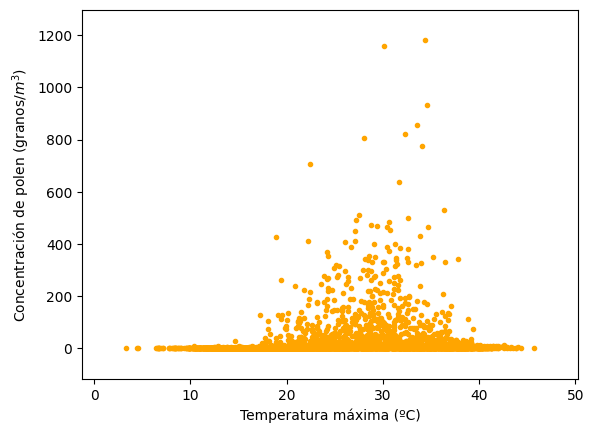

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios_Reducido.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Cantidad de días estudiados 2001-2015 excluyendo 2004 y 2008
d=4756

# Tomar datos contando los bisiestos
concentracion=datos[0:d,4]
T_max=datos[0:d,5]

# Crear la figura y los ejes
fig, ax = plt.subplots()
plt.plot(T_max, concentracion, linestyle='',marker='.', color='orange')

# Etiquetas y título
ax.set_xlabel('Temperatura máxima (ºC)')
ax.set_ylabel(r'Concentración de polen (granos/$m^3$)')
ax.set_ylim(top=max(datos[0:d,4]) * 1.1)
ax.set_ylim(bottom=-max(datos[0:d,4]) * 0.1)
ax.set_xlim(right=max(datos[0:d,5]) * 1.1)
ax.set_xlim(left=min(datos[0:d,5])-max(datos[0:d,5]) * 0.1)

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/T_max-concentración.png")

## Mapa de datos - Temperatura mínima - Concentración

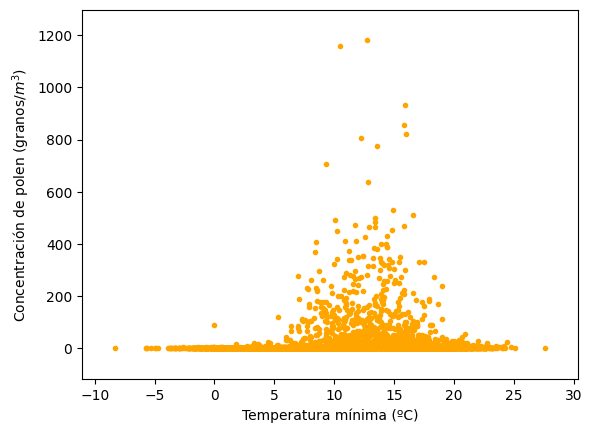

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios_Reducido.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Cantidad de días estudiados 2001-2015 excluyendo 2004 y 2008
d=4756

# Tomar datos contando los bisiestos
concentracion=datos[0:d,4]
T_min=datos[0:d,6]

# Crear la figura y los ejes
fig, ax = plt.subplots()
plt.plot(T_min, concentracion, linestyle='',marker='.', color='orange')

# Etiquetas y título
ax.set_xlabel('Temperatura mínima (ºC)')
ax.set_ylabel(r'Concentración de polen (granos/$m^3$)')
ax.set_ylim(top=max(datos[0:d,4]) * 1.1)
ax.set_ylim(bottom=-max(datos[0:d,4]) * 0.1)
ax.set_xlim(right=max(datos[0:d,6]) * 1.1)
ax.set_xlim(left=min(datos[0:d,6]) - max(datos[0:d,6]) * 0.1)

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/T_min-concentración.png")

## Mapa de datos - Temperatura media - Concentración

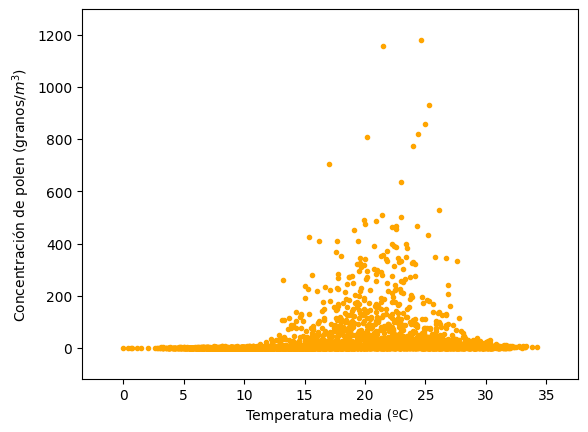

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios_Reducido.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Cantidad de días estudiados 2001-2015 excluyendo 2004 y 2008
d=4756

# Tomar datos contando los bisiestos
concentracion=datos[0:d,4]
T_media=datos[0:d,7]

# Crear la figura y los ejes
fig, ax = plt.subplots()
plt.plot(T_media, concentracion, linestyle='',marker='.', color='orange')

# Etiquetas y título
ax.set_xlabel('Temperatura media (ºC)')
ax.set_ylabel(r'Concentración de polen (granos/$m^3$)')
ax.set_ylim(top=max(datos[0:d,4]) * 1.1)
ax.set_ylim(bottom=-max(datos[0:d,4]) * 0.1)
ax.set_xlim(right=max(datos[0:d,7]) * 1.1)
ax.set_xlim(left=min(datos[0:d,7]) - max(datos[0:d,7]) * 0.1)

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/T_media-concentración.png")

## Mapa de datos - Humedad relativa - Concentración

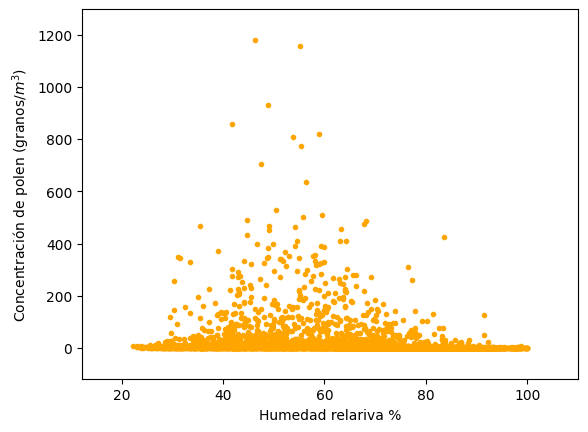

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios_Reducido.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Cantidad de días estudiados 2001-2015 excluyendo 2004 y 2008
d=4756

# Tomar datos contando los bisiestos
concentracion=datos[0:d,4]
humedad=datos[0:d,8]

# Crear la figura y los ejes
fig, ax = plt.subplots()
plt.plot(humedad, concentracion, linestyle='',marker='.', color='orange')

# Etiquetas y título
ax.set_xlabel('Humedad relariva %')
ax.set_ylabel(r'Concentración de polen (granos/$m^3$)')
ax.set_ylim(top=max(datos[0:d,4]) * 1.1)
ax.set_ylim(bottom=-max(datos[0:d,4]) * 0.1)
ax.set_xlim(right=max(datos[0:d,8]) * 1.1)
ax.set_xlim(left=min(datos[0:d,8]) - max(datos[0:d,8]) * 0.1)

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/humedad-concentración.png")

## Mapa de datos - Dirección del viento - Concentración

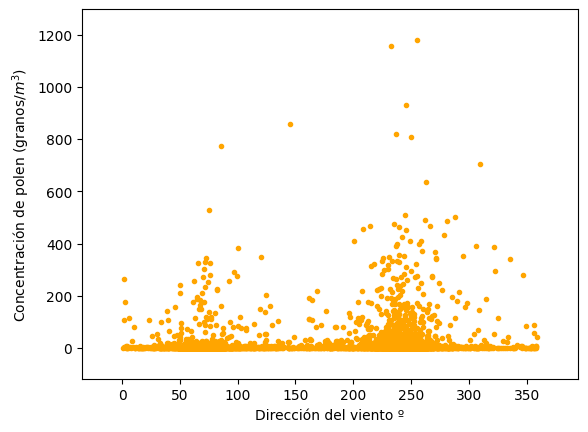

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios_Reducido.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Cantidad de días estudiados 2001-2015 excluyendo 2004 y 2008
d=4756

# Tomar datos contando los bisiestos
concentracion=datos[0:d,4]
viento=datos[0:d,9]

# Crear la figura y los ejes
fig, ax = plt.subplots()
plt.plot(viento, concentracion, linestyle='',marker='.', color='orange')

# Etiquetas y título
ax.set_xlabel('Dirección del viento º')
ax.set_ylabel(r'Concentración de polen (granos/$m^3$)')
ax.set_ylim(top=max(datos[0:d,4]) * 1.1)
ax.set_ylim(bottom=-max(datos[0:d,4]) * 0.1)
ax.set_xlim(right=max(datos[0:d,9]) * 1.1)
ax.set_xlim(left=min(datos[0:d,9]) - max(datos[0:d,9]) * 0.1)

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/viento-concentración.png")

Parece tener sentido que haya más concentración de polen si el viento sopla desde el Norte donde hay bosques.
Que también haya más concentración cuando sopla desde el sur es curioso, mirando google maps no parece que haya bosques en el sur.

## Mapa de datos - Precipitación Concentración

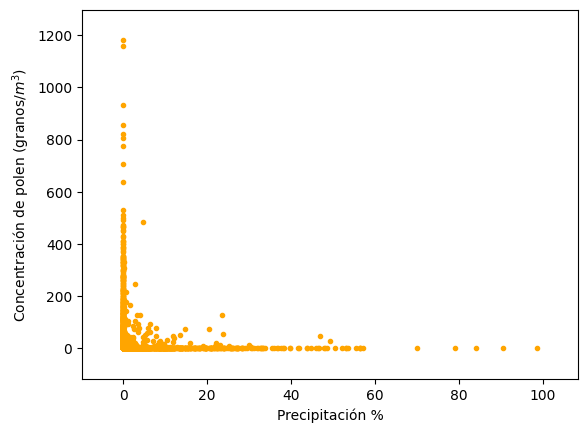

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios_Reducido.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Cantidad de días estudiados 2001-2015 excluyendo 2004 y 2008
d=4756

# Tomar datos contando los bisiestos
concentracion=datos[0:d,4]
precipitación=datos[0:d,10]

# Crear la figura y los ejes
fig, ax = plt.subplots()
plt.plot(precipitación, concentracion, linestyle='',marker='.', color='orange')

# Etiquetas y título
ax.set_xlabel('Precipitación %')
ax.set_ylabel(r'Concentración de polen (granos/$m^3$)')
ax.set_ylim(top=max(datos[0:d,4]) * 1.1)
ax.set_ylim(bottom=-max(datos[0:d,4]) * 0.1)
ax.set_xlim(right=max(datos[0:d,10]) * 1.1)
ax.set_xlim(left=min(datos[0:d,10]) - max(datos[0:d,10]) * 0.1)

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/precipitación-concentración.png")

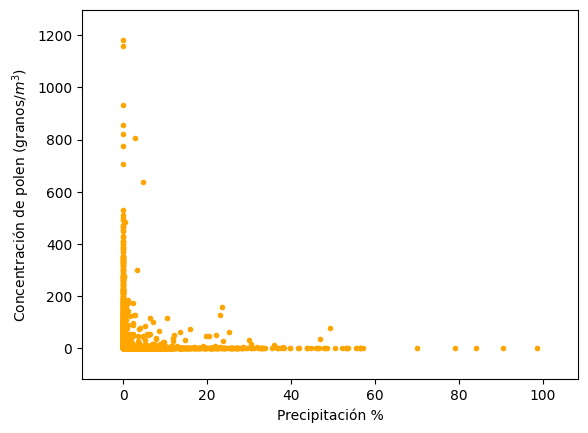

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios_Reducido.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Cantidad de días estudiados 2001-2015 excluyendo 2004 y 2008
d=4756

# Tomar datos contando los bisiestos
concentracion=datos[0:d,4]
precipitación=datos[1:d+1,10]

# Crear la figura y los ejes
fig, ax = plt.subplots()
plt.plot(precipitación, concentracion, linestyle='',marker='.', color='orange')

# Etiquetas y título
ax.set_xlabel('Precipitación %')
ax.set_ylabel(r'Concentración de polen (granos/$m^3$)')
ax.set_ylim(top=max(datos[0:d,4]) * 1.1)
ax.set_ylim(bottom=-max(datos[0:d,4]) * 0.1)
ax.set_xlim(right=max(datos[1:d+1,10]) * 1.1)
ax.set_xlim(left=min(datos[1:d+1,10]) - max(datos[1:d+1,10]) * 0.1)

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/precipitación_dia_siguiente-concentración.png")

## Mapa de datos - Velocidad del viento

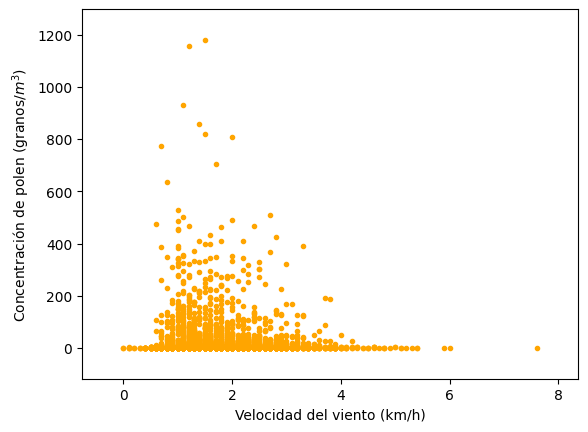

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios_Reducido.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Cantidad de días estudiados 2001-2015 excluyendo 2004 y 2008
d=4756

# Tomar datos contando los bisiestos
concentracion=datos[0:d,4]
velocidad=datos[0:d,11]

# Crear la figura y los ejes
fig, ax = plt.subplots()
plt.plot(velocidad, concentracion, linestyle='',marker='.', color='orange')

# Etiquetas y título
ax.set_xlabel('Velocidad del viento (km/h)')
ax.set_ylabel(r'Concentración de polen (granos/$m^3$)')
ax.set_ylim(top=max(datos[0:d,4]) * 1.1)
ax.set_ylim(bottom=-max(datos[0:d,4]) * 0.1)
ax.set_xlim(right=max(datos[0:d,11]) * 1.1)
ax.set_xlim(left=min(datos[0:d,11]) - max(datos[0:d,11]) * 0.1)

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/velocidad del viento-concentración.png")

## Velocidad, dirección y frecuencia del viento(Wind rose)

In [ ]:
pip install numpy matplotlib windrose

In [ ]:
pip install cartopy windrose

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 72.9 MB/s eta 0:00:00


Frecuencia del viento

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from windrose import WindroseAxes

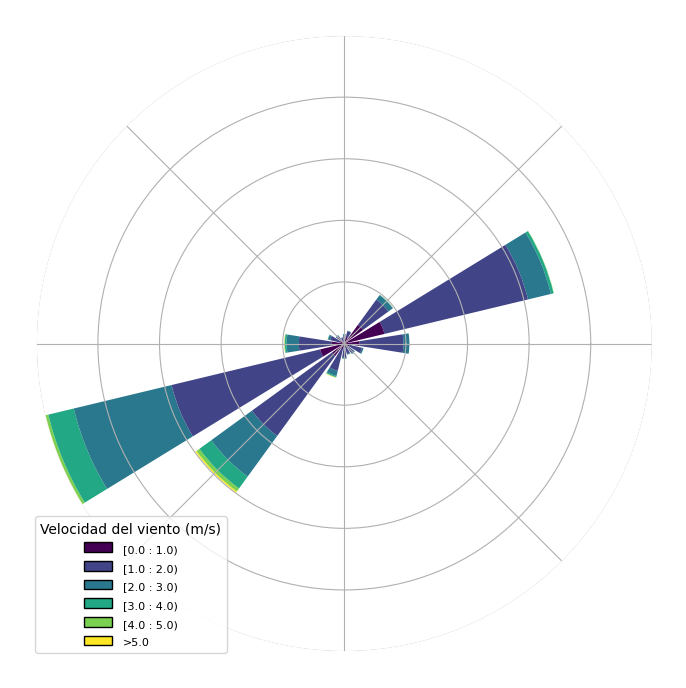

In [ ]:
# Leer los datos ya limpiados y reducidos desde un archivo excel
datos_reducidos = pd.read_excel("/content/drive/MyDrive/TFG/datos_reducidos.xlsx")

# Sample Data (Replace with Your Own Data)
wind_directions = datos_reducidos['Dirección del viento (º)']  # Wind directions in degrees (0-360)
wind_speeds = datos_reducidos['Velocidad del viento'] # Wind speeds (e.g., m/s)

# Define Windrose Axes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="windrose")

# Plot the Wind Rose
ax.bar(
    wind_directions, wind_speeds,
    bins=[0, 1, 2, 3, 4, 5],  # Wind speed bins
)

# Set spines (borders) to white
for spine in ax.spines.values():
    spine.set_color('white')

ax.tick_params(axis='x', colors='white')

# Add Legend and Labels
ax.set_legend(title="Velocidad del viento (m/s)")
ax.set_yticklabels("")

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/windrose.png", transparent=True)

En lugar de la velocidad del viento, se va a representar la concentración de polen.

Para ello, voy a crear un nuevo archivo excel donde voy a repetir los valores de los días por la concentración de polen de ese día. Va a ser un caos pero hay que intentarlo.

La lógica es que el módulo windrose calcula la probabilidad por el número de filas que tienen la misma dirrección del viento, es decir, cuantas más filas en una cierta dirección, más probabilidad en la gráfica.

Esto estima la probabilidad de tener viento en ciertas direcciónes pero lo que a mí me interesa es que muestre la probabilidad de polen por la dirreción del viento.

In [ ]:
# Leer los datos ya limpiados y reducidos desde un archivo excel
datos_reducidos = pd.read_excel("/content/drive/MyDrive/TFG/datos_reducidos.xlsx")

# Load the original Excel file
input_file = "/content/drive/MyDrive/TFG/datos_reducidos.xlsx"  # Change this to your input file path
output_file = "/content/drive/MyDrive/TFG/datos_representación_de_vientos.xlsx"  # Change this to your desired output file path
repeat_column = "Poaceae (concentraciones)"  # Change this to the name of your column containing the repeat count

# Read the Excel file
df = pd.read_excel(input_file)

# Create an empty list to store the repeated rows
repeated_rows = []

# Iterate through each row in the original dataframe
for _, row in df.iterrows():
    # Get the number of times to repeat from the specified column
    repeat_count = int(row[repeat_column])

    # Append the row to the new dataframe 'repeat_count' times
    for _ in range(repeat_count):
        repeated_rows.append(row)

# Create a new dataframe with the repeated rows
result_df = pd.DataFrame(repeated_rows)

# Save the new dataframe to a new Excel file
result_df.to_excel(output_file, index=False)

print(f"Created new Excel file with repeated rows at: {output_file}")

Created new Excel file with repeated rows at: /content/drive/MyDrive/TFG/datos_representación_de_vientos.xlsx


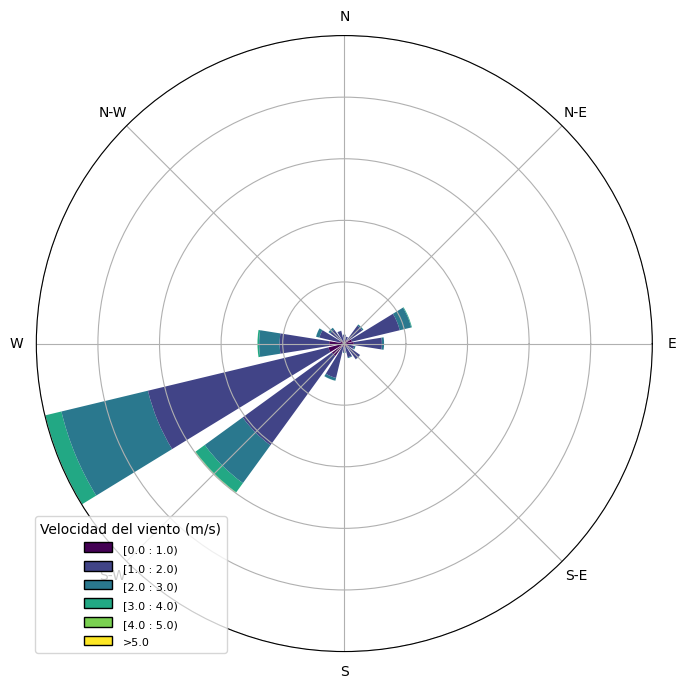

In [ ]:
# Leer los datos ya limpiados y reducidos desde un archivo excel
datos_reducidos = pd.read_excel("/content/drive/MyDrive/TFG/datos_representación_de_vientos.xlsx")

# Sample Data (Replace with Your Own Data)
wind_directions = datos_reducidos['Dirección del viento (º)']  # Wind directions in degrees (0-360)
wind_speeds = datos_reducidos['Velocidad del viento'] # Wind speeds (e.g., m/s)

# Define Windrose Axes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="windrose")

# Plot the Wind Rose
ax.bar(
    wind_directions, wind_speeds,
    #normed=True,
    bins=[0, 1, 2, 3, 4, 5],  # Wind speed bins
)

# Add Legend and Labels
ax.set_legend(title="Velocidad del viento (m/s)")
ax.set_yticklabels("")

# Show the Plot
plt.show()

Windrose sobre cordoba

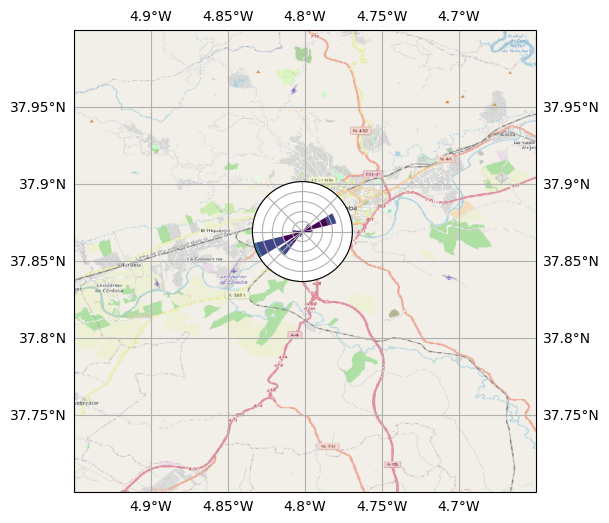

In [ ]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import windrose

# Leer los datos ya limpiados y reducidos desde un archivo excel
datos_reducidos = pd.read_excel("/content/drive/MyDrive/TFG/datos_reducidos.xlsx")

ws = datos_reducidos['Velocidad del viento'] # Wind speeds (e.g., m/s)
wd = datos_reducidos['Dirección del viento (º)']  # Wind directions in degrees (0-360)

minlon, maxlon, minlat, maxlat = (-4.65, -4.95, 37.7, 38)

proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
# Draw main ax on top of which we will add windroses
main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
main_ax.gridlines(draw_labels=True)
main_ax.coastlines()

request = cimgt.OSM()
main_ax.add_image(request, 12)

# Coordinates of the station we were measuring windspeed
cham_lon, cham_lat = (-4.801562045460348, 37.869151009277715)

# Inset axe it with a fixed size
wrax_cham = inset_axes(
    main_ax,
    width=1,  # size in inches
    height=1,  # size in inches
    loc="center",  # center bbox at given position
    bbox_to_anchor=(cham_lon, cham_lat),  # position of the axe
    bbox_transform=main_ax.transData,  # use data coordinate (not axe coordinate)
    axes_class=windrose.WindroseAxes,  # specify the class of the axe
)

wrax_cham.bar(wd, ws)
for ax in [wrax_cham]:
    ax.tick_params(labelleft=False, labelbottom=False)

# **Regresiones Lineales**

## Máximo de polen a través de los años

Mean squared error: 162111.00
Coefficient of determination: -0.04


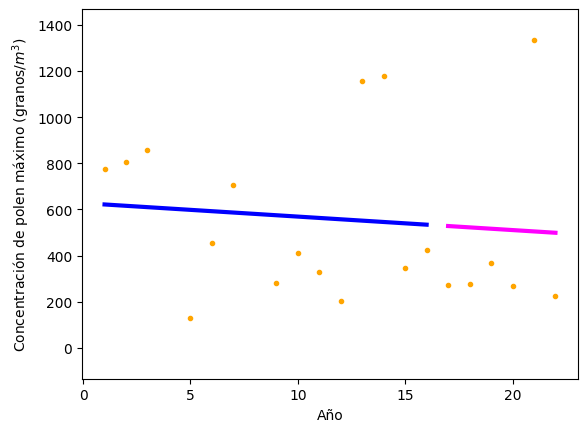

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios1.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Declarar vectores
anos= np.arange(1, 24, 1)
concentracion=np.zeros(23)

# Tomar datos contando los bisiestos e ignorando los años 2004, 2008, 2017 y 2023
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==4 or ano==8 or ano==12 or ano==16 or ano==20:
      concentracion[ano-1]=np.nanmax(datos[n:n+366,4])
      n=n+1
    else:
      concentracion[ano-1]=np.nanmax(datos[n:n+365,4])
  n=n+365
  ano=ano+1


# Reshape años porque le gusta más a Scitik Learn
anos2d=anos.reshape(-1,1)

# Eliminar años 2004, 2008 y 2023 para la regresión
concentracion[3]=np.nan
concentracion[7]=np.nan
concentracion[22]=np.nan

# Crear una máscara booleana para identificar filas sin NaN
mascara = ~np.isnan(concentracion[0:23])

# Filtrar anos2d y concentracion usando la máscara
anos2d_filtrado = anos2d[mascara]
concentracion_filtrado = concentracion[0:23][mascara]

# anos2d_filtrado queda tal que [[ 1] [ 2] [ 3] [ 5] [ 6] [ 7] [ 9] [10] [11] [12] [13] [14] [15] [16] [18] [19] [20] [21] [22]]

# Regresión lineal
regressor = LinearRegression().fit(anos2d_filtrado[0:14], concentracion_filtrado[0:14])

# Cálculo del error
y_pred = regressor.predict(anos2d_filtrado[14:20])

print(f"Mean squared error: {mean_squared_error(concentracion_filtrado[14:20], y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(concentracion_filtrado[14:20], y_pred):.2f}")

# Crear la figura y los ejes
fig, ax = plt.subplots()
plt.plot(anos, concentracion, linestyle='',marker='.', color='orange')
plt.plot(anos2d_filtrado[0:14], regressor.predict(anos2d_filtrado[0:14]), linewidth=3, color='blue',)
plt.plot(anos2d_filtrado[14:20], y_pred, linewidth=3, color='magenta',)

# Etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel(r'Concentración de polen máximo (granos/$m^3$)')
ax.set_ylim(top=max(datos[:,4]) * 1.1)
ax.set_ylim(bottom=-max(datos[:,4]) * 0.1)

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Máximo de polen cada año.png")

## Día en el que se tiene el máximo de polen

Mean squared error: 78.44
Coefficient of determination: -0.08


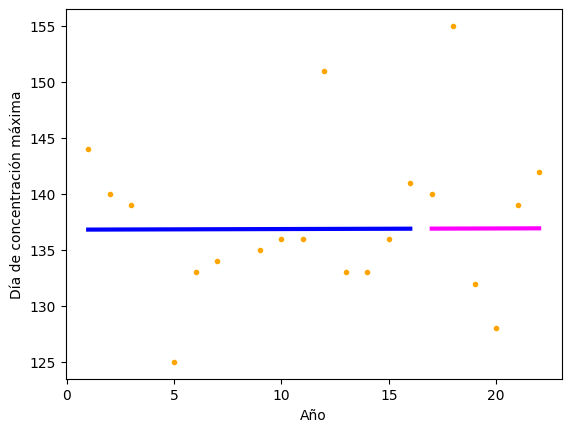

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios1.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Declarar vectores
anos= np.arange(1, 24, 1)
diamax=np.zeros(23)

# Tomar datos contando los bisiestos e ignorando los años 2004, 2008, 2017 y 2023
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==4 or ano==8 or ano==12 or ano==16 or ano==20:
      diamax[ano-1]=np.nanargmax(datos[n:n+366,4])
      n=n+1
    else:
      diamax[ano-1]=np.nanargmax(datos[n:n+365,4])
  n=n+365
  ano=ano+1


# Reshape años porque le gusta más a Scitik Learn
anos2d=anos.reshape(-1,1)

# Eliminar años 2004, 2008 y 2023 para la regresión
diamax[3]=np.nan
diamax[7]=np.nan
diamax[22]=np.nan

# Crear una máscara booleana para identificar filas sin NaN
mascara = ~np.isnan(diamax[0:23])

# Filtrar anos2d y diamax usando la máscara
anos2d_filtrado = anos2d[mascara]
diamax_filtrado = diamax[0:23][mascara]

# anos2d_filtrado queda tal que [[ 1] [ 2] [ 3] [ 5] [ 6] [ 7] [ 9] [10] [11] [12] [13] [14] [15] [16] [18] [19] [20] [21] [22]]

# Regresión lineal
regressor = LinearRegression().fit(anos2d_filtrado[0:14], diamax_filtrado[0:14])

# Cálculo del error
y_pred = regressor.predict(anos2d_filtrado[14:20])

print(f"Mean squared error: {mean_squared_error(diamax_filtrado[14:20], y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(diamax_filtrado[14:20], y_pred):.2f}")

# Crear la figura y los ejes
fig, ax = plt.subplots()
plt.plot(anos, diamax, linestyle='',marker='.', color='orange')
plt.plot(anos2d_filtrado[0:14], regressor.predict(anos2d_filtrado[0:14]), linewidth=3, color='blue',)
plt.plot(anos2d_filtrado[14:20], y_pred, linewidth=3, color='magenta',)

# Etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Día de concentración máxima')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Día en el que se obtiene el máximo de polen cada año.png")

## Regresión Día en que empieza la época de polen

Primero se ha decidide definir el día donde empieza la época de polen como el día donde a partir del cual el promedio de los siguentes 30 días superan los 10% del máximo de ese año y tenga al menos 50 gramos por metro cúbico debido que es a partir de este valor que síntomas de alergia pueden aperecer (referencia tomada de https://www.cun.es/enfermedades-tratamientos/enfermedades/alergia-polen)

Mean squared error: 55.46
Coefficient of determination: -0.42


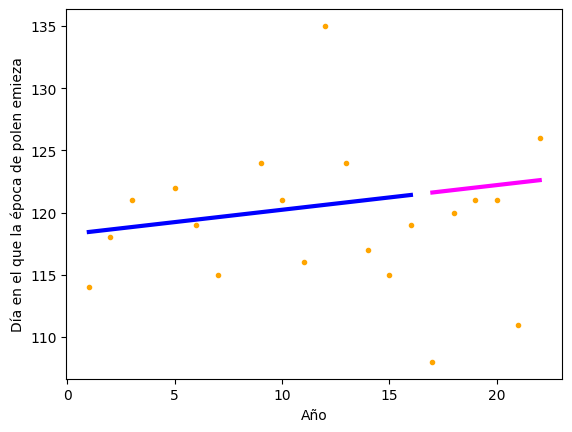

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios1.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Declarar vectores
anos= np.arange(1, 24, 1)
concentracion=np.zeros(23)
diaem=np.zeros(23)

# Tomar máximo del año contando los bisiestos e ignorando los años 2004, 2008, 2017 y 2023
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==4 or ano==8 or ano==12 or ano==16 or ano==20:
      concentracion[ano-1]=np.nanmax(datos[n:n+366,4])
      n=n+1
    else:
      concentracion[ano-1]=np.nanmax(datos[n:n+365,4])
  n=n+365
  ano=ano+1

# Tomar el día que empieza la época de polen
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==12 or ano==16 or ano==20:
      d=0
      while d<=366:
        if np.nanmean(datos[n+d:n+d+30, 4])>concentracion[ano-1]*0.1 and datos[n+d, 4]>50:
          diaem[ano-1]=d
          break
        d=d+1
      n=n+1
    else:
      d=0
      while d<=365:
        if np.nanmean(datos[n+d:n+d+30, 4])>concentracion[ano-1]*0.1 and datos[n+d, 4]>50:
          diaem[ano-1]=d
          break
        d=d+1
  n=n+365
  ano=ano+1

# Reshape años porque le gusta más a Scitik Learn
anos2d=anos.reshape(-1,1)

# Eliminar años 2004, 2008, 2017 y 2023 para la regresión
diaem[3]=np.nan
diaem[7]=np.nan
diaem[22]=np.nan

# Crear una máscara booleana para identificar filas sin NaN
mascara = ~np.isnan(diaem[0:23])

# Filtrar anos2d y diaem usando la máscara
anos2d_filtrado = anos2d[mascara]
diaem_filtrado = diaem[0:23][mascara]

# anos2d_filtrado queda tal que [[ 1] [ 2] [ 3] [ 5] [ 6] [ 7] [ 9] [10] [11] [12] [13] [14] [15] [16] [18] [19] [20] [21] [22]]

# Regresión lineal
regressor = LinearRegression().fit(anos2d_filtrado[0:14], diaem_filtrado[0:14])

# Cálculo del error
y_pred = regressor.predict(anos2d_filtrado[14:20])

print(f"Mean squared error: {mean_squared_error(diaem_filtrado[14:20], y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(diaem_filtrado[14:20], y_pred):.2f}")

# Crear la figura y los ejes
fig, ax = plt.subplots()
plt.plot(anos, diaem, linestyle='',marker='.', color='orange')
plt.plot(anos2d_filtrado[0:14], regressor.predict(anos2d_filtrado[0:14]), linewidth=3, color='blue',)
plt.plot(anos2d_filtrado[14:20], y_pred, linewidth=3, color='magenta',)

# Etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Día en el que la época de polen emieza')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Día de comienzo de la época de polen.png")

## Dia en el que empieza la época de polen representado junto a la concentración de cada año

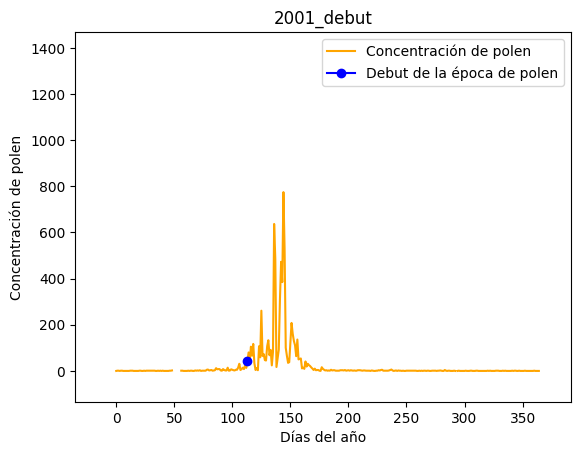

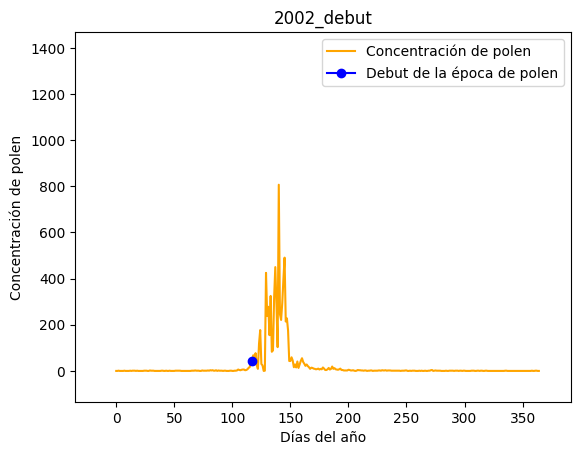

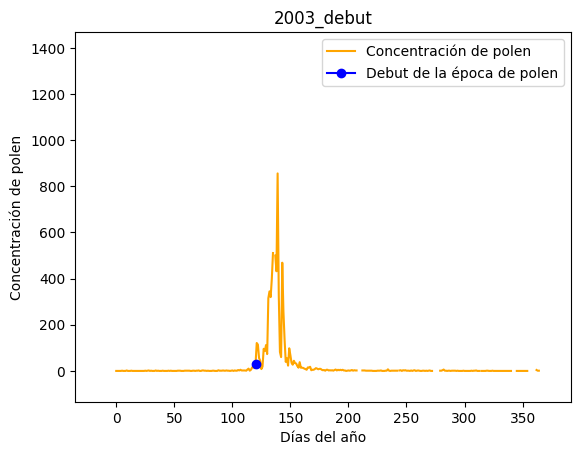

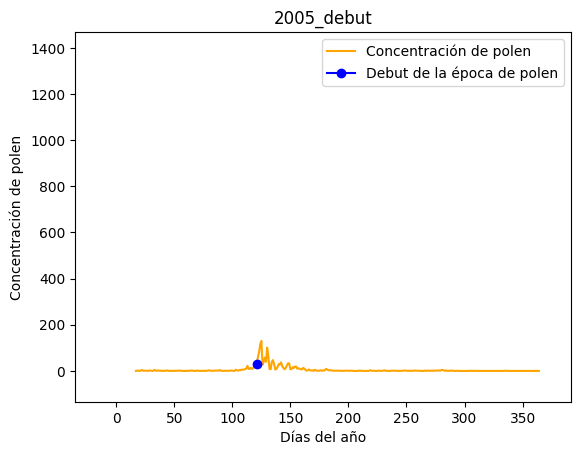

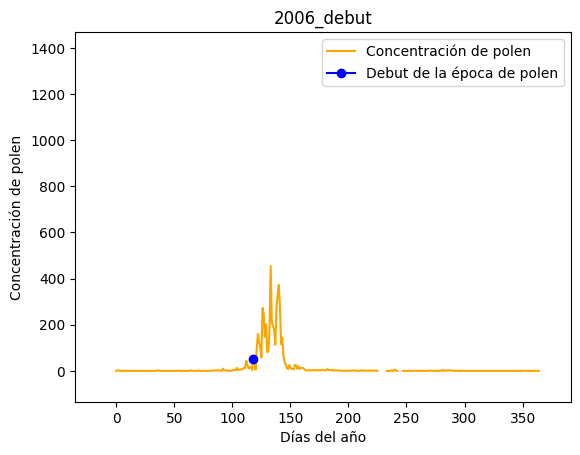

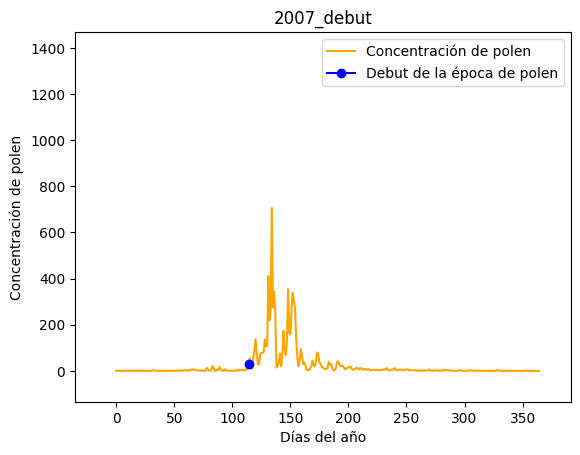

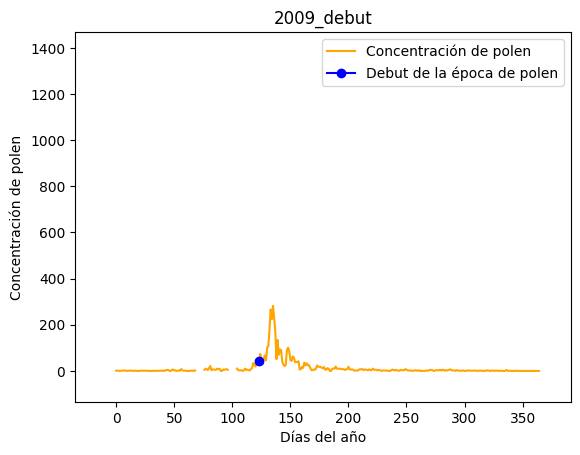

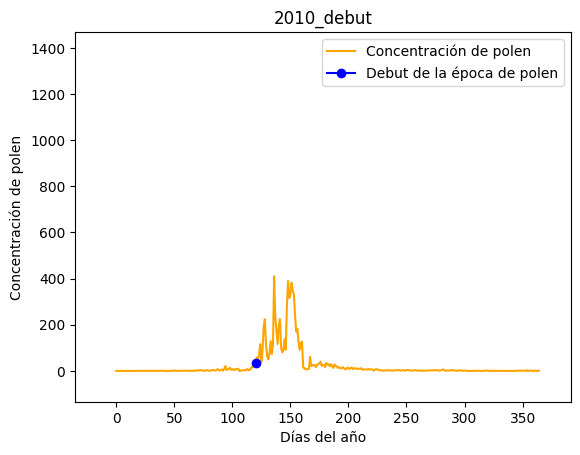

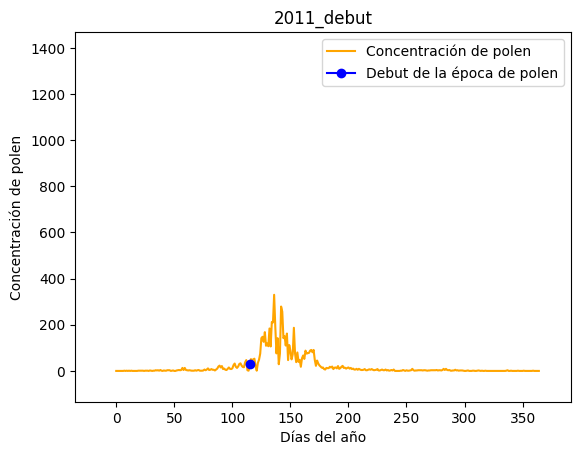

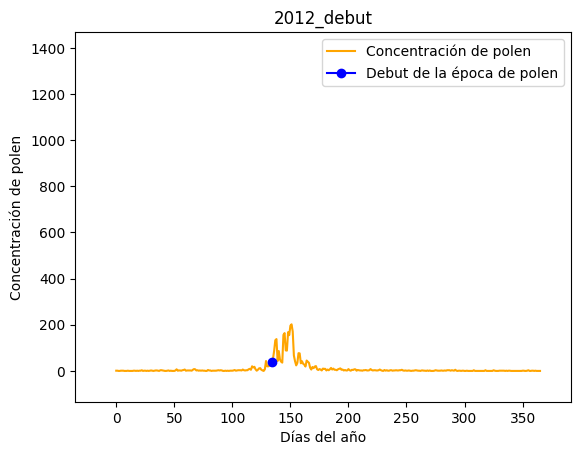

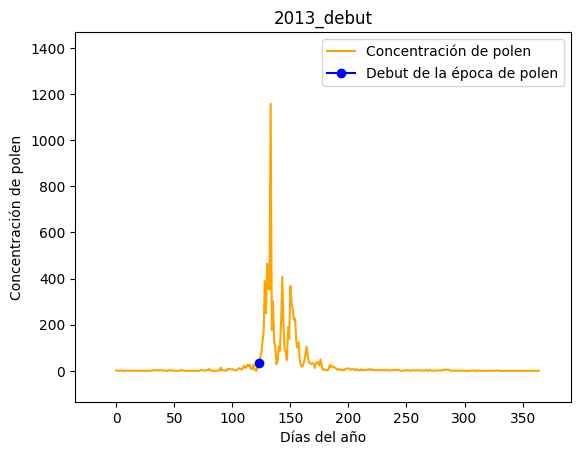

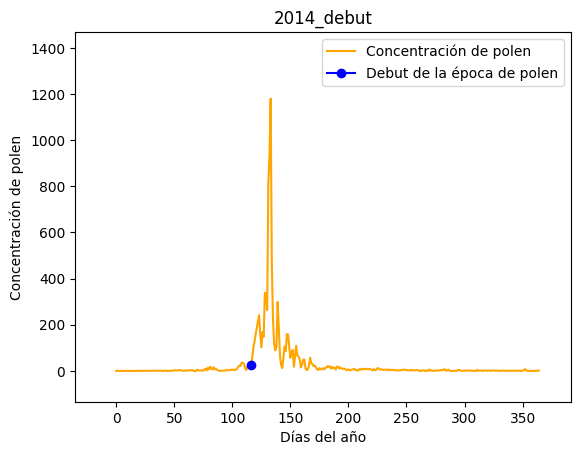

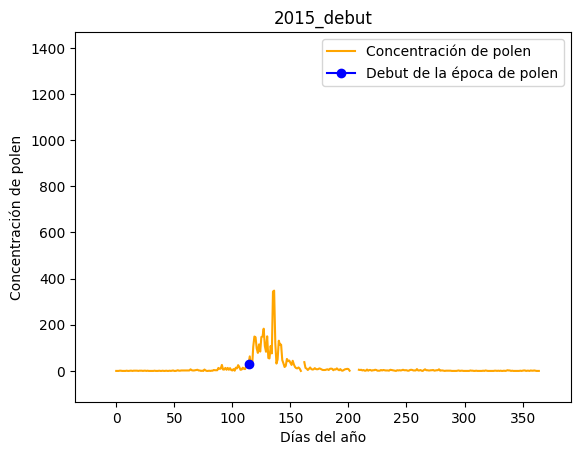

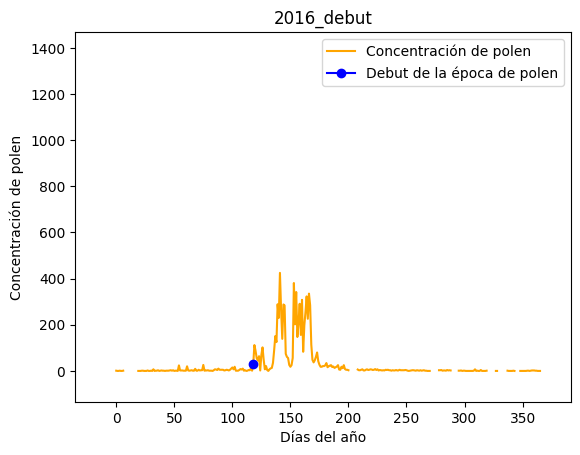

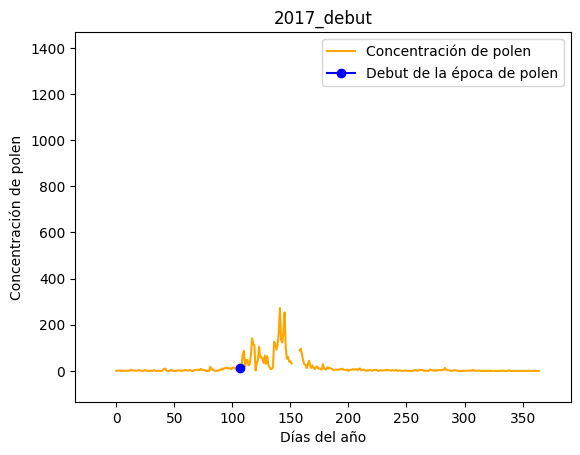

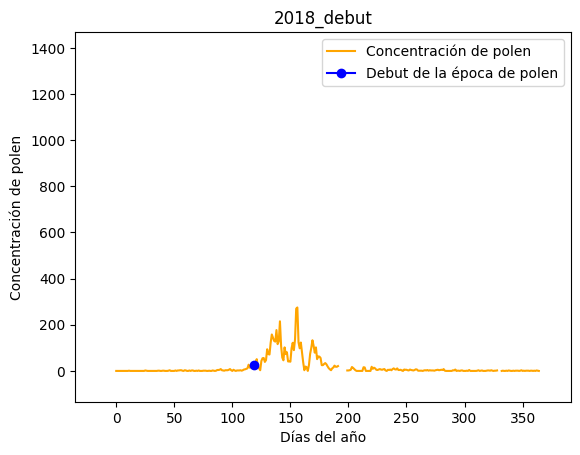

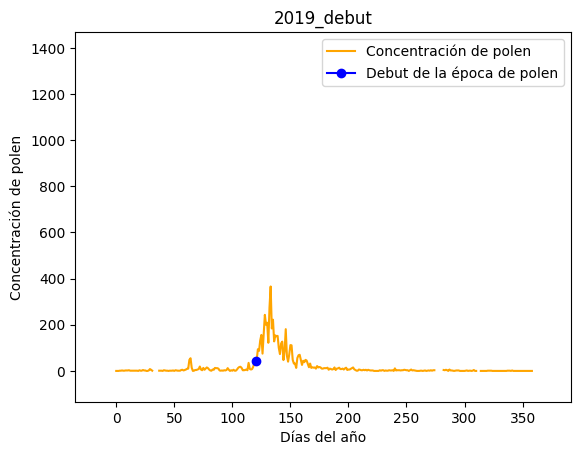

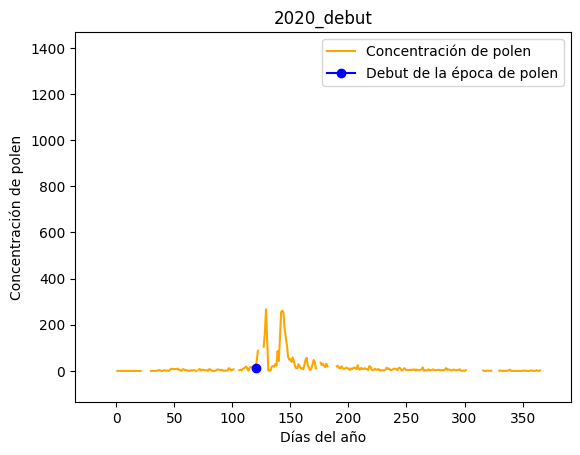

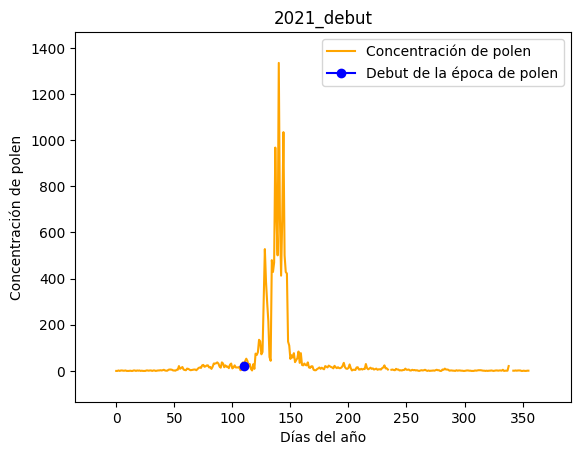

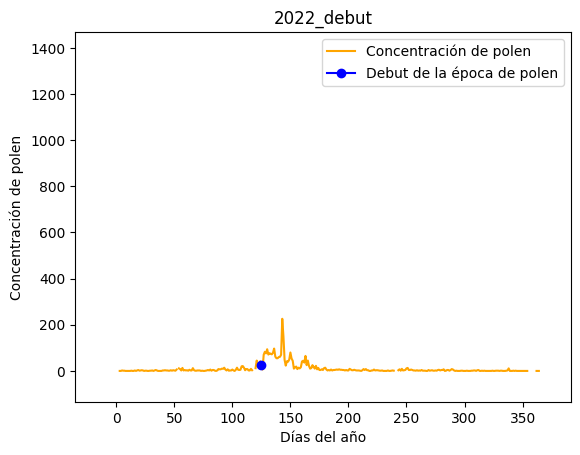

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios1.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Declarar vectores
anos= np.arange(1, 24, 1)
concentracion=np.zeros(23)
diaem=np.zeros(23)

# Tomar máximo del año contando los bisiestos e ignorando los años 2004, 2008, 2017 y 2023
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==12 or ano==16 or ano==20:
      concentracion[ano-1]=np.nanmax(datos[n:n+366,4])
      n=n+1
    else:
      concentracion[ano-1]=np.nanmax(datos[n:n+365,4])
  n=n+365
  ano=ano+1

# Tomar el día que empieza la época de polen
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==12 or ano==16 or ano==20:
      d=0
      while d<=366:
        if np.nanmean(datos[n+d:n+d+30, 4])>concentracion[ano-1]*0.1 and datos[n+d, 4]>50:
          diaem[ano-1]=d-1
          break
        d=d+1
      n=n+1
    else:
      d=0
      while d<=365:
        if np.nanmean(datos[n+d:n+d+30, 4])>concentracion[ano-1]*0.1 and datos[n+d, 4]>50:
          diaem[ano-1]=d-1
          break
        d=d+1
  n=n+365
  ano=ano+1

# Eliminar años 2004, 2008 y 2023 para la regresión
diaem[3]=np.nan
diaem[7]=np.nan
diaem[22]=np.nan

# Declarar variables
i=1
n=0

# Loop para representar cada año
while i<=22:
    # Me salto los años ignorados
    if i==4 or i==8:
      i=i+1
      n=n+365

    # Tomar datos contando los bisiestos
    if i==23:
        dias=np.arange(364)
        concentracion=datos[n:n+364,4]
    else:
        if i==4 or i==8 or i==12 or i==16 or i==20:
            dias=np.arange(366)
            concentracion=datos[n:n+366,4]
        else:
            dias=np.arange(365)
            concentracion=datos[n:n+365,4]

    # Crear la figura y los ejes
    fig, ax = plt.subplots()
    plt.plot(dias, concentracion, linestyle='-', color='orange', label='Concentración de polen')

    # Representar el día de comienzo calculado
    indice = int(diaem[i-1])
    plt.plot(indice, concentracion[indice], color='blue', marker='o', label='Debut de la época de polen')

    # Etiquetas y título
    ax.set_xlabel('Días del año')
    ax.set_ylabel('Concentración de polen')
    ax.set_ylim(top=max(datos[:,4]) * 1.1)
    ax.set_ylim(bottom=-max(datos[:,4]) * 0.1)
    ax.set_xlim(right=356*1.1)
    ax.set_xlim(left=-356*0.1)
    ano=2000+i
    ano_str=str(ano)
    ax.set_title(ano_str + "_debut")
    ax.legend()
    #plt.xticks(rotation=45)

    # Guardar el gráfico
    plt.savefig("/content/drive/MyDrive/TFG/imagenes/" + "debut_" + ano_str + ".png")

    # Aumento el año
    if i==4 or i==8 or i==12 or i==20:
        n=n+1
    n=n+365
    i=i+1

## Regresión Día en que termina la época de polen

Mean squared error: 77.24
Coefficient of determination: -1.11


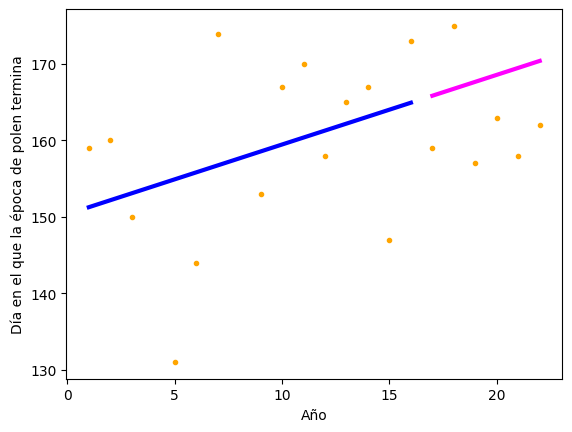

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios1.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Declarar vectores
anos= np.arange(1, 24, 1)
concentracion=np.zeros(23)
diaem=np.zeros(23)

# Tomar máximo del año contando los bisiestos e ignorando los años 2004, 2008 y 2023
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==4 or ano==8 or ano==12 or ano==16 or ano==20:
      concentracion[ano-1]=np.nanmax(datos[n:n+366,4])
      n=n+1
    else:
      concentracion[ano-1]=np.nanmax(datos[n:n+365,4])
  n=n+365
  ano=ano+1

# Tomar el día que empieza la época de polen
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==12 or ano==16 or ano==20:
      d=60
      while d<=366:
        if np.nanmean(datos[n+d-60:n+d, 4])>concentracion[ano-1]*0.1 and datos[n+d, 4]>50:
          diaem[ano-1]=d
          #break
        d=d+1
      n=n+1
    else:
      d=60
      while d<=365:
        if np.nanmean(datos[n+d-60:n+d, 4])>concentracion[ano-1]*0.1 and datos[n+d, 4]>50:
          diaem[ano-1]=d
          #break
        d=d+1
  n=n+365
  ano=ano+1

# Reshape años porque le gusta más a Scitik Learn
anos2d=anos.reshape(-1,1)

# Eliminar años 2004, 2008 y 2023 para la regresión
diaem[3]=np.nan
diaem[7]=np.nan
diaem[22]=np.nan

# Crear una máscara booleana para identificar filas sin NaN
mascara = ~np.isnan(diaem[0:23])

# Filtrar anos2d y diaem usando la máscara
anos2d_filtrado = anos2d[mascara]
diaem_filtrado = diaem[0:23][mascara]

# anos2d_filtrado queda tal que [[ 1] [ 2] [ 3] [ 5] [ 6] [ 7] [ 9] [10] [11] [12] [13] [14] [15] [16] [18] [19] [20] [21] [22]]

# Regresión lineal
regressor = LinearRegression().fit(anos2d_filtrado[0:14], diaem_filtrado[0:14])

# Cálculo del error
y_pred = regressor.predict(anos2d_filtrado[14:20])

print(f"Mean squared error: {mean_squared_error(diaem_filtrado[14:20], y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(diaem_filtrado[14:20], y_pred):.2f}")

# Crear la figura y los ejes
fig, ax = plt.subplots()
plt.plot(anos, diaem, linestyle='',marker='.', color='orange')
plt.plot(anos2d_filtrado[0:14], regressor.predict(anos2d_filtrado[0:14]), linewidth=3, color='blue',)
plt.plot(anos2d_filtrado[14:20], y_pred, linewidth=3, color='magenta',)

# Etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Día en el que la época de polen termina')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Día de fin de la época de polen.png")

## Día que termina la época de polen representado junto a la concentración de cada año

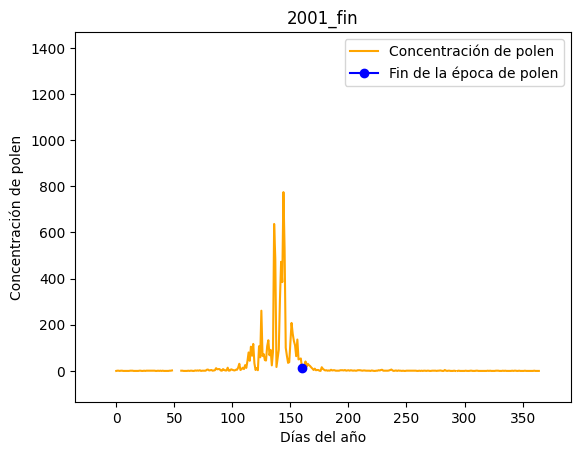

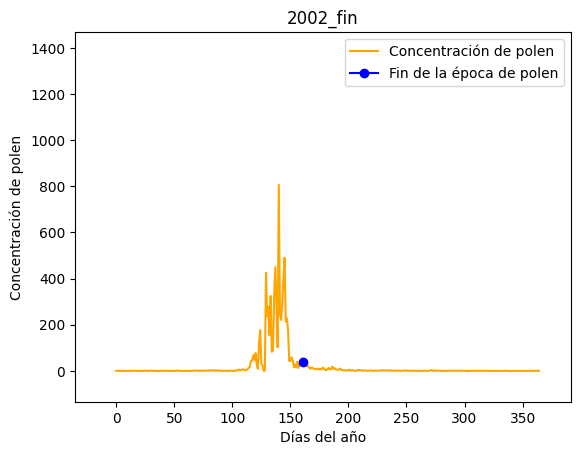

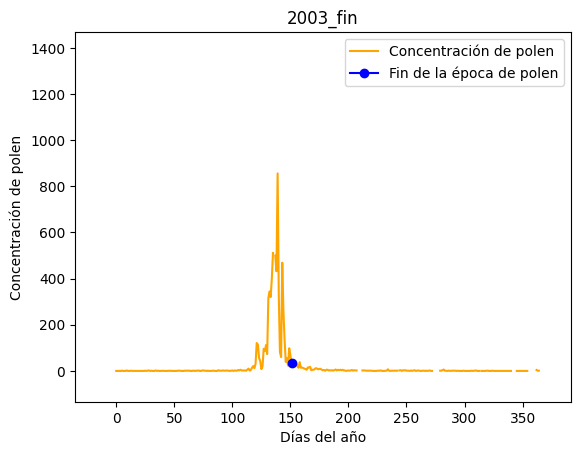

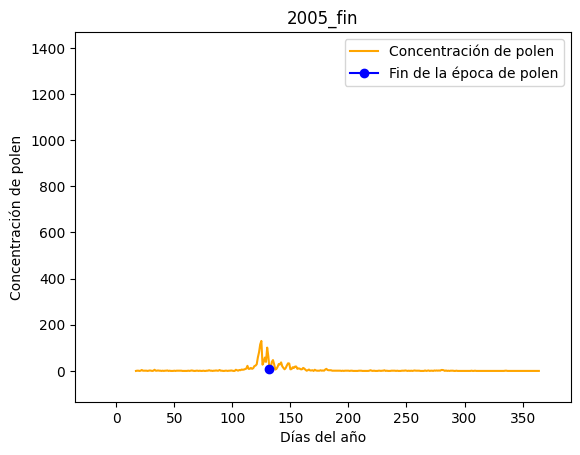

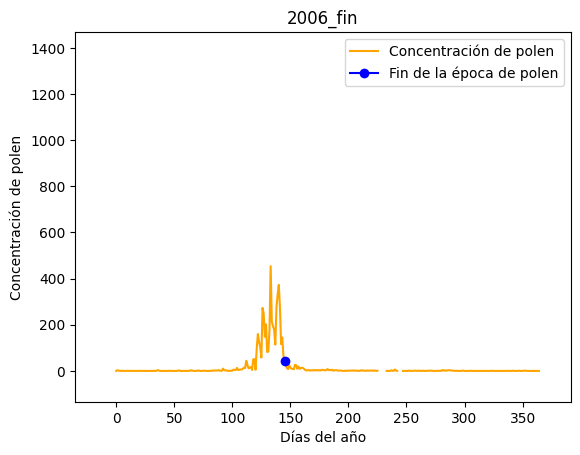

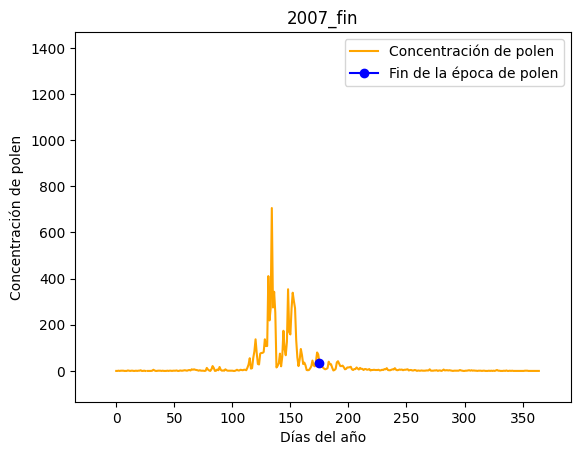

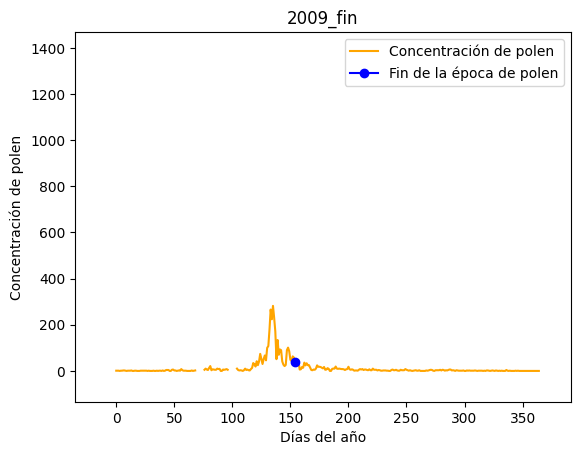

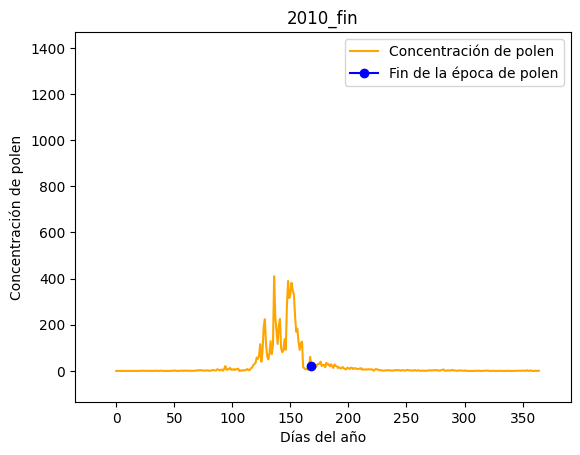

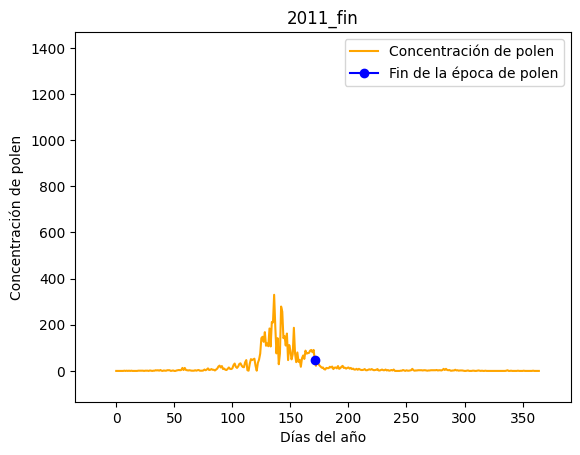

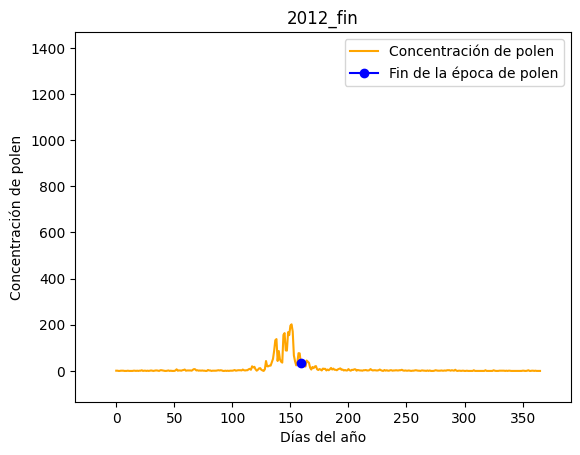

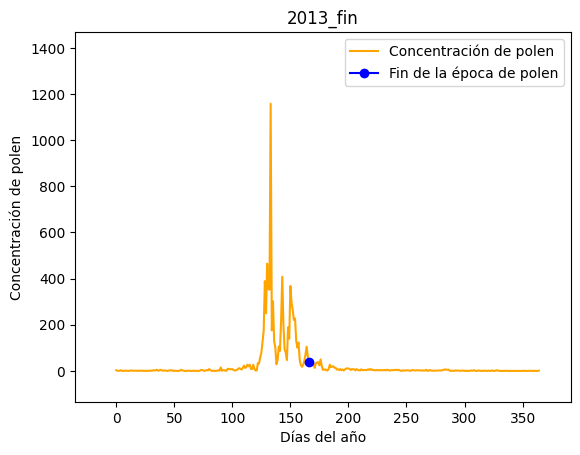

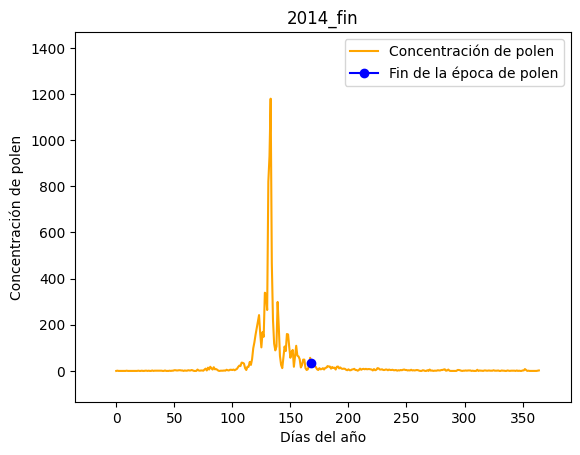

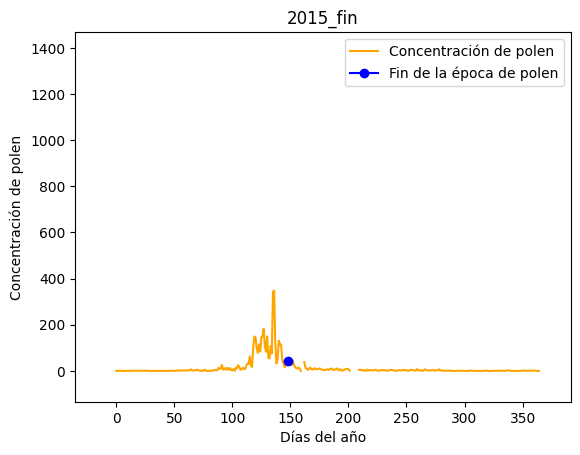

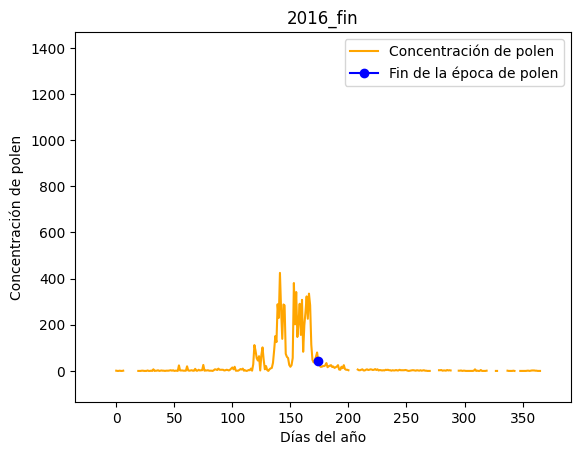

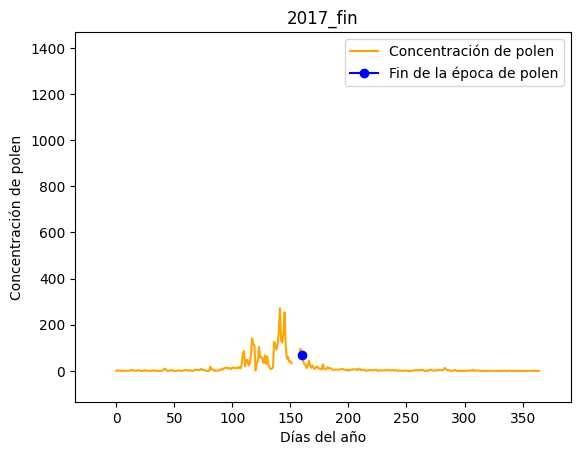

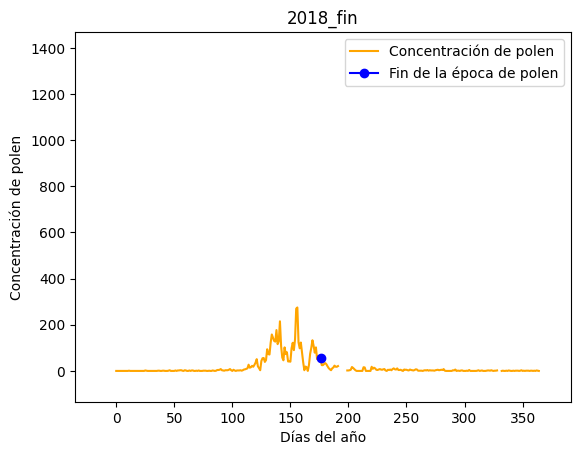

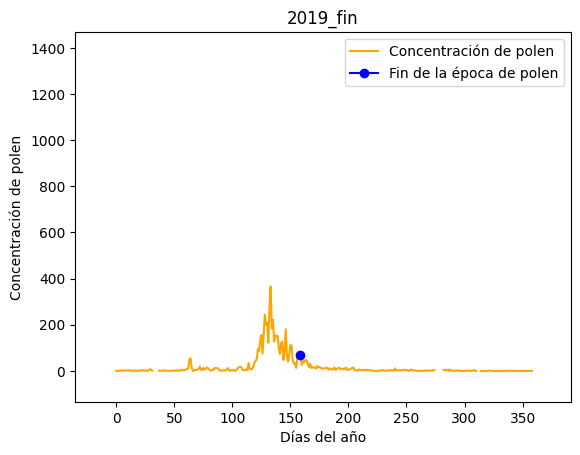

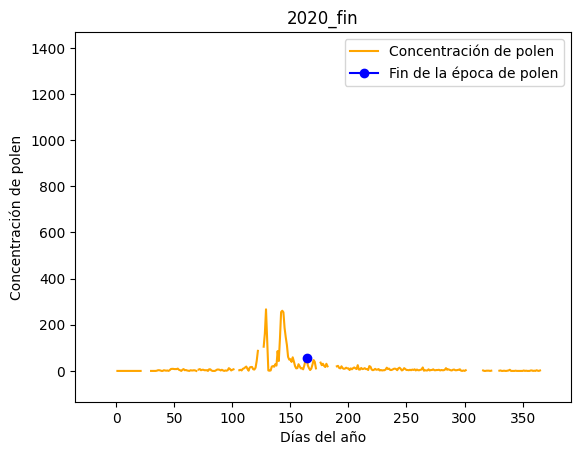

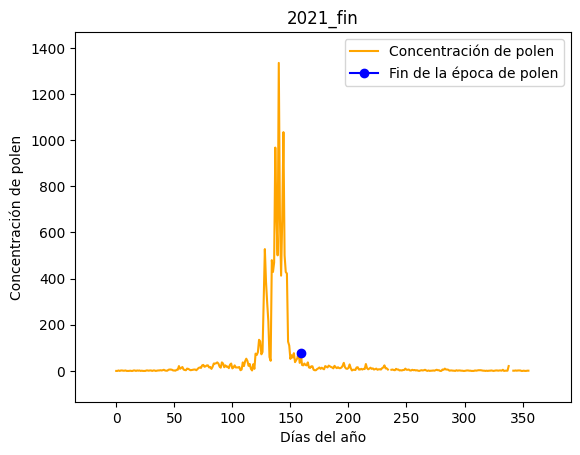

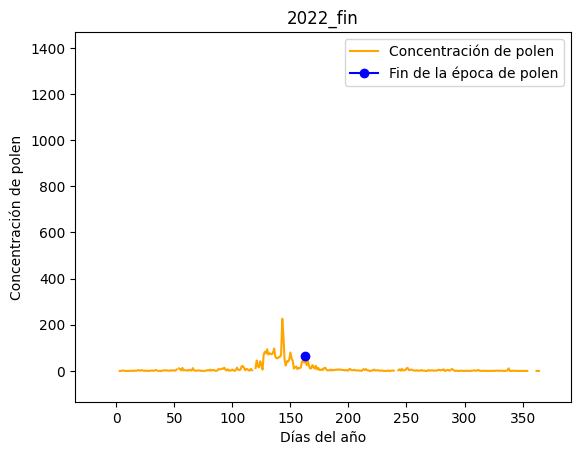

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios1.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Declarar vectores
anos= np.arange(1, 24, 1)
concentracion=np.zeros(23)
diaem=np.zeros(23)

# Tomar máximo del año contando los bisiestos e ignorando los años 2004, 2008 y 2023
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==12 or ano==16 or ano==20:
      concentracion[ano-1]=np.nanmax(datos[n:n+366,4])
      n=n+1
    else:
      concentracion[ano-1]=np.nanmax(datos[n:n+365,4])
  n=n+365
  ano=ano+1

# Tomar el día que empieza la época de polen
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==12 or ano==16 or ano==20:
      d=60
      while d<=366:
        if np.nanmean(datos[n+d-60:n+d, 4])>concentracion[ano-1]*0.1 and datos[n+d, 4]>50:
          diaem[ano-1]=d+1
          #break
        d=d+1
      n=n+1
    else:
      d=60
      while d<=365:
        if np.nanmean(datos[n+d-60:n+d, 4])>concentracion[ano-1]*0.1 and datos[n+d, 4]>50:
          diaem[ano-1]=d+1
          #break
        d=d+1
  n=n+365
  ano=ano+1

# Eliminar años 2004, 2008 y 2023 para la regresión
diaem[3]=np.nan
diaem[7]=np.nan
diaem[22]=np.nan

# Declarar variables
i=1
n=0

# Loop para representar cada año
while i<=22:
    # Me salto los años ignorados
    if i==4 or i==8:
      i=i+1
      n=n+365

    # Tomar datos contando los bisiestos
    if i==23:
        dias=np.arange(364)
        concentracion=datos[n:n+364,4]
    else:
        if i==4 or i==8 or i==12 or i==16 or i==20:
            dias=np.arange(366)
            concentracion=datos[n:n+366,4]
        else:
            dias=np.arange(365)
            concentracion=datos[n:n+365,4]

    # Crear la figura y los ejes
    fig, ax = plt.subplots()
    plt.plot(dias, concentracion, linestyle='-', color='orange', label='Concentración de polen')

    # Representar el día de comienzo calculado
    indice = int(diaem[i-1])
    plt.plot(indice, concentracion[indice], color='blue', marker='o', label='Fin de la época de polen')

    # Etiquetas y título
    ax.set_xlabel('Días del año')
    ax.set_ylabel('Concentración de polen')
    ax.set_ylim(top=max(datos[:,4]) * 1.1)
    ax.set_ylim(bottom=-max(datos[:,4]) * 0.1)
    ax.set_xlim(right=356*1.1)
    ax.set_xlim(left=-356*0.1)
    ano=2000+i
    ano_str=str(ano)
    ax.set_title(ano_str + "_fin")
    ax.legend()
    #plt.xticks(rotation=45)

    # Guardar el gráfico
    plt.savefig("/content/drive/MyDrive/TFG/imagenes/" + "fin_" + ano_str + ".png")

    # Aumento el año
    if i==4 or i==8 or i==12 or i==20:
        n=n+1
    n=n+365
    i=i+1

## Regresión lineal de cuando empieza, llega a su máximo y termina la época de polen

Mean squared error: 55.46
Coefficient of determination: -0.42
Mean squared error: 78.44
Coefficient of determination: -0.08
Mean squared error: 77.24
Coefficient of determination: -1.11


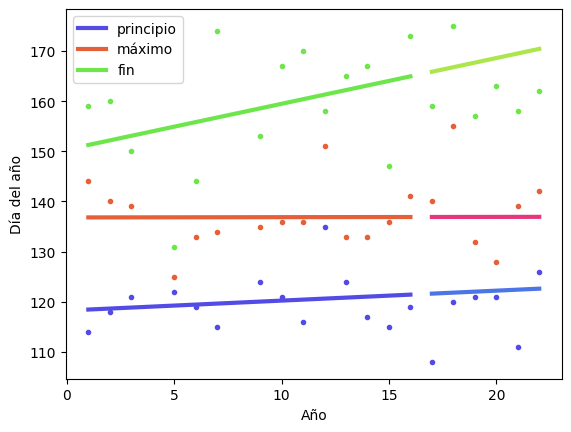

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leer datos desde un archivo .txt
archivo = "/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios1.txt"

# Usar genfromtxt para cargar los datos
datos = np.genfromtxt(archivo, delimiter='\t')

# Declarar vectores
anos= np.arange(1, 24, 1)
concentracion=np.zeros(23)
diaem=np.zeros(23)

# Tomar máximo del año contando los bisiestos e ignorando los años 2004, 2008 y 2023
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==4 or ano==8 or ano==12 or ano==16 or ano==20:
      concentracion[ano-1]=np.nanmax(datos[n:n+366,4])
      n=n+1
    else:
      concentracion[ano-1]=np.nanmax(datos[n:n+365,4])
  n=n+365
  ano=ano+1

# Tomar el día que empieza la época de polen
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==12 or ano==16 or ano==20:
      d=0
      while d<=366:
        if np.nanmean(datos[n+d:n+d+30, 4])>concentracion[ano-1]*0.1 and datos[n+d, 4]>50:
          diaem[ano-1]=d
          break
        d=d+1
      n=n+1
    else:
      d=0
      while d<=365:
        if np.nanmean(datos[n+d:n+d+30, 4])>concentracion[ano-1]*0.1 and datos[n+d, 4]>50:
          diaem[ano-1]=d
          break
        d=d+1
  n=n+365
  ano=ano+1

# Reshape años porque le gusta más a Scitik Learn
anos2d=anos.reshape(-1,1)

# Eliminar años 2004, 2008 y 2023 para la regresión
diaem[3]=np.nan
diaem[7]=np.nan
diaem[22]=np.nan

# Crear una máscara booleana para identificar filas sin NaN
mascara = ~np.isnan(diaem[0:23])

# Filtrar anos2d y diaem usando la máscara
anos2d_filtrado = anos2d[mascara]
diaem_filtrado = diaem[0:23][mascara]

# anos2d_filtrado queda tal que [[ 1] [ 2] [ 3] [ 5] [ 6] [ 7] [ 9] [10] [11] [12] [13] [14] [15] [16] [18] [19] [20] [21] [22]]

# Regresión lineal
regressor = LinearRegression().fit(anos2d_filtrado[0:14], diaem_filtrado[0:14])

# Cálculo del error
y_pred = regressor.predict(anos2d_filtrado[14:20])

print(f"Mean squared error: {mean_squared_error(diaem_filtrado[14: 20], y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(diaem_filtrado[14: 20], y_pred):.2f}")

# Crear la figura y los ejes
fig, ax = plt.subplots()
plt.plot(anos, diaem, linestyle='',marker='.', color='#534BE6')
plt.plot(anos2d_filtrado[0:14], regressor.predict(anos2d_filtrado[0:14]), linewidth=3, color='#534BE6', label='principio')
plt.plot(anos2d_filtrado[14: 20], y_pred, linewidth=3, color='#4C75E6')

# Declarar vectores
anos= np.arange(1, 24, 1)
diamax=np.zeros(23)

# Tomar datos contando los bisiestos e ignorando los años 2004, 2008 y 2023
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==4 or ano==8 or ano==12 or ano==16 or ano==20:
      diamax[ano-1]=np.nanargmax(datos[n:n+366,4])
      n=n+1
    else:
      diamax[ano-1]=np.nanargmax(datos[n:n+365,4])
  n=n+365
  ano=ano+1


# Reshape años porque le gusta más a Scitik Learn
anos2d=anos.reshape(-1,1)

# Eliminar años 2004, 2008, 2017 y 2023 para la regresión
diamax[3]=np.nan
diamax[7]=np.nan
diamax[22]=np.nan

# Crear una máscara booleana para identificar filas sin NaN
mascara = ~np.isnan(diamax[0:23])

# Filtrar anos2d y diamax usando la máscara
anos2d_filtrado = anos2d[mascara]
diamax_filtrado = diamax[0:23][mascara]

# anos2d_filtrado queda tal que [[ 1] [ 2] [ 3] [ 5] [ 6] [ 7] [ 9] [10] [11] [12] [13] [14] [15] [16] [18] [19] [20] [21] [22]]

# Regresión lineal
regressor = LinearRegression().fit(anos2d_filtrado[0:14], diamax_filtrado[0:14])

# Cálculo del error
y_pred = regressor.predict(anos2d_filtrado[14: 20])

print(f"Mean squared error: {mean_squared_error(diamax_filtrado[14: 20], y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(diamax_filtrado[14: 20], y_pred):.2f}")

# Crear la figura y los ejes
plt.plot(anos, diamax, linestyle='',marker='.', color='#E56038')
plt.plot(anos2d_filtrado[0:14], regressor.predict(anos2d_filtrado[0:14]), linewidth=3, color='#E56038', label='máximo')
plt.plot(anos2d_filtrado[14: 20], y_pred, linewidth=3, color='#E6377D',)

# Declarar vectores
anos= np.arange(1, 24, 1)
concentracion=np.zeros(23)
diaem=np.zeros(23)

# Tomar máximo del año contando los bisiestos e ignorando los años 2004, 2008 y 2023
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==4 or ano==8 or ano==12 or ano==16 or ano==20:
      concentracion[ano-1]=np.nanmax(datos[n:n+366,4])
      n=n+1
    else:
      concentracion[ano-1]=np.nanmax(datos[n:n+365,4])
  n=n+365
  ano=ano+1

# Tomar el día que empieza la época de polen
ano=1
n=0

while ano<=22:
  if ano!=4 and ano!=8 and ano!=23:
    if ano==12 or ano==16 or ano==20:
      d=60
      while d<=366:
        if np.nanmean(datos[n+d-60:n+d, 4])>concentracion[ano-1]*0.1 and datos[n+d, 4]>50:
          diaem[ano-1]=d
          #break
        d=d+1
      n=n+1
    else:
      d=60
      while d<=365:
        if np.nanmean(datos[n+d-60:n+d, 4])>concentracion[ano-1]*0.1 and datos[n+d, 4]>50:
          diaem[ano-1]=d
          #break
        d=d+1
  n=n+365
  ano=ano+1

# Reshape años porque le gusta más a Scitik Learn
anos2d=anos.reshape(-1,1)

# Eliminar años 2004, 2008 y 2023 para la regresión
diaem[3]=np.nan
diaem[7]=np.nan
diaem[22]=np.nan

# Crear una máscara booleana para identificar filas sin NaN
mascara = ~np.isnan(diaem[0:23])

# Filtrar anos2d y diaem usando la máscara
anos2d_filtrado = anos2d[mascara]
diaem_filtrado = diaem[0:23][mascara]

# anos2d_filtrado queda tal que [[ 1] [ 2] [ 3] [ 5] [ 6] [ 7] [ 9] [10] [11] [12] [13] [14] [15] [16] [18] [19] [20] [21] [22]]

# Regresión lineal
regressor = LinearRegression().fit(anos2d_filtrado[0:14], diaem_filtrado[0:14])

# Cálculo del error
y_pred = regressor.predict(anos2d_filtrado[14: 20])

print(f"Mean squared error: {mean_squared_error(diaem_filtrado[14: 20], y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(diaem_filtrado[14: 20], y_pred):.2f}")

# Crear la figura y los ejes
plt.plot(anos, diaem, linestyle='',marker='.', color='#6DE64C')
plt.plot(anos2d_filtrado[0:14], regressor.predict(anos2d_filtrado[0:14]), linewidth=3, color='#6DE64C', label='fin')
plt.plot(anos2d_filtrado[14: 20], y_pred, linewidth=3, color='#ADE64C',)

# Etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Día del año')
ax.legend()

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Principio, máximo y final de la época de polen cada año.png")

# **Machine Learning**

## Machine Learning sin preprocesamiento

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Leer datos desde un archivo excel
datos = pd.read_excel("/content/drive/MyDrive/TFG/Datos_Poaceae_Meteo_Diarios.xlsx")

# Representar los datos
pd.DataFrame(datos)

Unnamed: 0  Unnamed: 1  Unnamed: 2      fecha  \
0              1           1        2001 2001-01-01   
1              2           1        2001 2001-01-02   
2              3           1        2001 2001-01-03   
3              4           1        2001 2001-01-04   
4              5           1        2001 2001-01-05   
...          ...         ...         ...        ...   
8394          26          12        2023 2023-12-26   
8395          27          12        2023 2023-12-27   
8396          28          12        2023 2023-12-28   
8397          29          12        2023 2023-12-29   
8398          30          12        2023 2023-12-30   

      Poaceae (concentraciones)  T_max (ºC)  T_Min (ºC)  T_Med (ºC)  \
0                           0.0        14.7         6.2        10.4   
1                           1.0        16.7         7.4        12.6   
2                           1.0        14.9         6.8        11.3   
3                           0.0        16.8        13.4        14.7   
4                           1.0        16.8        13.6        15.1   
...                         ...         ...         ...         ...   
8394                        NaN        15.3        -0.5         4.8   
8395                        NaN        15.9        -1.2         5.3   
8396                        NaN        15.4         1.0         7.9   
8397                        NaN        13.6         6.4         9.5   
8398                        NaN        17.6         1.8         7.8   

      Humedad relativa (%)  Dirección del viento (º)  Precipitacion  \
0                     90.8                      94.4           19.8   
1                     86.1                     260.2            4.6   
2                     88.6                     247.1            3.2   
3                     91.6                     243.3            9.2   
4                     86.6                     253.1            3.0   
...                    ...                       ...            ...   
8394                  89.1                      52.4            0.0   
8395                  84.9                      68.2            0.2   
8396                  79.5                      84.8            0.2   
8397                  80.0                      84.3            0.0   
8398                  82.2                      89.5            0.0   

      Velocidad del viento  
0                      1.7  
1                      1.6  
2                      0.7  
3                      1.6  
4                      1.7  
...                    ...  
8394                   0.4  
8395                   0.7  
8396                   1.3  
8397                   1.0  
8398                   0.8  

[8399 rows x 12 columns]

In [ ]:
# Se elimina todas las filas que contienen NaN
clean_df = datos.dropna()

# Guardar nueva tabla para poder mirarla en profundidad
datos_limpios = pd.DataFrame(clean_df)
datos_limpios.to_excel("/content/drive/MyDrive/TFG/datos_limpios.xlsx", index=False)

In [ ]:
# Definimos la fecha donde separamos los datos a entrenar y predecir
fecha_limite = '2017-01-01'

# Definir las columnas que se quiere usar en el modelo
# Donde y representa los datos que se quiere predecir y X representa los datos que entrenarán el modelo

# Datos de entrenamiento (antes de la fecha límite)
train_data = datos_limpios[datos_limpios['fecha'] < fecha_limite]
X_train = train_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                     'Humedad relativa (%)', 'Dirección del viento (º)',
                     'Precipitacion', 'Velocidad del viento']]
y_train = train_data['Poaceae (concentraciones)']

# Datos a testear (después de la fecha límite)
test_data = datos_limpios[datos_limpios['fecha'] >= fecha_limite]
X_test = test_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                   'Humedad relativa (%)', 'Dirección del viento (º)',
                   'Precipitacion', 'Velocidad del viento']]
y_test = test_data['Poaceae (concentraciones)']

In [ ]:
# Probamos con vecinos más cercanos
kn = KNeighborsRegressor()
pred = kn.fit(X_train, y_train).predict(X_test)

In [ ]:
# Se le da una nota a la precisión del modelo
# Mean Squared Error
mse = mean_squared_error(y_test, pred)
print(f"Mean Squared Error: {mse:.4f}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error: {mae:.4f}")

# R² Score (coefficient of determination)
r2 = r2_score(y_test, pred)
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 3531.2561
Mean Absolute Error: 20.8656
R² Score: 0.1332


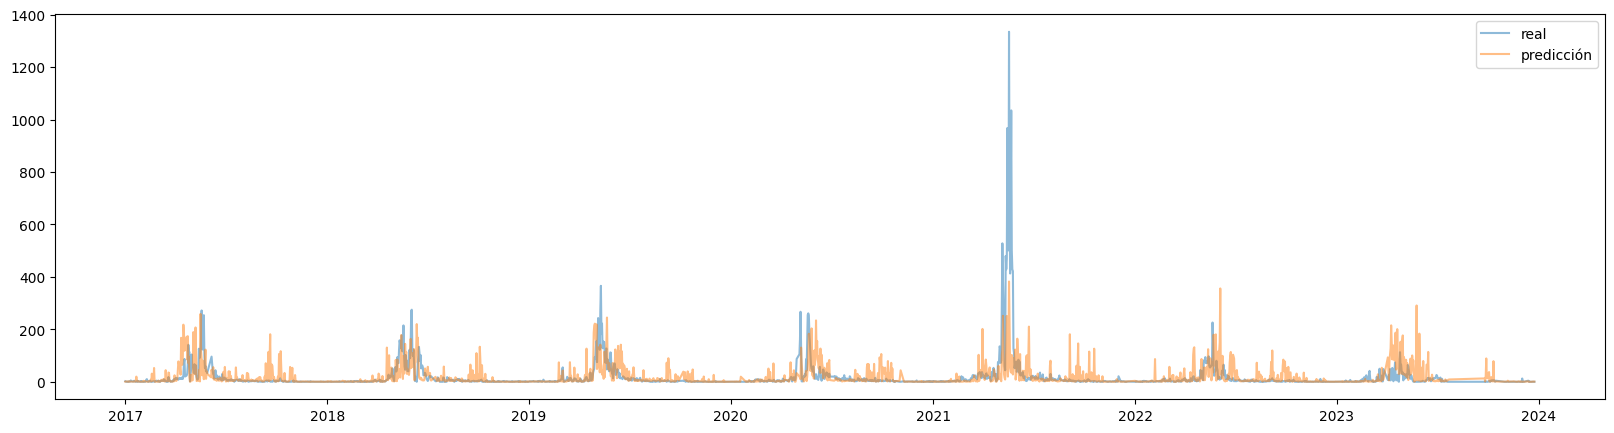

In [ ]:
# Representación
plt.figure(figsize=(20, 5))
plt.plot(test_data['fecha'], y_test, label='real', linestyle='-', alpha=0.5)
plt.plot(test_data['fecha'], pred, label='predicción', linestyle='-', alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Vecinos cercanos sin tratamiento.png")

Resulta bastante malo pero no es una sorpresa
El objetivo va a ser mejorarlo

# Corrección de los datos

Ya se han elimiado los valores con NaN. Pero será util añadir una columna con los días del año y eliminar los años con datos insuficientes.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# Leer los datos ya limpiados desde un archivo excel
datos_limpios = pd.read_excel("/content/drive/MyDrive/TFG/datos_limpios.xlsx")

In [ ]:
# Se añade una columna con el día del año
datos_limpios['día_del_año'] = datos_limpios['fecha'].dt.dayofyear

In [ ]:
pd.DataFrame(datos_limpios)

Unnamed: 0  Unnamed: 1  Unnamed: 2  ... Precipitacion  Velocidad del viento  día_del_año
0              1           1        2001  ...          19.8                   1.7            1
1              2           1        2001  ...           4.6                   1.6            2
2              3           1        2001  ...           3.2                   0.7            3
3              4           1        2001  ...           9.2                   1.6            4
4              5           1        2001  ...           3.0                   1.7            5
...          ...         ...         ...  ...           ...                   ...          ...
7804          20          12        2023  ...           0.2                   0.7          354
7805          21          12        2023  ...           0.0                   1.0          355
7806          22          12        2023  ...           0.0                   1.7          356
7807          23          12        2023  ...           0.0                   0.6          357
7808          24          12        2023  ...           0.2                   0.9          358

[7809 rows x 13 columns]

Inicialmente se quería quitar los años 2004, 2008, 2017 y 2023. Pero dado que los años 2017 y 2023 solo van a ser usados para comparar no van a empeorar el modelo.

In [ ]:
# Se eliminan los años no deseados
datos_limpios = datos_limpios[~datos_limpios['fecha'].dt.year.isin([2004, 2008])]

In [ ]:
# Se guardan los nuevos datos en un archivo excel
datos_reducidos = pd.DataFrame(datos_limpios)
datos_reducidos.to_excel("/content/drive/MyDrive/TFG/datos_reducidos.xlsx", index=False)

# PCA

## PCA Inicial

Se van a reducir la dimensionalidad de los datos para accelerar los procesos de machine learning y facilitar la visualización de los mismos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [ ]:
# Leer los datos ya limpiados y reducidos desde un archivo excel
datos_reducidos = pd.read_excel("/content/drive/MyDrive/TFG/datos_reducidos.xlsx")

In [ ]:
# Definimos la fecha donde separamos los datos a entrenar y predecir
fecha_limite = '2017-01-01'

# Definir las columnas que se quiere usar en el modelo
# Donde y representa los datos que se quiere predecir y X representa los datos que entrenarán el modelo

# Datos de entrenamiento (antes de la fecha límite)
train_data = datos_reducidos[datos_reducidos['fecha'] < fecha_limite]
X_train = train_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                     'Humedad relativa (%)', 'Dirección del viento (º)',
                     'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_train = train_data['Poaceae (concentraciones)']

# Datos a testear (después de la fecha límite)
test_data = datos_reducidos[datos_reducidos['fecha'] >= fecha_limite]
X_test = test_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                   'Humedad relativa (%)', 'Dirección del viento (º)',
                   'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_test = test_data['Poaceae (concentraciones)']

Para aplicar PCA, primero es importante reescalar los datos para que tengan el mismo rango de datos. Esto ayuda a mejorar las predicciones de los modelos.

In [ ]:
# Se escala usando QuantileTransformer debido a que elimina datos extremos
X_train_scaled = QuantileTransformer().fit_transform(X_train)
X_test_scaled = QuantileTransformer().fit_transform(X_test)

In [ ]:
# Se aplica PCA
pca = PCA(n_components=4)
PComponents_train = pca.fit_transform(X_train_scaled)
PComponents_test = pca.fit_transform(X_test_scaled)

Por lo general, queremos que la cantidad de información perdida sea menor del 15%.
Esto ocurre a partir de 4 componentes principales. Asi que, por desgracia, no se van a poder graficar los datos de manera visual. Pero, hemos reducido 9 dimensiones a 4. ¿Qizás se puede quitar ciertos datos inútiles como la precipitación o el mes del año?

In [ ]:
# Suma del porcentaje de información
np.sum(pca.explained_variance_ratio_)

np.float64(0.8954432416142932)

Hacemos la predicción con los datos nuevos, seguimos usando Nearest Neighbors para comparar, pero hay que tener en cuenta que en futuro probablemente se decidirá un modelo diferente.

In [ ]:
# Probamos con vecinos más cercanos
kn = KNeighborsRegressor()
pred = kn.fit(PComponents_train, y_train).predict(PComponents_test)

In [ ]:
# Se le da una nota a la precisión del modelo
# Mean Squared Error
mse = mean_squared_error(y_test, pred)
print(f"Mean Squared Error: {mse:.4f}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error: {mae:.4f}")

# R² Score (coefficient of determination)
r2 = r2_score(y_test, pred)
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 3528.5388
Mean Absolute Error: 17.7638
R² Score: 0.1338


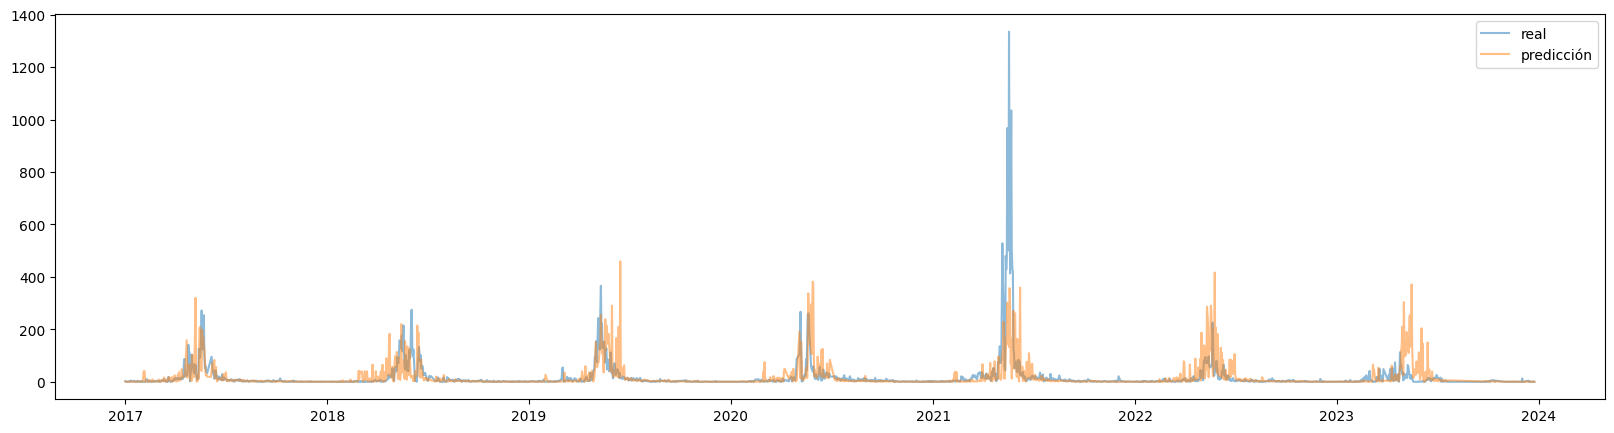

In [ ]:
# Representación
plt.figure(figsize=(20, 5))
plt.plot(test_data['fecha'], y_test, label='real', linestyle='-', alpha=0.5)
plt.plot(test_data['fecha'], pred, label='predicción', linestyle='-', alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Vecinos cercanos PCA inicial.png")

## PCA Final

Lo que se va a hacer ahora es probar la precisión y velocidad de cada número de componentes principales para elegir el valor más adecuado.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Leer los datos ya limpiados y reducidos desde un archivo excel
datos_reducidos = pd.read_excel("/content/drive/MyDrive/TFG/datos_reducidos.xlsx")

In [ ]:
# Definimos la fecha donde separamos los datos a entrenar y predecir
fecha_limite = '2017-01-01'

# Definir las columnas que se quiere usar en el modelo
# Donde y representa los datos que se quiere predecir y X representa los datos que entrenarán el modelo

# Datos de entrenamiento (antes de la fecha límite)
train_data = datos_reducidos[datos_reducidos['fecha'] < fecha_limite]
X_train = train_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                     'Humedad relativa (%)', 'Dirección del viento (º)',
                     'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_train = train_data['Poaceae (concentraciones)']

# Datos a testear (después de la fecha límite)
test_data = datos_reducidos[datos_reducidos['fecha'] >= fecha_limite]
X_test = test_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                   'Humedad relativa (%)', 'Dirección del viento (º)',
                   'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_test = test_data['Poaceae (concentraciones)']

Se realiza un Pipeline que nos permite juntar varios procesos.

In [ ]:
# Se define el modelo con Pipeline
pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA()),
    ("model", KNeighborsRegressor())
])

Para testear el método se va a realizar un GridSearch que permite probar el modelo varias veces, cambiando una variable y al final compararlos.

In [ ]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid={'PCA__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
    return_train_score=True,
    cv=3,
    n_jobs=-1
)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', QuantileTransformer()),
                                       ('PCA', PCA()),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'PCA__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True)

In [ ]:
# Mirar resultados
pd.DataFrame(grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.338966      0.063313         0.020386        0.006180   
1       0.300593      0.051674         0.019164        0.007344   
2       0.332854      0.050269         0.037354        0.006866   
3       0.273324      0.007250         0.037232        0.013070   
4       0.394274      0.090385         0.044277        0.013208   
5       0.307184      0.002870         0.055713        0.013962   
6       0.321553      0.068826         0.073397        0.004865   
7       0.299338      0.036246         0.038849        0.001328   
8       0.287181      0.045685         0.043263        0.005070   

   param_PCA__n_components                    params  split0_test_score  \
0                        1  {'PCA__n_components': 1}          -0.002950   
1                        2  {'PCA__n_components': 2}           0.109223   
2                        3  {'PCA__n_components': 3}           0.261301   
3                        4  {'PCA__n_components': 4}           0.272309   
4                        5  {'PCA__n_components': 5}           0.153577   
5                        6  {'PCA__n_components': 6}           0.192481   
6                        7  {'PCA__n_components': 7}           0.197683   
7                        8  {'PCA__n_components': 8}           0.197644   
8                        9  {'PCA__n_components': 9}           0.201354   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0          -0.267166          -0.036345        -0.102154        0.117475   
1           0.303539           0.287704         0.233489        0.088107   
2           0.269450           0.298356         0.276369        0.015899   
3           0.317064           0.272815         0.287396        0.020979   
4           0.417296           0.277125         0.282666        0.107734   
5           0.427417           0.292343         0.304080        0.096271   
6           0.447242           0.266456         0.303793        0.105247   
7           0.437228           0.265218         0.300030        0.100860   
8           0.438981           0.264594         0.301643        0.100486   

   rank_test_score  split0_train_score  split1_train_score  \
0                9            0.300174            0.300532   
1                8            0.475664            0.526344   
2                7            0.540406            0.517548   
3                5            0.560421            0.560230   
4                6            0.555505            0.504935   
5                1            0.539123            0.532898   
6                2            0.548821            0.549791   
7                4            0.556207            0.550890   
8                3            0.554612            0.553261   

   split2_train_score  mean_train_score  std_train_score  
0            0.288346          0.296351         0.005662  
1            0.610675          0.537561         0.055685  
2            0.577989          0.545315         0.024918  
3            0.555978          0.558876         0.002051  
4            0.585405          0.548615         0.033211  
5            0.571417          0.547813         0.016883  
6            0.561799          0.553470         0.005903  
7            0.558560          0.555219         0.003208  
8            0.560744          0.556206         0.003256

Esto nos indica que el número de componentes ideales son 6.

Vamos a comprobarlo representando los datos

In [ ]:
# Se calcula la predicción usando pipe
pipe_def = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=6)),
    ("model", KNeighborsRegressor())
])

pipe_def.fit(X_train, y_train)
pred = pipe_def.predict(X_test)

In [ ]:
# Se le da una nota a la precisión del modelo
# Mean Squared Error
mse = mean_squared_error(y_test, pred)
print(f"Mean Squared Error: {mse:.4f}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error: {mae:.4f}")

# R² Score (coefficient of determination)
r2 = r2_score(y_test, pred)
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 3514.5322
Mean Absolute Error: 18.3438
R² Score: 0.1373


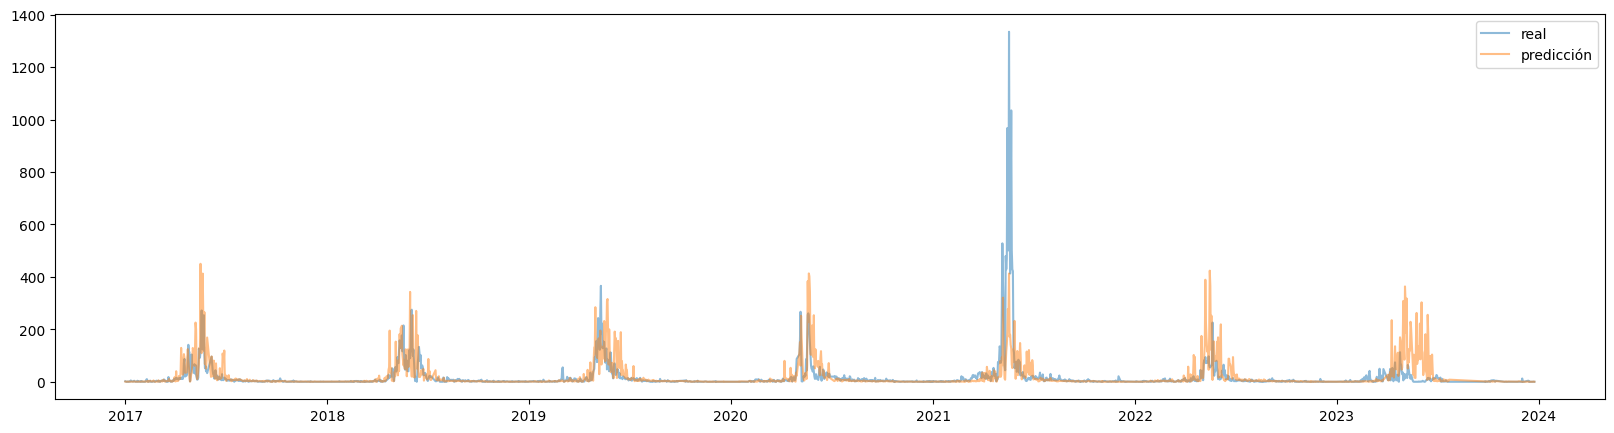

In [ ]:
# Se representa
plt.figure(figsize=(20, 5))
plt.plot(test_data['fecha'], y_test, label='real', linestyle='-', alpha=0.5)
plt.plot(test_data['fecha'], pred, label='predicción', linestyle='-', alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Vecinos cercanos PCA definitivo.png")

No es necesario pero voy a representar también la predicción sobre si misma.

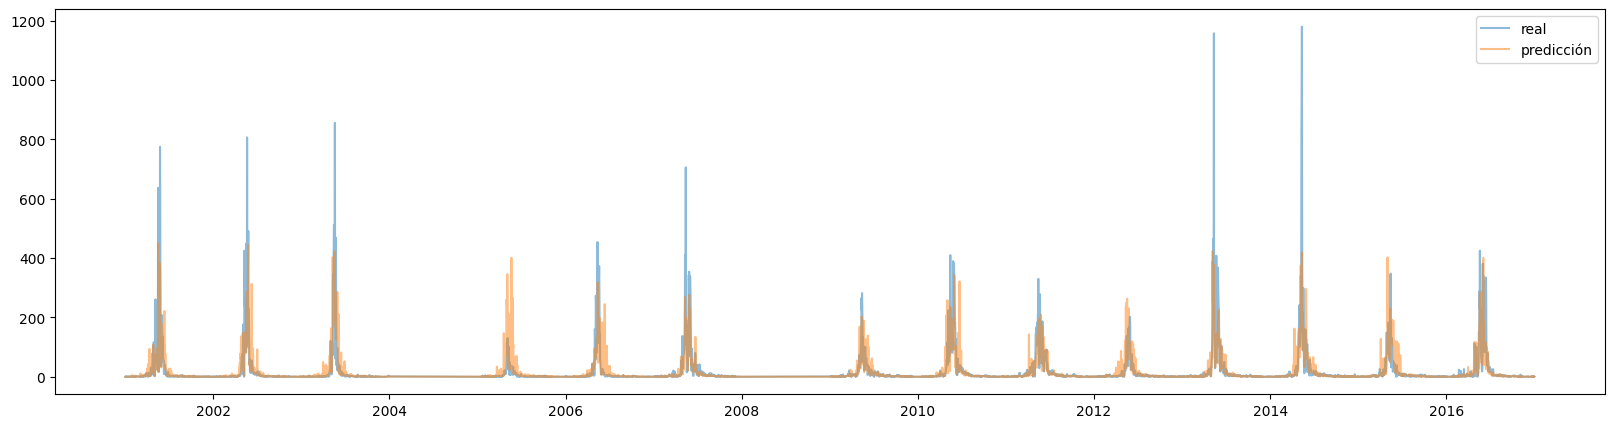

In [ ]:
pred2 = pipe_def.predict(X_train)

plt.figure(figsize=(20, 5))
plt.plot(train_data['fecha'], y_train, label='real', linestyle='-', alpha=0.5)
plt.plot(train_data['fecha'], pred2, label='predicción', linestyle='-', alpha=0.5)
plt.legend()
plt.show()

Con el valor de PCA determinado, se puede ver que datos son más importantes en nuestro modelo

In [ ]:
# Transformamos y aplicamos PCA con el número de componentes eelgido
X_train_scaled = QuantileTransformer().fit_transform(X_train)
pca = PCA(n_components=6)
pca.fit(X_train_scaled)

# Se crea una tabla
loadings = pd.DataFrame(
    pca.components_.T, # Componentes del PCA en filas
    columns=[f'PC{i+1}' for i in range(6)],
    index=X_train.columns  # Indice con los nombres de las variables
)

# Se añade una columna con la suma de las contribuciones
loadings['Abs_Sum'] = loadings.abs().sum(axis=1)

print(loadings)

                               PC1       PC2       PC3       PC4       PC5  \
Unnamed: 1                0.141651  0.678711 -0.058521  0.164668  0.050346   
T_max (ºC)                0.446023 -0.029084  0.064396 -0.307851 -0.005465   
T_Min (ºC)                0.403907  0.055124  0.302354 -0.229448 -0.059465   
T_Med (ºC)                0.443710 -0.005591  0.190113 -0.264867 -0.016710   
Humedad relativa (%)     -0.409029  0.138988  0.076185  0.049308  0.144410   
Dirección del viento (º)  0.182907 -0.170425  0.343041  0.391741  0.812075   
Precipitacion            -0.430528  0.218087  0.718644 -0.396725  0.000317   
Velocidad del viento      0.124163 -0.100131  0.471138  0.646517 -0.557695   
día_del_año               0.139460  0.655351 -0.054459  0.155059  0.047715   

                               PC6   Abs_Sum  
Unnamed: 1               -0.069599  1.163495  
T_max (ºC)               -0.049258  0.902077  
T_Min (ºC)                0.467485  1.517783  
T_Med (ºC)                0.136

Con esto se puede ver que todos los datos son relevantes para el modelo pero los más importantes son en orden:
- Precipitación
- Dirección del viento
- Velocidad del viento
- Humedad relativa
- Temperatura mínima

Aquí hay un salto notable
- mes del año
- día del año
- Temperatura media
- Temperatura máxima




In [ ]:
var = pca.explained_variance_

In [ ]:
var

np.float64(0.8229598742247974)

## PCA con menos valores

La idea de reducir datos necesarios es que va a ayudar a reducir el "overfitting"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

In [ ]:
# Leer los datos ya limpiados y reducidos desde un archivo excel
datos_reducidos = pd.read_excel("/content/drive/MyDrive/TFG/datos_reducidos.xlsx")

In [ ]:
# Definimos la fecha donde separamos los datos a entrenar y predecir
fecha_limite = '2017-01-01'

# Definir las columnas que se quiere usar en el modelo
# Donde y representa los datos que se quiere predecir y X representa los datos que entrenarán el modelo

# Datos de entrenamiento (antes de la fecha límite)
train_data = datos_reducidos[datos_reducidos['fecha'] < fecha_limite]
X_train = train_data[['T_Min (ºC)',
                     'Humedad relativa (%)', 'Dirección del viento (º)',
                     'Precipitacion', 'Velocidad del viento']]
y_train = train_data['Poaceae (concentraciones)']

# Datos a testear (después de la fecha límite)
test_data = datos_reducidos[datos_reducidos['fecha'] >= fecha_limite]
X_test = test_data[['T_Min (ºC)',
                    'Humedad relativa (%)', 'Dirección del viento (º)',
                    'Precipitacion', 'Velocidad del viento']]
y_test = test_data['Poaceae (concentraciones)']

In [ ]:
# Se calcula la predicción usando pipe
pipe_def = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=5)), # Solo lo uso para que decida el peso de cada componente
    ("model", KNeighborsRegressor())
])

pipe_def.fit(X_train, y_train)
pred = pipe_def.predict(X_test)

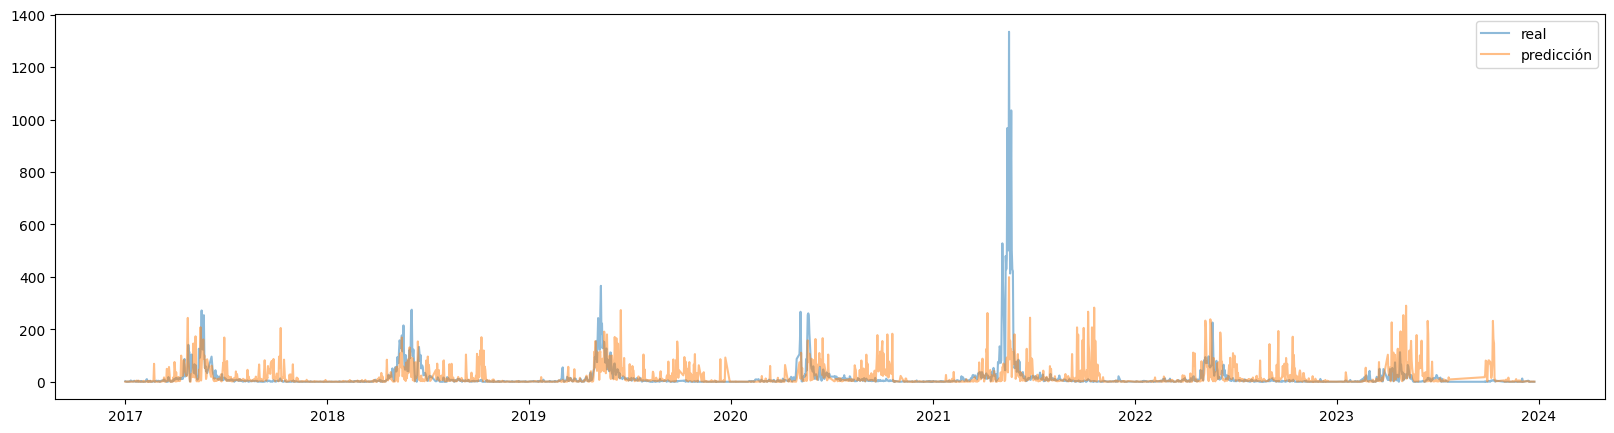

In [ ]:
# Se representa
plt.figure(figsize=(20, 5))
plt.plot(test_data['fecha'], y_test, label='real', linestyle='-', alpha=0.5)
plt.plot(test_data['fecha'], pred, label='predicción', linestyle='-', alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Vecinos cercanos PCA definitivo con datos reducidos.png")

Se ve que reduciendo el número de datos usados, la predicción resulta mucho peor. Asi que seguiremos usando todos los datos disponibles.

# Optimización de los modelos

Ahora se va a elegir el modelo de predicción más adecuado para nuestros datos

Ya se ha probado el modelo "Nearest Neighbors", los otros dos modelos que se van a probar son "Random Forest" y "Neural Network"

**Random Forest**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, WhiteKernel, ConstantKernel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer, mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Leer los datos ya limpiados y reducidos desde un archivo excel
datos_reducidos = pd.read_excel("/content/drive/MyDrive/TFG/datos_reducidos.xlsx")

In [ ]:
# Definimos la fecha donde separamos los datos a entrenar y predecir
fecha_limite = '2017-01-01'

# Definir las columnas que se quiere usar en el modelo
# Donde y representa los datos que se quiere predecir y X representa los datos que entrenarán el modelo

# Datos de entrenamiento (antes de la fecha límite)
train_data = datos_reducidos[datos_reducidos['fecha'] < fecha_limite]
X_train = train_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                     'Humedad relativa (%)', 'Dirección del viento (º)',
                     'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_train = train_data['Poaceae (concentraciones)']

# Datos a testear (después de la fecha límite)
test_data = datos_reducidos[datos_reducidos['fecha'] >= fecha_limite]
X_test = test_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                   'Humedad relativa (%)', 'Dirección del viento (º)',
                   'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_test = test_data['Poaceae (concentraciones)']

In [ ]:
# Se define el modelo con Pipeline
pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=6)),
    ("model", RandomForestRegressor())
])

In [ ]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid={'model__n_estimators': [50, 100, 200, 300],
                'model__max_depth': [None, 5, 10, 20, 30],
                'model__min_samples_leaf': [1, 2, 4],
                'model__max_features': ['auto', 'sqrt', 0.5, 0.8]},
    return_train_score=True,
    cv=3,
    n_jobs=-1
)
grid.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, *

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', QuantileTransformer()),
                                       ('PCA', PCA(n_components=3)),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 5, 10, 20, 30],
                         'model__max_features': ['auto', 'sqrt', 0.5, 0.8],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__n_estimators': [50, 100, 200, 300]},
             return_train_score=True)

Los valores óptimos son:
RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2, n_estimators=200)

In [ ]:
# Se calcula la predicción usando pipe
pipe_def = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=6)),
    ("model", RandomForestRegressor(max_depth=20,
                                    max_features='sqrt',
                                    min_samples_leaf=2,
                                    n_estimators=200))
])

pipe_def.fit(X_train, y_train)
pred = pipe_def.predict(X_test)

In [ ]:
# Se le da una nota a la precisión del modelo
# Mean Squared Error
mse = mean_squared_error(y_test, pred)
print(f"Mean Squared Error: {mse:.4f}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error: {mae:.4f}")

# R² Score (coefficient of determination)
r2 = r2_score(y_test, pred)
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 2905.8089
Mean Absolute Error: 16.3982
R² Score: 0.2867


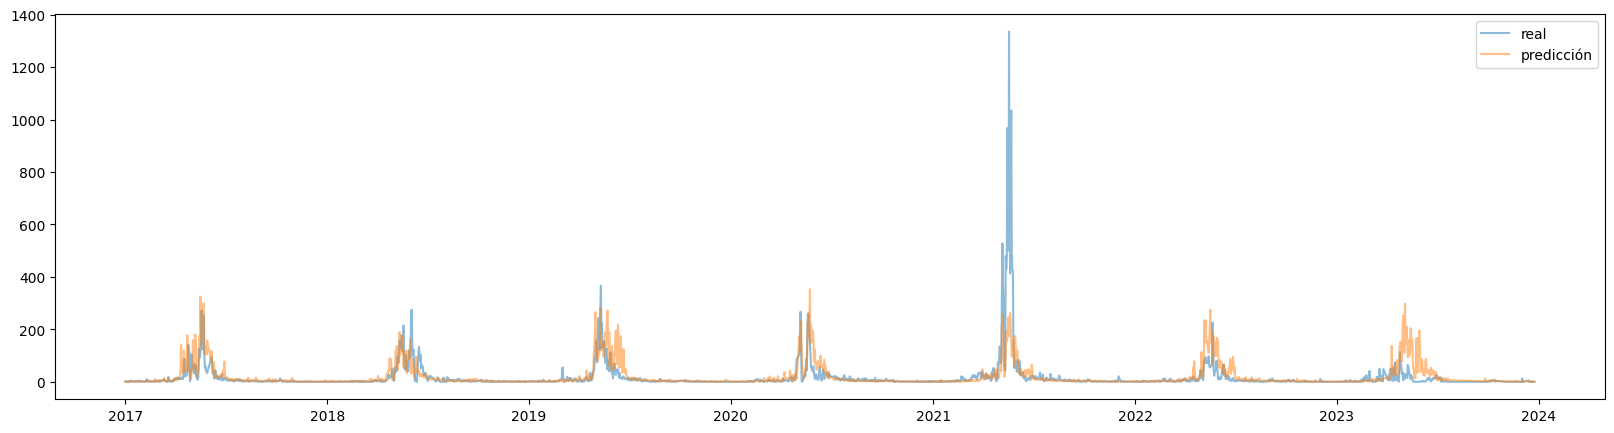

In [ ]:
# Se representa
plt.figure(figsize=(20, 5))
plt.plot(test_data['fecha'], y_test, label='real', linestyle='-', alpha=0.5)
plt.plot(test_data['fecha'], pred, label='predicción', linestyle='-', alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Modelo Random Forest.png")

Según los valores, es mejor, pero hay que tener en cuenta que lo hemos optimizado, mientras que Nearest Neighbors no. Asi que eso es lo siguiente que se va a hacer.

**Nearest Neighbors**

In [ ]:
# Se define el modelo con Pipeline
pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=6)),
    ("model", KNeighborsRegressor())
])

In [ ]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid={'model__n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                'model__weights': ['uniform', 'distance'],
                'model__p': [1, 2],
                'model__metric': ['euclidean', 'manhattan', 'minkowski']},
    return_train_score=True,
    cv=3,
    n_jobs=-1
)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', QuantileTransformer()),
                                       ('PCA', PCA(n_components=6)),
                                       ('model', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'model__metric': ['euclidean', 'manhattan',
                                           'minkowski'],
                         'model__n_neighbors': [10, 11, 12, 13, 14, 15, 16, 17,
                                                18, 19, 20],
                         'model__p': [1, 2],
                         'model__weights': ['uniform', 'distance']},
             return_train_score=True)

In [ ]:
# Se define el modelo con Pipeline
pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=6)),
    ("model", KNeighborsRegressor(metric='manhattan',
                                  n_neighbors=16,
                                  p=1,
                                  weights='distance'))
])

pipe_def.fit(X_train, y_train)
pred = pipe_def.predict(X_test)

In [ ]:
# Se le da una nota a la precisión del modelo
# Mean Squared Error
mse = mean_squared_error(y_test, pred)
print(f"Mean Squared Error: {mse:.4f}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error: {mae:.4f}")

# R² Score (coefficient of determination)
r2 = r2_score(y_test, pred)
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 2870.8732
Mean Absolute Error: 16.3609
R² Score: 0.2953


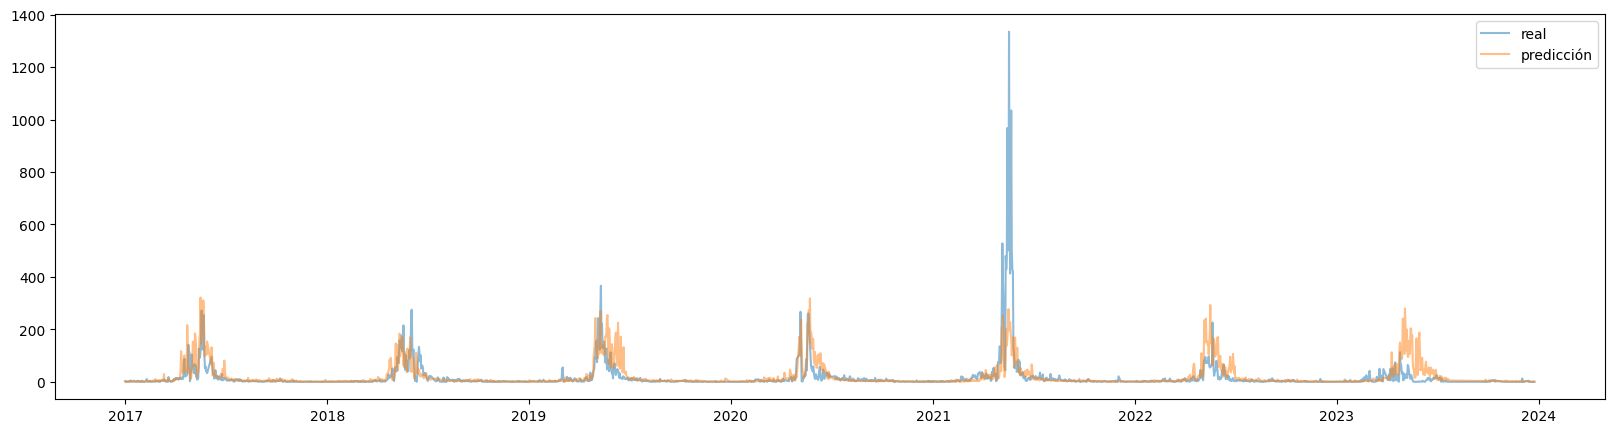

In [ ]:
# Se representa
plt.figure(figsize=(20, 5))
plt.plot(test_data['fecha'], y_test, label='real', linestyle='-', alpha=0.5)
plt.plot(test_data['fecha'], pred, label='predicción', linestyle='-', alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Modelo Nearest Neighbors.png")

**Red Neuronal**

In [ ]:
# Se define el modelo con Pipeline
pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=6)),
    ("model", MLPRegressor())
])

In [ ]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid={'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
                'model__activation': ['relu', 'tanh'],
                'model__solver': ['adam', 'lbfgs'],
                'model__alpha': [0.0001, 0.001, 0.01],
                'model__learning_rate_init': [0.001, 0.01],
                'model__early_stopping': [True]},
    return_train_score=True,
    cv=3,
    n_jobs=-1
)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', QuantileTransformer()),
                                       ('PCA', PCA(n_components=6)),
                                       ('model', MLPRegressor())]),
             n_jobs=-1,
             param_grid={'model__activation': ['relu', 'tanh'],
                         'model__alpha': [0.0001, 0.001, 0.01],
                         'model__early_stopping': [True],
                         'model__hidden_layer_sizes': [(50,), (100,), (50, 50)],
                         'model__learning_rate_init': [0.001, 0.01],
                         'model__solver': ['adam', 'lbfgs']},
             return_train_score=True)

In [ ]:
pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=3)),
    ("model", MLPRegressor(alpha=0.001,
                           early_stopping=True,
                           hidden_layer_sizes=(50,50),
                           learning_rate_init=0.01))
])

pipe_def.fit(X_train, y_train)
pred = pipe_def.predict(X_test)

In [ ]:
# Se le da una nota a la precisión del modelo
# Mean Squared Error
mse = mean_squared_error(y_test, pred)
print(f"Mean Squared Error: {mse:.4f}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error: {mae:.4f}")

# R² Score (coefficient of determination)
r2 = r2_score(y_test, pred)
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 2849.9672
Mean Absolute Error: 16.3356
R² Score: 0.3004


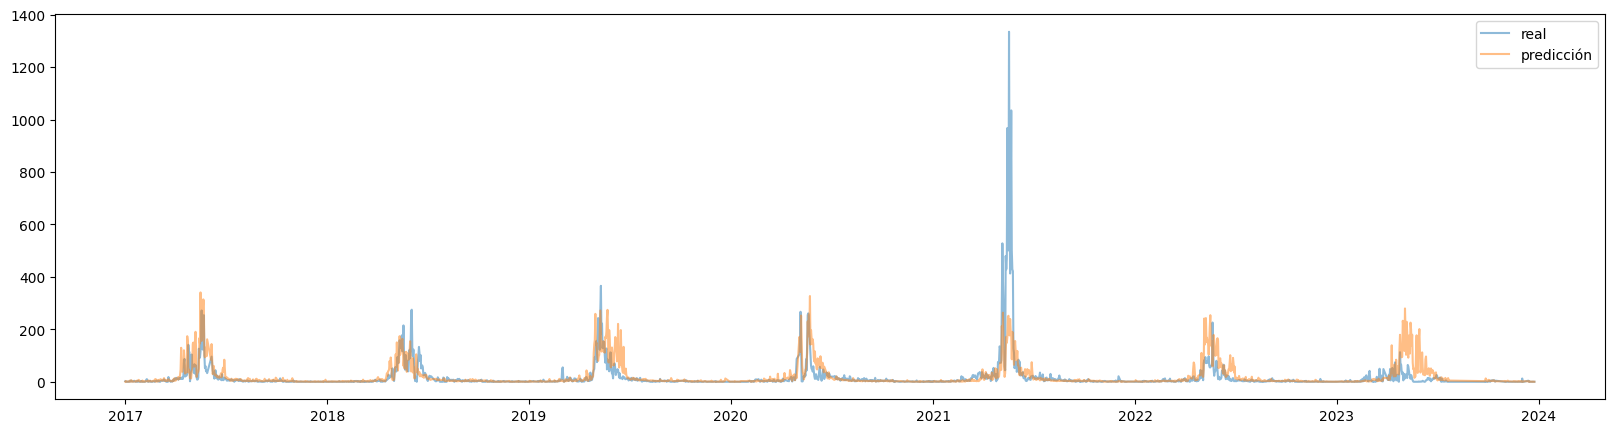

In [ ]:
# Se representa
plt.figure(figsize=(20, 5))
plt.plot(test_data['fecha'], y_test, label='real', linestyle='-', alpha=0.5)
plt.plot(test_data['fecha'], pred, label='predicción', linestyle='-', alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Modelo Red Neuronal.png")

Este es el mejor modelo hasta ahora, intentemos optimizarlo incluso más

In [ ]:
# Se define el modelo con Pipeline
pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=6)),
    ("model", MLPRegressor(alpha=0.001,
                           early_stopping=True,
                           learning_rate_init=0.01,
                           max_iter=1000,
                           random_state=42))
])

In [ ]:
grid = GridSearchCV(
    estimator=pipe,
    param_grid={'model__hidden_layer_sizes': [(x, y) for x in range(5, 15) for y in range(125, 135)]},
    return_train_score=True,
    cv=3,
    n_jobs=-1
)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', QuantileTransformer()),
                                       ('PCA', PCA(n_components=6)),
                                       ('model',
                                        MLPRegressor(alpha=0.001,
                                                     early_stopping=True,
                                                     learning_rate_init=0.01,
                                                     max_iter=1000,
                                                     random_state=42))]),
             n_jobs=-1,
             param_grid={'model__hidden_layer_sizes': [(5, 125), (5, 126),
                                                       (5, 127), (5, 128),
                                                       (5, 129), (5, 130),
                                                       (5, 131), (5, 132),
                                                       (5, 133), (5, 134),
                                                       (6, 125), (6, 126),
                                                       (6, 127), (6, 128),
                                                       (6, 129), (6, 130),
                                                       (6, 131), (6, 132),
                                                       (6, 133), (6, 134),
                                                       (7, 125), (7, 126),
                                                       (7, 127), (7, 128),
                                                       (7, 129), (7, 130),
                                                       (7, 131), (7, 132),
                                                       (7, 133), (7, 134), ...]},
             return_train_score=True)

In [ ]:
pd.DataFrame(grid.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.643012      1.400939         0.011566        0.000979   
1        1.836070      0.597784         0.009173        0.000723   
2        4.400953      1.023878         0.011714        0.004522   
3        3.151167      0.644892         0.009295        0.000287   
4        3.189355      0.714726         0.008835        0.000574   
..            ...           ...              ...             ...   
95       0.975402      0.352352         0.009514        0.000041   
96       1.188795      0.555860         0.010459        0.002081   
97       2.150329      0.596314         0.017542        0.006214   
98       2.816578      0.739131         0.009724        0.000509   
99       1.038091      0.257173         0.008358        0.001661   

   param_model__hidden_layer_sizes                                    params  \
0                         (5, 125)   {'model__hidden_layer_sizes': (5, 125)}   
1                         (5, 126)   {'model__hidden_layer_sizes': (5, 126)}   
2                         (5, 127)   {'model__hidden_layer_sizes': (5, 127)}   
3                         (5, 128)   {'model__hidden_layer_sizes': (5, 128)}   
4                         (5, 129)   {'model__hidden_layer_sizes': (5, 129)}   
..                             ...                                       ...   
95                       (14, 130)  {'model__hidden_layer_sizes': (14, 130)}   
96                       (14, 131)  {'model__hidden_layer_sizes': (14, 131)}   
97                       (14, 132)  {'model__hidden_layer_sizes': (14, 132)}   
98                       (14, 133)  {'model__hidden_layer_sizes': (14, 133)}   
99                       (14, 134)  {'model__hidden_layer_sizes': (14, 134)}   

    split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
0            0.438731           0.467203           0.387016         0.430983   
1            0.369457           0.376884           0.393982         0.380108   
2            0.416792           0.508293           0.409355         0.444813   
3            0.419445           0.528489           0.405120         0.451018   
4            0.422313           0.514464           0.403597         0.446791   
..                ...                ...                ...              ...   
95           0.374577           0.386585           0.324886         0.362016   
96           0.296382           0.507725           0.347081         0.383730   
97           0.412418           0.490229           0.357644         0.420097   
98           0.340240           0.544720           0.379096         0.421352   
99           0.331170           0.395039           0.349153         0.358454   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0         0.033191               50            0.489624            0.467423   
1         0.010269               90            0.453007            0.383447   
2         0.044990               26            0.488344            0.471901   
3         0.055091               13            0.495990            0.475945   
4         0.048458               20            0.509584            0.466036   
..             ...              ...                 ...                 ...   
95        0.026709               95            0.458916            0.325565   
96        0.090088               88            0.379251            0.505372   
97        0.054400               66            0.469048            0.488294   
98        0.088665               62            0.385463            0.484507   
99        0.026891               96            0.430033            0.400593   

    split2_train_score  mean_train_score  std_train_score  
0             0.485114          0.480720         0.009581  
1             0.519916          0.452123         0.055717  
2             0.535900          0.498715         0.027137  
3             0.531390          0.501109         0.022923  
4             0.

Se va a intentar visualizar las zonas con mejores predicciones

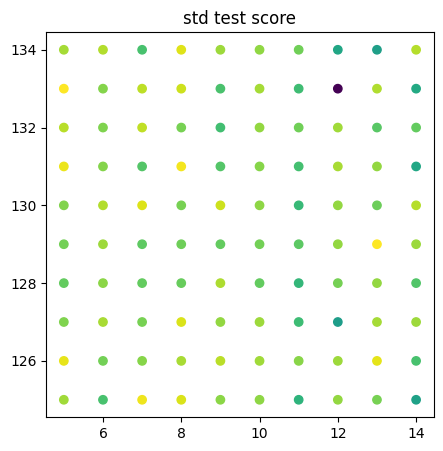

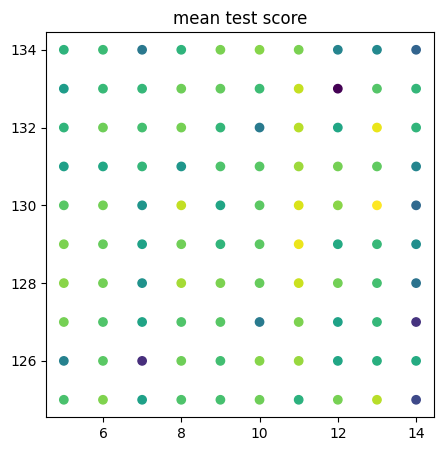

In [ ]:
plt.figure(figsize=(5, 5))
df = pd.DataFrame(grid.cv_results_)
for score in ['std_test_score']:
  plt.scatter([_[0] for _ in df['param_model__hidden_layer_sizes']],
              [_[1] for _ in df['param_model__hidden_layer_sizes']],
              c=df[score],
              cmap="viridis_r")
plt.title("std test score")
plt.show()
plt.figure(figsize=(5, 5))
for score in ['mean_test_score']:
  plt.scatter([_[0] for _ in df['param_model__hidden_layer_sizes']],
              [_[1] for _ in df['param_model__hidden_layer_sizes']],
              c=df[score])
plt.title("mean test score")
plt.show()

A pesar de que GridShearch apunta a (13, 130) como valores óptimos,  las tablas de std score (consitencia) y mean score (precisión), señalan una clara preferencia por los valores (12, 133). Se va a usar este último.

In [ ]:
pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=6)),
    ("model", MLPRegressor(alpha=0.001,
                           early_stopping=True,
                           learning_rate_init=0.01,
                           hidden_layer_sizes=(12, 133),
                           random_state=42,
                           max_iter=1000))
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

In [ ]:
# Se le da una nota a la precisión del modelo
# Mean Squared Error
mse = mean_squared_error(y_test, pred)
print(f"Mean Squared Error: {mse:.4f}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error: {mae:.4f}")

# R² Score (coefficient of determination)
r2 = r2_score(y_test, pred)
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 2754.2315
Mean Absolute Error: 15.4691
R² Score: 0.3239


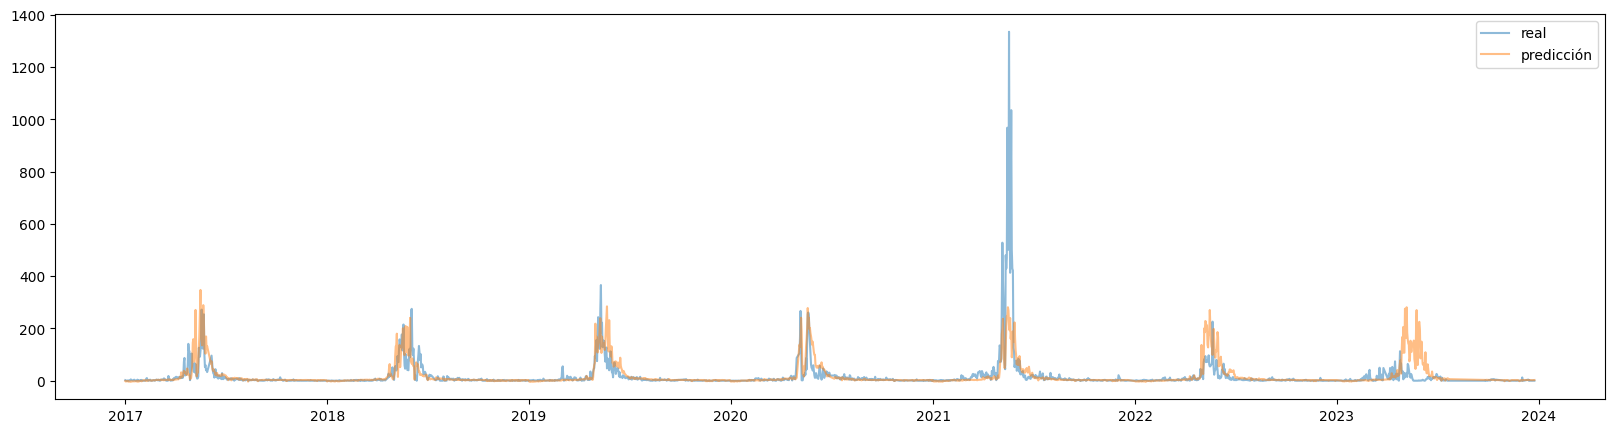

In [ ]:
# Se representa
plt.figure(figsize=(20, 5))
plt.plot(test_data['fecha'], y_test, label='real', linestyle='-', alpha=0.5)
plt.plot(test_data['fecha'], pred, label='predicción', linestyle='-', alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Modelo Red Neuronal definitivo.png")

Todos los resultados apuntan a que este es el mejor modelo.

**Gaussian Process Regression (GPR)**

A Miguel no le va a gustar, pero al ver la documentación **Machine Learning Estimation of Pollen Abundance Using Landsat and Meteorological
Data** no podía no probarlo, además, los modelos anteriores se ven poco performantes en los experimentos posterirores.

In [ ]:
# Se define el modelo con Pipeline
pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=6)),
    ("model", GaussianProcessRegressor())
])

In [ ]:
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, WhiteKernel, ConstantKernel

# Define parameter grid
param_grid = {
    'model__kernel': [RBF(), Matern(nu=1.5), ConstantKernel() * RBF() + WhiteKernel()],
    'model__alpha': [1e-10, 1e-5, 1e-1],
    'model__n_restarts_optimizer': [0, 5]
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    return_train_score=True,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1
)
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', QuantileTransformer()),
                                       ('PCA', PCA(n_components=6)),
                                       ('model', GaussianProcessRegressor())]),
             n_jobs=-1,
             param_grid={'model__alpha': [1e-10, 1e-05, 0.1],
                         'model__kernel': [RBF(length_scale=1),
                                           Matern(length_scale=1, nu=1.5),
                                           1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1)],
                         'model__n_restarts_optimizer': [0, 5]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Se define el modelo con Pipeline
pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=6)),
    ("model", GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1),
                                       alpha=1e-05,
                                       n_restarts_optimizer=5))
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

Ajustar el modelo a los datos ha tardado 25 minutos, lo cual es CONSIDERABLEMENTE más tiempo que el resto (max 2 min).

In [ ]:
# Se le da una nota a la precisión del modelo
# Mean Squared Error
mse = mean_squared_error(y_test, pred)
print(f"Mean Squared Error: {mse:.4f}")

# Mean Absolute Error
mae = mean_absolute_error(y_test, pred)
print(f"Mean Absolute Error: {mae:.4f}")

# R² Score (coefficient of determination)
r2 = r2_score(y_test, pred)
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 2989.1934
Mean Absolute Error: 17.5747
R² Score: 0.2662


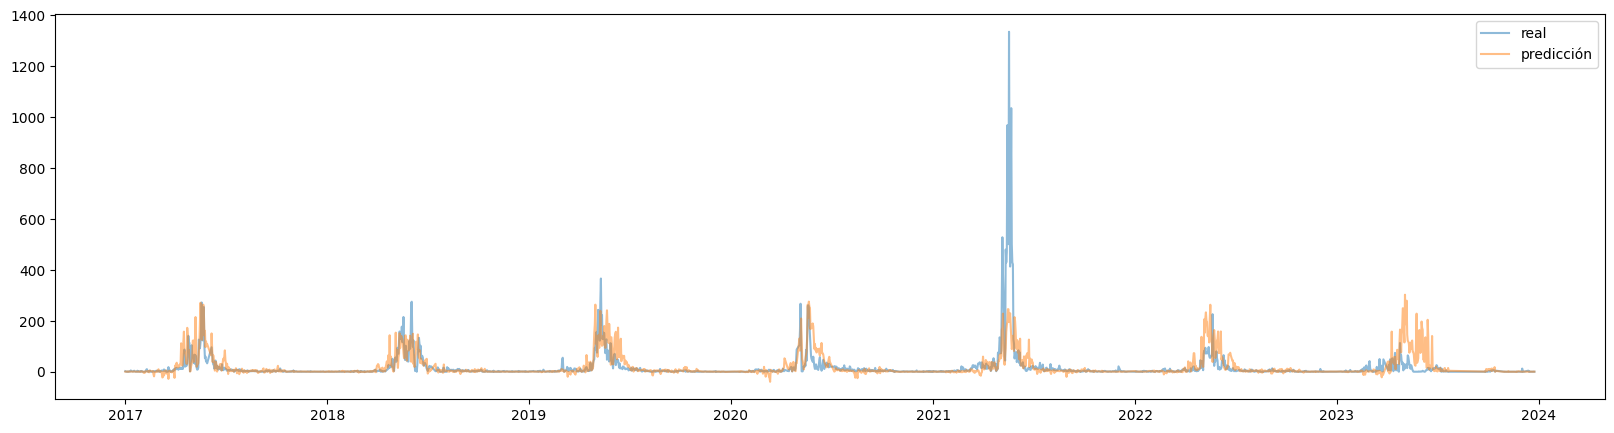

In [ ]:
# Se representa
plt.figure(figsize=(20, 5))
plt.plot(test_data['fecha'], y_test, label='real', linestyle='-', alpha=0.5)
plt.plot(test_data['fecha'], pred, label='predicción', linestyle='-', alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Modelo Gaussian Regressor.png")

Vaya decepción

 # Predicción del comienzo, pico y final de las épocas de polen Red Neuronal

Se va a usar esta misma sección para los 3 modelos estudiados para ahorrar tiempo.

Toda esta parte de código es repetido del apartado de elección de modelo

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from matplotlib.offsetbox import AnchoredText
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

Los modulos no necesarios se han quitado

In [ ]:
# Leer los datos ya limpiados y reducidos desde un archivo excel
datos_reducidos = pd.read_excel("/content/drive/MyDrive/TFG/datos_reducidos.xlsx")

In [ ]:
# Definimos la fecha donde separamos los datos a entrenar y predecir
fecha_limite = '2017-01-01'

# Definir las columnas que se quiere usar en el modelo
# Donde y representa los datos que se quiere predecir y X representa los datos que entrenarán el modelo

# Datos de entrenamiento (antes de la fecha límite)
train_data = datos_reducidos[datos_reducidos['fecha'] < fecha_limite]
X_train = train_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                     'Humedad relativa (%)', 'Dirección del viento (º)',
                     'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_train = train_data['Poaceae (concentraciones)']

# Datos a testear (después de la fecha límite)
test_data = datos_reducidos[datos_reducidos['fecha'] >= fecha_limite]
X_test = test_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                   'Humedad relativa (%)', 'Dirección del viento (º)',
                   'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_test = test_data['Poaceae (concentraciones)']

# Datos totales
X_total = datos_reducidos[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                          'Humedad relativa (%)', 'Dirección del viento (º)',
                          'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_total = datos_reducidos['Poaceae (concentraciones)']

In [ ]:
pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=6)),
    ("model", MLPRegressor(alpha=0.001,
                           early_stopping=True,
                           learning_rate_init=0.01,
                           hidden_layer_sizes=(12, 133),
                           random_state=42,
                           max_iter=1000))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', QuantileTransformer()), ('PCA', PCA(n_components=6)),
                ('model',
                 MLPRegressor(alpha=0.001, early_stopping=True,
                              hidden_layer_sizes=(12, 133),
                              learning_rate_init=0.01, max_iter=1000,
                              random_state=42))])

In [ ]:
pred = pipe.predict(X_test)

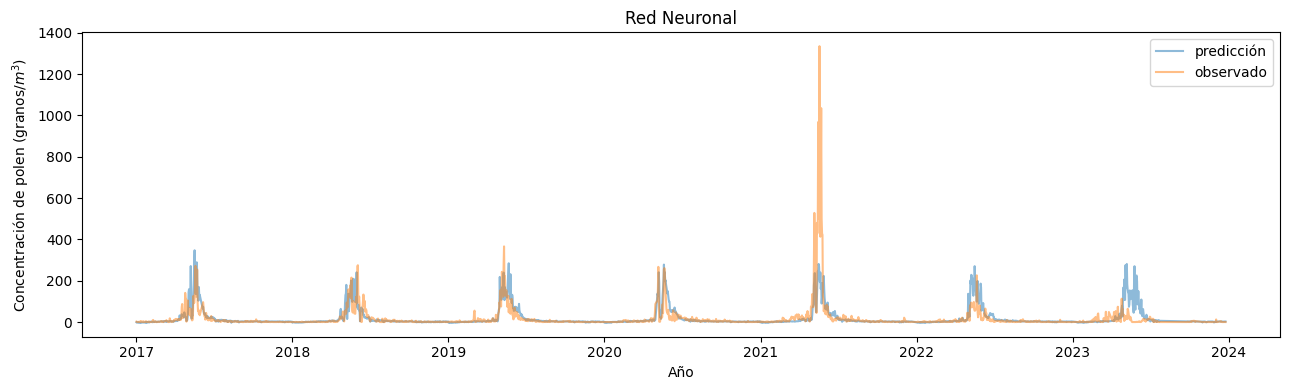

In [ ]:
fig, ax = plt.subplots(figsize=(13, 4))
plt.plot(test_data['fecha'], pred, label='predicción', alpha=0.5)
plt.plot(test_data['fecha'], test_data['Poaceae (concentraciones)'], label='observado', alpha=0.5)
plt.legend()
ax.set_title("Red Neuronal")
ax.set_xlabel('Año')
ax.set_ylabel(r"Concentración de polen (granos/$m^3$)")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/TFG/imagenes/Final - predicción completa Red Neuronal')

In [ ]:
# Calcular errores
mae = mean_absolute_error(test_data['Poaceae (concentraciones)'], pred) # No estoy del todo contento de usar esto como el error
r2 = r2_score(test_data['Poaceae (concentraciones)'], pred)

# Normalized Mean Bias y Normalized Mean Error
NMBEvTemporalRedNeuronal = np.sum(test_data['Poaceae (concentraciones)'] - pred)/np.sum(test_data['Poaceae (concentraciones)'])*100
NMEEvTemporalRedNeuronal = np.sum(np.abs(test_data['Poaceae (concentraciones)'] - pred))/np.sum(test_data['Poaceae (concentraciones)'])*100

# Media de los resultados con la desviación típica
MediaEvTemporal = np.mean(test_data['Poaceae (concentraciones)'])
SDEvTemporal = np.std(test_data['Poaceae (concentraciones)'])

MediaEvTemporalRedNeuronal = np.mean(pred)
SDEvTemporalRedNeuronal = np.std(pred)

print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")
print(f"Normalized Mean Bias = {NMBEvTemporalRedNeuronal:.2f}")
print(f"Normalized Mean Error = {NMEEvTemporalRedNeuronal:.2f}")

Mean absolute score = 15.47
r2 score = 0.32
Normalized Mean Bias = -11.87
Normalized Mean Error = 86.55


## Parámetros representativos: Concentración

Predicción del comienzo y final de la época de polen

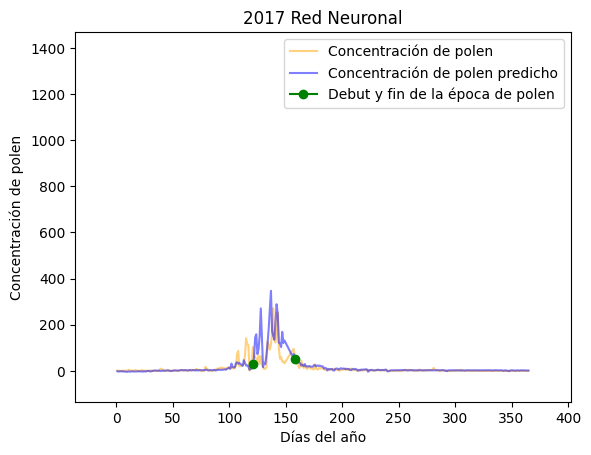

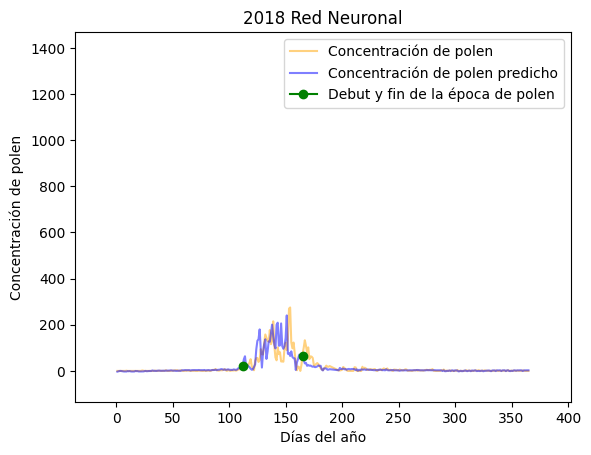

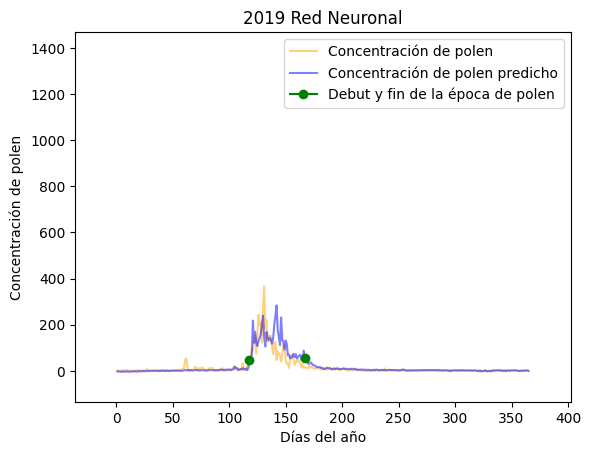

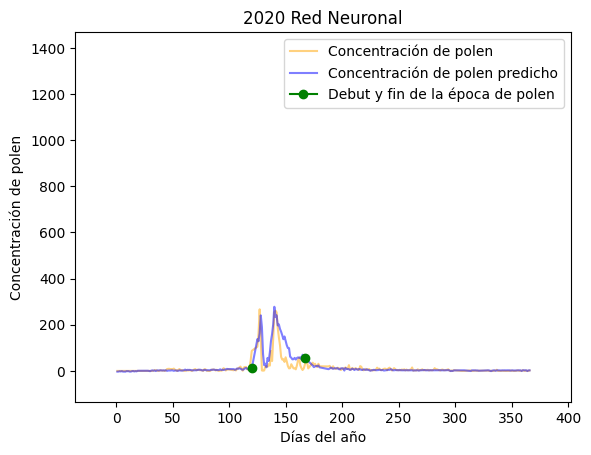

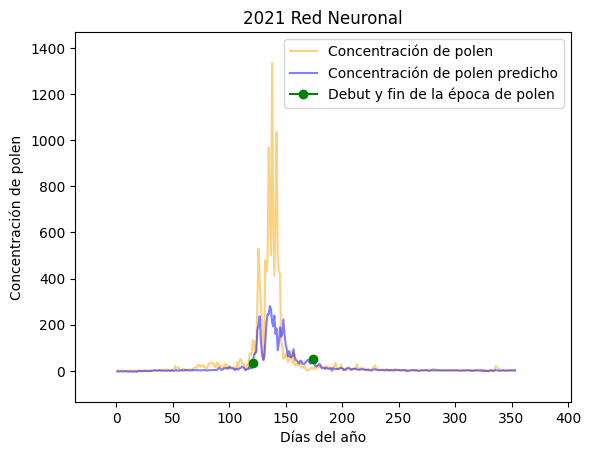

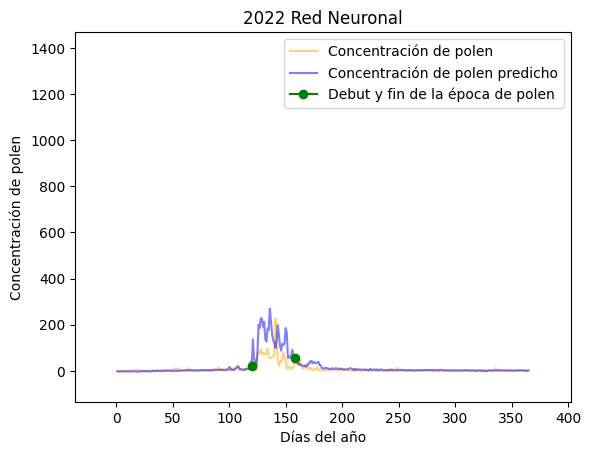

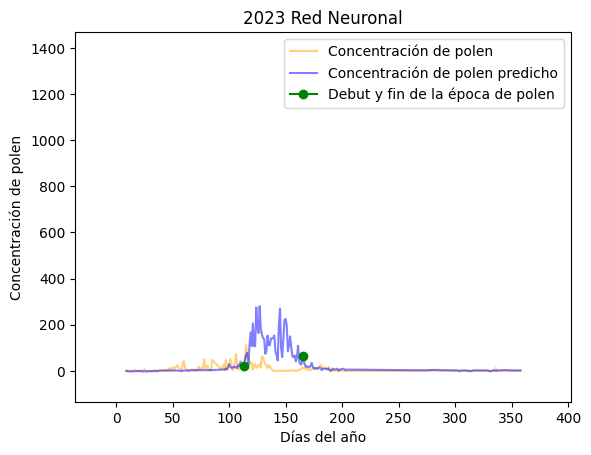

In [ ]:
# Declarar vectores - ajustados para el periodo 2017-2023 (7 años en lugar de 23)
anos = np.arange(1, 8, 1)  # 7 años (2017-2023)
concentracionpred = np.nan * np.zeros(7)
diaem = np.nan * np.zeros(7)
picopred = np.nan * np.zeros(7)

# Tomar máximo del año
ano = 1
n = 0

while ano <= 7:
    anofull = 2016 + ano  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size

    concentracionpred[ano-1] = np.max(pred[n:n+diasano])
    picopos = int(np.argmax(pred[n:n+diasano]))
    picopred[ano-1] = anoactual['día_del_año'].iloc[picopos]

    n = n + diasano
    ano = ano + 1

# Tomar el día que empieza la época de polen
ano = 1
n = 0

while ano <= 7:
    anofull = 2016 + ano  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size

    d = 0
    while d <= diasano:
        if np.nanmean(pred[n+d:n+d+30]) > concentracionpred[ano-1]*0.1 and pred[n+d] > 50:
            diaem[ano-1] = test_data['día_del_año'].iloc[n+d-1]
            break
        d = d + 1

    n = n + diasano
    ano = ano + 1

# Tomar el día que termina la época de polen
ano = 1
n = 0
diafin = np.nan * np.zeros(7)

while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year ==anofull]
  diasano = anoactual['fecha'].size

  d = 60
  while d<=diasano:
    if np.nanmean(pred[n+d-60:n+d]) > concentracionpred[ano-1]*0.1 and pred[n+d] > 50:
      diafin[ano-1] = test_data['día_del_año'].iloc[n+d]
    d=d+1

  n = n + diasano
  ano = ano + 1

# Declarar variables
i = 1
j = 0

# Loop para representar cada año (2017-2023)
while i <= 7:
    # Tomar datos contando los bisiestos
    anofull = 2016 + i  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size
    concentracion = anoactual['Poaceae (concentraciones)']

    # Crear la figura y los ejes
    fig, ax = plt.subplots()
    plt.plot(anoactual['día_del_año'], concentracion, linestyle='-', color='orange', label='Concentración de polen', alpha=0.5)

    # Represento el polen predicho
    plt.plot(anoactual['día_del_año'], pred[j:j+diasano], color='blue', label='Concentración de polen predicho', alpha=0.5)

    # Representar el día de comienzo calculado
    indice = anoactual.index[anoactual['día_del_año'] == diaem[i-1]] - train_data['día_del_año'].size
    plt.plot(diaem[i-1], pred[indice], color='green', marker='o', label='Debut y fin de la época de polen')

    # Representar el día de fin calculado
    indice = anoactual.index[anoactual['día_del_año'] == diafin[i-1]] - train_data['día_del_año'].size
    plt.plot(diafin[i-1], pred[indice], color='green', marker='o')

    # Etiquetas y título
    ax.set_xlabel('Días del año')
    ax.set_ylabel('Concentración de polen')
    ax.set_ylim(top=max(test_data['Poaceae (concentraciones)']) * 1.1)
    ax.set_ylim(bottom=-max(test_data['Poaceae (concentraciones)']) * 0.1)
    ax.set_xlim(right=366*1.1)
    ax.set_xlim(left=-366*0.1)

    ano_str = str(anofull)
    ax.set_title(ano_str + " Red Neuronal")
    ax.legend()

    # Guardar el gráfico
    plt.savefig("/content/drive/MyDrive/TFG/imagenes/" + "Final - debut_y_fin_" + ano_str + "Red Neuronal.png")

    # Aumento el año
    if i == 4:  # 2020 es bisiesto
        n = n + 1

    j = j + diasano
    i = i + 1

Principio y final de las concentraciones reales

In [ ]:
## Se requiere ejecutar el código anterior
# Declarar vectores - ajustados para el periodo 2017-2023 (7 años en lugar de 23)
anos = np.arange(1, 8, 1)  # 7 años (2017-2023)
concentracionreal = np.nan * np.zeros(7)
diaemreal = np.nan * np.zeros(7)
picoreal = np.nan * np.zeros(7)

# Tomar máximo del año
ano = 1

while ano <= 7:
    anofull = 2016 + ano  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size

    concentracionreal[ano-1] = np.max(anoactual['Poaceae (concentraciones)'])
    picopos = int(np.argmax(anoactual['Poaceae (concentraciones)']))
    picoreal[ano-1] = anoactual['día_del_año'].iloc[picopos]

    ano = ano + 1

# Tomar el día que empieza la época de polen
ano = 1
n = 0

while ano <= 7:
    anofull = 2016 + ano  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size

    d = 0
    while d <= diasano:
        if np.nanmean(test_data['Poaceae (concentraciones)'].iloc[n+d:n+d+30]) > concentracionreal[ano-1]*0.1 and test_data['Poaceae (concentraciones)'].iloc[n+d] > 50:
            diaemreal[ano-1] = test_data['día_del_año'].iloc[n+d-1]
            break
        d = d + 1

    n = n + diasano
    ano = ano + 1

# Tomar el día que termina la época de polen
ano = 1
n = 0
diafinreal = np.nan * np.zeros(7)

while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year ==anofull]
  diasano = anoactual['fecha'].size

  d = 60
  while d<=diasano:
    if np.nanmean(test_data['Poaceae (concentraciones)'].iloc[n+d-60:n+d]) > concentracionreal[ano-1]*0.1 and test_data['Poaceae (concentraciones)'].iloc[n+d] > 50:
      diafinreal[ano-1] = test_data['día_del_año'].iloc[n+d]
    d=d+1

  n = n + diasano
  ano = ano + 1


Suma de concentraciones

Mean absolute score = 2860.14
r2 score = -0.03


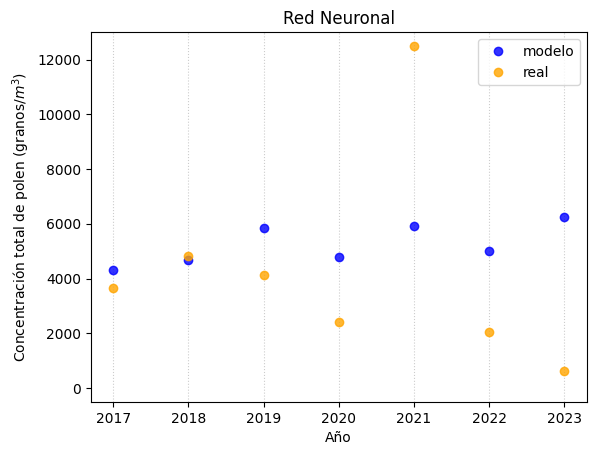

In [ ]:
## Se quiere comparar las concentraciones totales en las épocas de polen
ano = 1
concentotalreal = np.nan * np.zeros(7)
concentotalpred = np.nan * np.zeros(7)

# Calculo de la concentración cada año
while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year ==anofull]
  diasano = anoactual['día_del_año'].size

  diaemrealindx = int(diaemreal[ano-1])
  diafinrealindx = int(diafinreal[ano-1])
  concentotalreal[ano-1]=np.sum(anoactual['Poaceae (concentraciones)'].iloc[diaemrealindx:diafinrealindx])

  indiceprin = anoactual.index[anoactual['día_del_año'] == diaem[ano-1]] - train_data['día_del_año'].size
  indiceprin = int(indiceprin[0])
  indicefin = anoactual.index[anoactual['día_del_año'] == diafin[ano-1]] - train_data['día_del_año'].size
  indicefin = int(indicefin[0])
  concentotalpred[ano-1]=np.sum(pred[indiceprin:indicefin])

  ano = ano + 1

# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(concentotalreal, concentotalpred)
r2 = r2_score(concentotalreal, concentotalpred)

# Normalized Mean Bias y Normalized Mean Error
NMBSumaConcentracionesRedNeuronal = np.sum(concentotalpred - concentotalreal)/np.sum(concentotalreal)*100
NMESumaConcentracionesRedNeuronal = np.sum(np.abs(concentotalpred - concentotalreal))/np.sum(concentotalreal)*100

# Media de los resultados con la desviación típica
MediaSumaConcentraciones = np.mean(concentotalreal)
SDSumaConcentraciones = np.std(concentotalreal)

MediaSumaConcentracionesRedNeuronal = np.mean(concentotalpred)
SDSumaConcentracionesRedNeuronal = np.std(concentotalpred)

# Crear la figura y los ejes
plt.plot(anos+2016, concentotalpred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, concentotalreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Red Neuronal')
ax.set_xlabel('Año')
ax.set_ylabel(r'Concentración total de polen (granos/$m^3$)')
ax.set_ylim([-500, 13000])
ax.legend()

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Concentración total de cada año - Red Neuronal.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Pico de concentración

Mean absolute score = 209.84
r2 score = -0.11


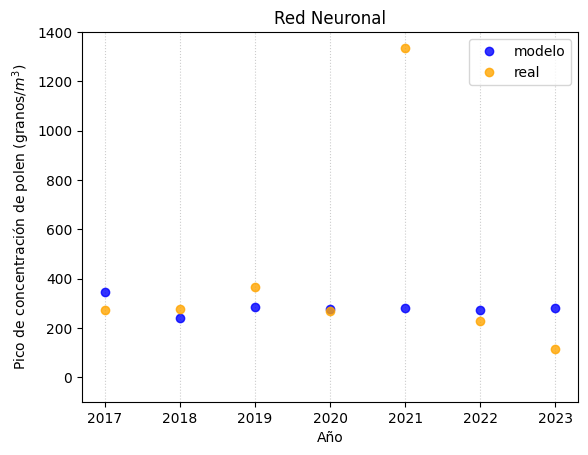

In [ ]:
# Ya se han calculado anteriormente
# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(concentracionreal, concentracionpred)
r2 = r2_score(concentracionreal, concentracionpred)

# Normalized Mean Bias y Normalized Mean Error
NMBPicoConcentracionRedNeuronal = np.sum(concentracionpred - concentracionreal)/np.sum(concentracionreal)*100
NMEPicoConcentracionRedNeuronal = np.sum(np.abs(concentracionpred - concentracionreal))/np.sum(concentracionreal)*100

# Media de los resultados con la desviación típica
MediaPicoConcentracion = np.mean(concentracionreal)
SDPicoConcentracion = np.std(concentracionreal)

MediaPicoConcentracionRedNeuronal = np.mean(concentracionpred)
SDPicoConcentracionRedNeuronal = np.std(concentracionpred)

# Crear la figura y los ejes
plt.plot(anos+2016, concentracionpred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, concentracionreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Red Neuronal')
ax.set_xlabel('Año')
ax.set_ylabel(r'Pico de concentración de polen (granos/$m^3$)')
ax.set_ylim([-100, 1400])
ax.legend()

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final -Pico de concentración de cada año - Red Neuronal.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Percentil 95

Mean absolute score = 153.11
r2 score = -0.01


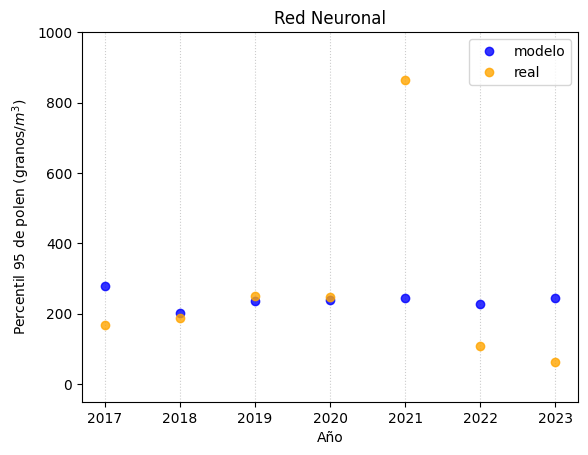

In [ ]:
## Se quiere comparar las concentraciones totales en las épocas de polen
ano = 1
percreal = np.nan * np.zeros(7)
percpred = np.nan * np.zeros(7)

# Calculo el percentil de cada año
while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year ==anofull]
  diasano = anoactual['día_del_año'].size

  diaemrealindx = int(diaemreal[ano-1])
  diafinrealindx = int(diafinreal[ano-1])
  percreal[ano-1]=np.percentile(anoactual['Poaceae (concentraciones)'].iloc[diaemrealindx:diafinrealindx], 95)

  indiceprin = anoactual.index[anoactual['día_del_año'] == diaem[ano-1]] - train_data['día_del_año'].size
  indiceprin = int(indiceprin[0])
  indicefin = anoactual.index[anoactual['día_del_año'] == diafin[ano-1]] - train_data['día_del_año'].size
  indicefin = int(indicefin[0])
  percpred[ano-1]=np.percentile(pred[indiceprin:indicefin], 95)

  ano = ano + 1

# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(percreal, percpred)
r2 = r2_score(percreal, percpred)

# Normalized Mean Bias y Normalized Mean Error
NMBPercentil95RedNeuronal = np.sum(percpred - percreal)/np.sum(percreal)*100
NMEPercentil95RedNeuronal = np.sum(np.abs(percpred - percreal))/np.sum(percreal)*100

# Media de los resultados con la desviación típica
MediaPercentil95 = np.mean(percreal)
SDPercentil95 = np.std(percreal)

MediaPercentil95RedNeuronal = np.mean(percpred)
SDPercentil95RedNeuronal = np.std(percpred)

# Crear la figura y los ejes
plt.plot(anos+2016, percpred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, percreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Red Neuronal')
ax.set_xlabel('Año')
ax.set_ylabel(r'Percentil 95 de polen (granos/$m^3$)')
ax.set_ylim([-50, 1000])
ax.legend()

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Percentil 95 de cada año - Red Neuronal.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

## Parámetros representativos: Temporales

Inicio (día)

Mean absolute score = 7.43
r2 score = -0.32


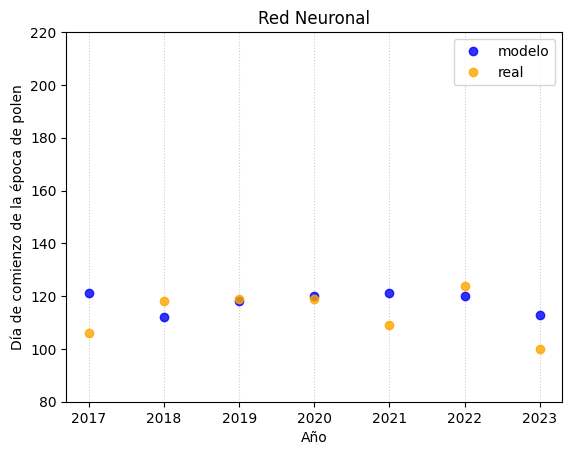

In [ ]:
# Ya tenemos los valores calculados
# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(diaemreal, diaem) # No estoy del todo contento de usar esto como el error
r2 = r2_score(diaemreal, diaem)

# Normalized Mean Bias y Normalized Mean Error
NMBInicioRedNeuronal = np.sum(diaem - diaemreal)/np.sum(diaemreal)*100
NMEInicioRedNeuronal = np.sum(np.abs(diaem - diaemreal))/np.sum(diaemreal)*100

# Media de los resultados con la desviación típica
MediaInicio = np.mean(diaemreal)
SDInicio = np.std(diaemreal)

MediaInicioRedNeuronal = np.mean(diaem)
SDInicioRedNeuronal = np.std(diaem)

# Crear la figura y los ejes
plt.plot(anos+2016, diaem, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, diaemreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Red Neuronal')
ax.set_xlabel('Año')
ax.set_ylabel('Día de comienzo de la época de polen')
ax.set_ylim([80, 220])
ax.legend(loc='upper right')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Día de comienzo de la época de polen - Red Neuronal.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Día del final

Mean absolute score = 11.43
r2 score = -0.65


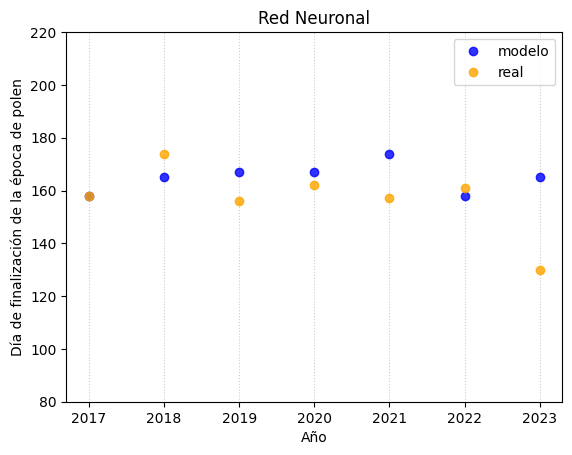

In [ ]:
# Ya tenemos los valores calculados
# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(diafinreal, diafin) # No estoy del todo contento de usar esto como el error
r2 = r2_score(diafinreal, diafin)

# Normalized Mean Bias y Normalized Mean Error
NMBFinalRedNeuronal = np.sum(diafin - diafinreal)/np.sum(diafinreal)*100
NMEFinalRedNeuronal = np.sum(np.abs(diafin - diafinreal))/np.sum(diafinreal)*100

# Media de los resultados con la desviación típica
MediaFinal = np.mean(diafinreal)
SDFinal = np.std(diafinreal)

MediaFinalRedNeuronal = np.mean(diafin)
SDFinalRedNeuronal = np.std(diafin)

# Crear la figura y los ejes
plt.plot(anos+2016, diafin, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, diafinreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Red Neuronal')
ax.set_xlabel('Año')
ax.set_ylabel('Día de finalización de la época de polen')
ax.set_ylim([80, 220])
ax.legend(loc='upper right')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Día de finalización de la época de polen - Red Neuronal.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Día de pico

Mean absolute score = 6.86
r2 score = 0.47


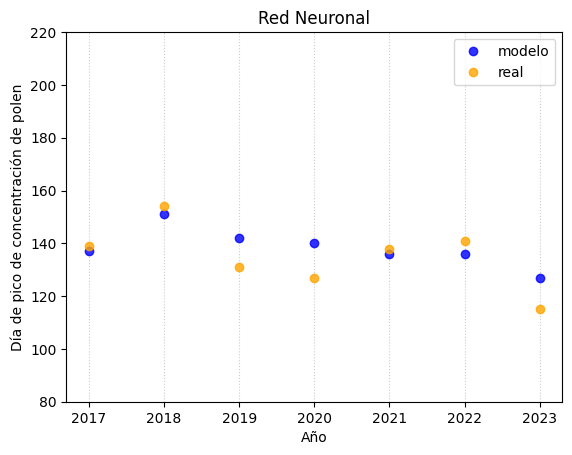

In [ ]:
# Ya se tienen los valores calculados
# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(picoreal, picopred) # No estoy del todo contento de usar esto como el error
r2 = r2_score(picoreal, picopred)

# Normalized Mean Bias y Normalized Mean Error
NMBPicoRedNeuronal = np.sum(picopred - picoreal)/np.sum(picoreal)*100
NMEPicoRedNeuronal = np.sum(np.abs(picopred - picoreal))/np.sum(picoreal)*100

# Media de los resultados con la desviación típica
MediaPico = np.mean(picoreal)
SDPico = np.std(picoreal)

MediaPicoRedNeuronal = np.mean(picopred)
SDPicoRedNeuronal = np.std(picopred)

# Crear la figura y los ejes
plt.plot(anos+2016, picopred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, picoreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Red Neuronal')
ax.set_xlabel('Año')
ax.set_ylabel('Día de pico de concentración de polen')
ax.set_ylim([80, 220])
ax.legend(loc='upper right')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Día de pico de concentración de polen - Red Neuronal.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Pico con los días por encima del percentil 95

Mean absolute score = 6.86
r2 score = 0.47


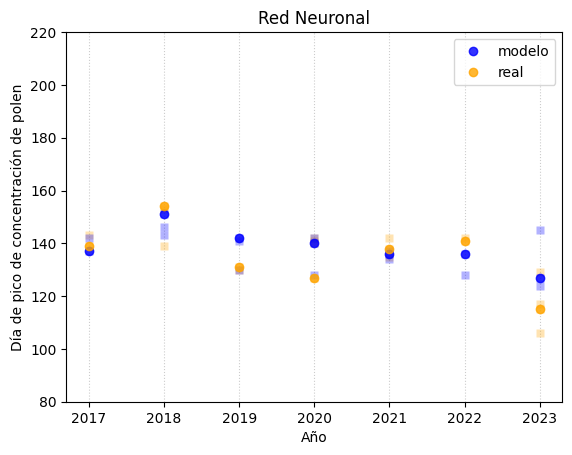

In [ ]:
# Ya se tienen los valores calculados
# Representación de los datos
fig, ax = plt.subplots()

# Determinar días que están por encima del percentil 95 real
# Primero declaro una matriz donde guardar los días por año (se ha asumido que no habrá más de 10 cada año)
dias95 = np.full((7,10), np.nan)
ano = 1

while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year == anofull]
  diasano = anoactual['día_del_año'].size

  i = 0
  d = 0
  while d < diasano:
    if anoactual['Poaceae (concentraciones)'].iloc[d] > percreal[ano-1]:
      dias95[ano-1,i] = anoactual['día_del_año'].iloc[d]
      i = i+1
    d = d+1
  ano = ano + 1

# Igual pero con las predicciónes
dias95pred = np.full((7,10), np.nan)
ano = 1
d = 0
diasanoacum = 0

while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year == anofull]
  diasano = anoactual['día_del_año'].size

  i = 0
  diasanoacum = diasanoacum + diasano
  while d < diasanoacum:
    if pred[d] > percpred[ano-1]:
      dias95pred[ano-1,i] = anoactual['día_del_año'].iloc[d+diasano-diasanoacum]
      i = i+1
    d = d+1
  ano = ano + 1

# Calcular errores
mae = mean_absolute_error(picoreal, picopred) # No estoy del todo contento de usar esto como el error
r2 = r2_score(picoreal, picopred)

# Normalized Mean Bias y Normalized Mean Error
NMBPicoRedNeuronal = np.sum(picopred - picoreal)/np.sum(picoreal)*100
NMEPicoRedNeuronal = np.sum(np.abs(picopred - picoreal))/np.sum(picoreal)*100

# Media de los resultados con la desviación típica
MediaPico = np.mean(picoreal)
SDPico = np.std(picoreal)

MediaPicoRedNeuronal = np.mean(picopred)
SDPicoRedNeuronal = np.std(picopred)

# Crear la figura y los ejes
# Valores de los días por encima de del percentil 95
ano = 1

while ano <= 7:
  anorep = np.full(10, ano+2016)
  plt.plot(anorep, dias95[ano-1,:], linestyle='', marker='s', color='orange', markeredgecolor='none', alpha=0.3)
  plt.plot(anorep, dias95pred[ano-1,:], linestyle='', marker='s', color='blue', markeredgecolor='none', alpha=0.3)
  ano = ano + 1

plt.plot(anos+2016, picopred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, picoreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Red Neuronal')
ax.set_xlabel('Año')
ax.set_ylabel('Día de pico de concentración de polen')
ax.set_ylim([80, 220])
ax.legend(loc='upper right')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Día de pico y 95 de concentración de polen - Red Neuronal.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

 # Predicción del comienzo, pico y final de las épocas de polen Random Forest

Se va a usar esta misma sección para los 3 modelos estudiados para ahorrar tiempo.

Toda esta parte de código es repetido del apartado de elección de modelo

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from matplotlib.offsetbox import AnchoredText
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

Los modulos no necesarios se han quitado

In [ ]:
# Leer los datos ya limpiados y reducidos desde un archivo excel
datos_reducidos = pd.read_excel("/content/drive/MyDrive/TFG/datos_reducidos.xlsx")

In [ ]:
# Definimos la fecha donde separamos los datos a entrenar y predecir
fecha_limite = '2017-01-01'

# Definir las columnas que se quiere usar en el modelo
# Donde y representa los datos que se quiere predecir y X representa los datos que entrenarán el modelo

# Datos de entrenamiento (antes de la fecha límite)
train_data = datos_reducidos[datos_reducidos['fecha'] < fecha_limite]
X_train = train_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                     'Humedad relativa (%)', 'Dirección del viento (º)',
                     'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_train = train_data['Poaceae (concentraciones)']

# Datos a testear (después de la fecha límite)
test_data = datos_reducidos[datos_reducidos['fecha'] >= fecha_limite]
X_test = test_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                   'Humedad relativa (%)', 'Dirección del viento (º)',
                   'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_test = test_data['Poaceae (concentraciones)']

# Datos totales
X_total = datos_reducidos[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                          'Humedad relativa (%)', 'Dirección del viento (º)',
                          'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_total = datos_reducidos['Poaceae (concentraciones)']

In [ ]:
pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=6)),
    ("model", RandomForestRegressor(max_depth=20,
                                    max_features='sqrt',
                                    min_samples_leaf=2,
                                    n_estimators=200))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', QuantileTransformer()), ('PCA', PCA(n_components=6)),
                ('model',
                 RandomForestRegressor(max_depth=20, max_features='sqrt',
                                       min_samples_leaf=2, n_estimators=200))])

In [ ]:
pred = pipe.predict(X_test)

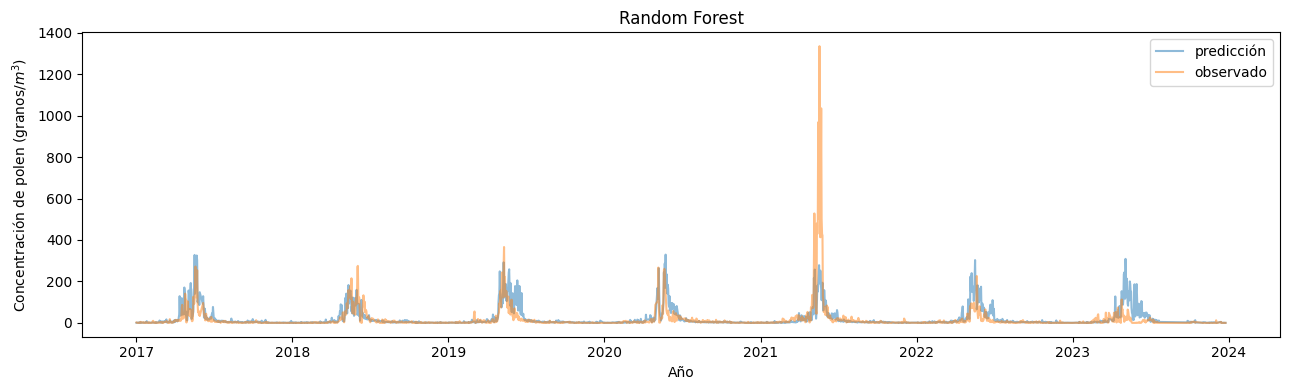

In [ ]:
fig, ax = plt.subplots(figsize=(13, 4))
plt.plot(test_data['fecha'], pred, label='predicción', alpha=0.5)
plt.plot(test_data['fecha'], test_data['Poaceae (concentraciones)'], label='observado', alpha=0.5)
plt.legend()
ax.set_title("Random Forest")
ax.set_xlabel('Año')
ax.set_ylabel(r"Concentración de polen (granos/$m^3$)")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/TFG/imagenes/Final - predicción completa Random Forest')

In [ ]:
# Calcular errores
mae = mean_absolute_error(test_data['Poaceae (concentraciones)'], pred) # No estoy del todo contento de usar esto como el error
r2 = r2_score(test_data['Poaceae (concentraciones)'], pred)

# Normalized Mean Bias y Normalized Mean Error
NMBEvTemporalRandomForest = np.sum(test_data['Poaceae (concentraciones)'] - pred)/np.sum(test_data['Poaceae (concentraciones)'])*100
NMEEvTemporalRandomForest = np.sum(np.abs(test_data['Poaceae (concentraciones)'] - pred))/np.sum(test_data['Poaceae (concentraciones)'])*100

# Media de los resultados con la desviación típica
MediaEvTemporal = np.mean(test_data['Poaceae (concentraciones)'])
SDEvTemporal = np.std(test_data['Poaceae (concentraciones)'])

MediaEvTemporalRandomForest = np.mean(pred)
SDEvTemporalRandomForest = np.std(pred)

print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")
print(f"Normalized Mean Bias = {NMBEvTemporalRandomForest:.2f}")
print(f"Normalized Mean Error = {NMEEvTemporalRandomForest:.2f}")

Mean absolute score = 16.58
r2 score = 0.29
Normalized Mean Bias = -21.25
Normalized Mean Error = 92.79


## Parámetros representativos: Concentración

Predicción del comienzo y final de la época de polen

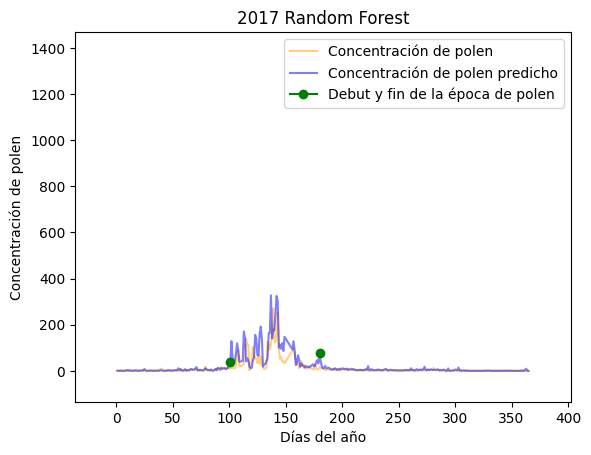

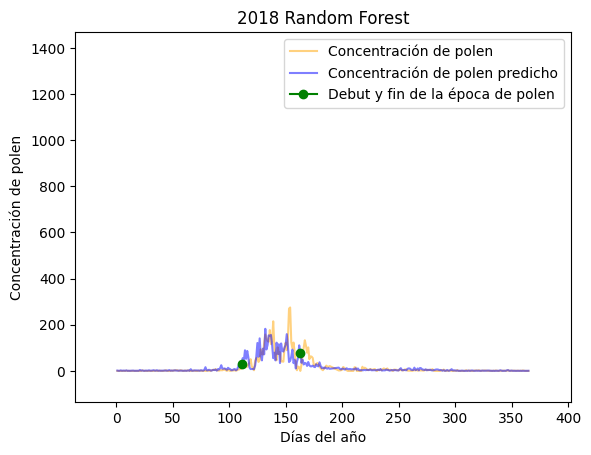

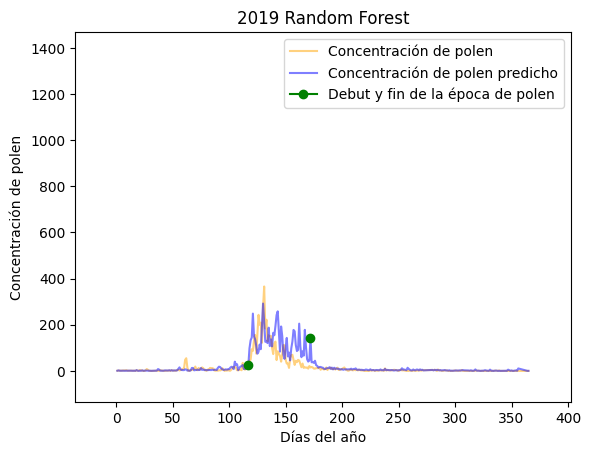

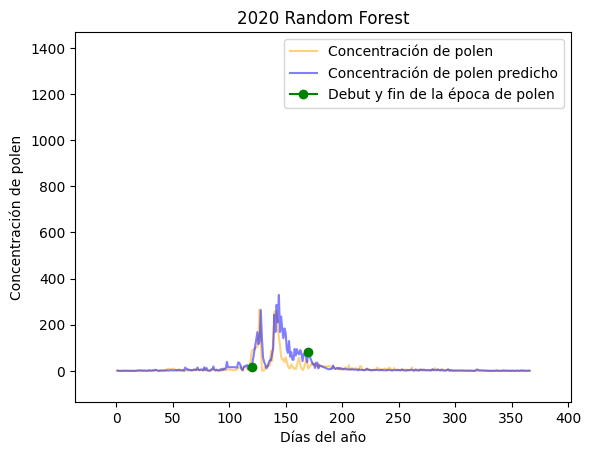

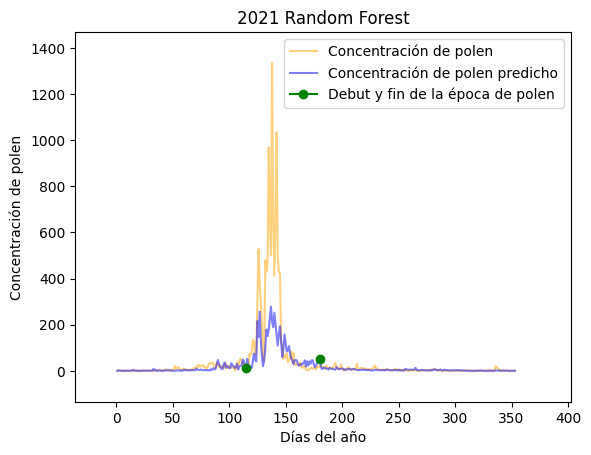

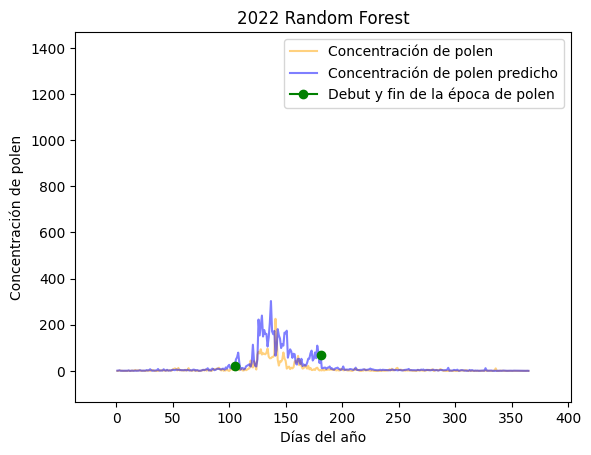

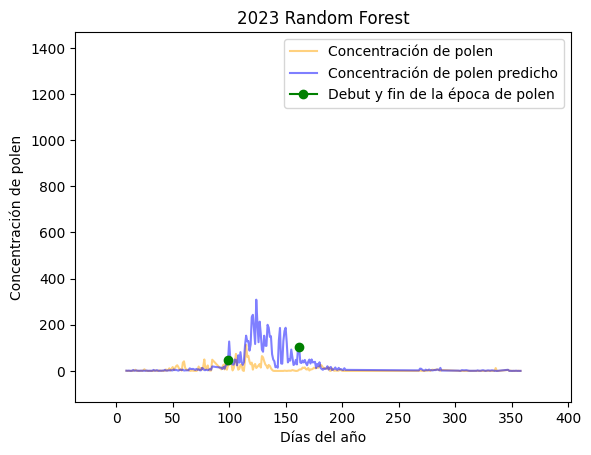

In [ ]:
# Declarar vectores - ajustados para el periodo 2017-2023 (7 años en lugar de 23)
anos = np.arange(1, 8, 1)  # 7 años (2017-2023)
concentracionpred = np.nan * np.zeros(7)
diaem = np.nan * np.zeros(7)
picopred = np.nan * np.zeros(7)

# Tomar máximo del año
ano = 1
n = 0

while ano <= 7:
    anofull = 2016 + ano  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size

    concentracionpred[ano-1] = np.max(pred[n:n+diasano])
    picopos = int(np.argmax(pred[n:n+diasano]))
    picopred[ano-1] = anoactual['día_del_año'].iloc[picopos]

    n = n + diasano
    ano = ano + 1

# Tomar el día que empieza la época de polen
ano = 1
n = 0

while ano <= 7:
    anofull = 2016 + ano  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size

    d = 0
    while d <= diasano:
        if np.nanmean(pred[n+d:n+d+30]) > concentracionpred[ano-1]*0.1 and pred[n+d] > 50:
            diaem[ano-1] = test_data['día_del_año'].iloc[n+d-1]
            break
        d = d + 1

    n = n + diasano
    ano = ano + 1

# Tomar el día que termina la época de polen
ano = 1
n = 0
diafin = np.nan * np.zeros(7)

while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year ==anofull]
  diasano = anoactual['fecha'].size

  d = 60
  while d<=diasano:
    if np.nanmean(pred[n+d-60:n+d]) > concentracionpred[ano-1]*0.1 and pred[n+d] > 50:
      diafin[ano-1] = test_data['día_del_año'].iloc[n+d]
    d=d+1

  n = n + diasano
  ano = ano + 1

# Declarar variables
i = 1
j = 0

# Loop para representar cada año (2017-2023)
while i <= 7:
    # Tomar datos contando los bisiestos
    anofull = 2016 + i  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size
    concentracion = anoactual['Poaceae (concentraciones)']

    # Crear la figura y los ejes
    fig, ax = plt.subplots()
    plt.plot(anoactual['día_del_año'], concentracion, linestyle='-', color='orange', label='Concentración de polen', alpha=0.5)

    # Represento el polen predicho
    plt.plot(anoactual['día_del_año'], pred[j:j+diasano], color='blue', label='Concentración de polen predicho', alpha=0.5)

    # Representar el día de comienzo calculado
    indice = anoactual.index[anoactual['día_del_año'] == diaem[i-1]] - train_data['día_del_año'].size
    plt.plot(diaem[i-1], pred[indice], color='green', marker='o', label='Debut y fin de la época de polen')

    # Representar el día de fin calculado
    indice = anoactual.index[anoactual['día_del_año'] == diafin[i-1]] - train_data['día_del_año'].size
    plt.plot(diafin[i-1], pred[indice], color='green', marker='o')

    # Etiquetas y título
    ax.set_xlabel('Días del año')
    ax.set_ylabel('Concentración de polen')
    ax.set_ylim(top=max(test_data['Poaceae (concentraciones)']) * 1.1)
    ax.set_ylim(bottom=-max(test_data['Poaceae (concentraciones)']) * 0.1)
    ax.set_xlim(right=366*1.1)
    ax.set_xlim(left=-366*0.1)

    ano_str = str(anofull)
    ax.set_title(ano_str + " Random Forest")
    ax.legend()

    # Guardar el gráfico
    plt.savefig("/content/drive/MyDrive/TFG/imagenes/" + "Final - debut_y_fin_" + ano_str + "Random Forest.png")

    # Aumento el año
    if i == 4:  # 2020 es bisiesto
        n = n + 1

    j = j + diasano
    i = i + 1

Principio y final de las concentraciones reales

In [ ]:
## Se requiere ejecutar el código anterior
# Declarar vectores - ajustados para el periodo 2017-2023 (7 años en lugar de 23)
anos = np.arange(1, 8, 1)  # 7 años (2017-2023)
concentracionreal = np.nan * np.zeros(7)
diaemreal = np.nan * np.zeros(7)
picoreal = np.nan * np.zeros(7)

# Tomar máximo del año
ano = 1

while ano <= 7:
    anofull = 2016 + ano  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size

    concentracionreal[ano-1] = np.max(anoactual['Poaceae (concentraciones)'])
    picopos = int(np.argmax(anoactual['Poaceae (concentraciones)']))
    picoreal[ano-1] = anoactual['día_del_año'].iloc[picopos]

    ano = ano + 1

# Tomar el día que empieza la época de polen
ano = 1
n = 0

while ano <= 7:
    anofull = 2016 + ano  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size

    d = 0
    while d <= diasano:
        if np.nanmean(test_data['Poaceae (concentraciones)'].iloc[n+d:n+d+30]) > concentracionreal[ano-1]*0.1 and test_data['Poaceae (concentraciones)'].iloc[n+d] > 50:
            diaemreal[ano-1] = test_data['día_del_año'].iloc[n+d-1]
            break
        d = d + 1

    n = n + diasano
    ano = ano + 1

# Tomar el día que termina la época de polen
ano = 1
n = 0
diafinreal = np.nan * np.zeros(7)

while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year ==anofull]
  diasano = anoactual['fecha'].size

  d = 60
  while d<=diasano:
    if np.nanmean(test_data['Poaceae (concentraciones)'].iloc[n+d-60:n+d]) > concentracionreal[ano-1]*0.1 and test_data['Poaceae (concentraciones)'].iloc[n+d] > 50:
      diafinreal[ano-1] = test_data['día_del_año'].iloc[n+d]
    d=d+1

  n = n + diasano
  ano = ano + 1


Suma de concentraciones

Mean absolute score = 3608.77
r2 score = -0.31


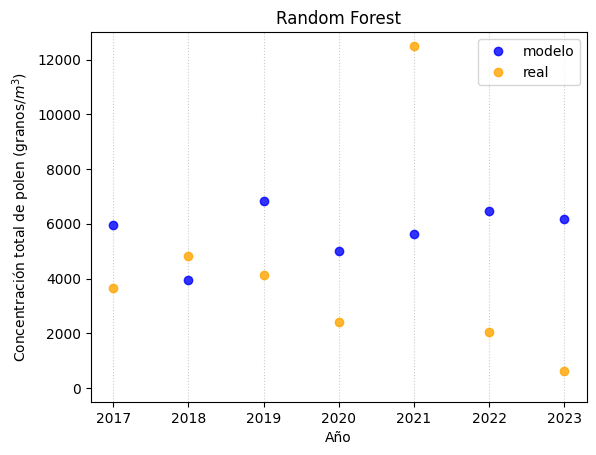

In [ ]:
## Se quiere comparar las concentraciones totales en las épocas de polen
ano = 1
concentotalreal = np.nan * np.zeros(7)
concentotalpred = np.nan * np.zeros(7)

# Calculo de la concentración cada año
while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year ==anofull]
  diasano = anoactual['día_del_año'].size

  diaemrealindx = int(diaemreal[ano-1])
  diafinrealindx = int(diafinreal[ano-1])
  concentotalreal[ano-1]=np.sum(anoactual['Poaceae (concentraciones)'].iloc[diaemrealindx:diafinrealindx])

  indiceprin = anoactual.index[anoactual['día_del_año'] == diaem[ano-1]] - train_data['día_del_año'].size
  indiceprin = int(indiceprin[0])
  indicefin = anoactual.index[anoactual['día_del_año'] == diafin[ano-1]] - train_data['día_del_año'].size
  indicefin = int(indicefin[0])
  concentotalpred[ano-1]=np.sum(pred[indiceprin:indicefin])

  ano = ano + 1

# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(concentotalreal, concentotalpred)
r2 = r2_score(concentotalreal, concentotalpred)

# Normalized Mean Bias y Normalized Mean Error
NMBSumaConcentracionesRandomForest = np.sum(concentotalpred - concentotalreal)/np.sum(concentotalreal)*100
NMESumaConcentracionesRandomForest = np.sum(np.abs(concentotalpred - concentotalreal))/np.sum(concentotalreal)*100

# Media de los resultados con la desviación típica
MediaSumaConcentraciones = np.mean(concentotalreal)
SDSumaConcentraciones = np.std(concentotalreal)

MediaSumaConcentracionesRandomForest = np.mean(concentotalpred)
SDSumaConcentracionesRandomForest = np.std(concentotalpred)

# Crear la figura y los ejes
plt.plot(anos+2016, concentotalpred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, concentotalreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Random Forest')
ax.set_xlabel('Año')
ax.set_ylabel(r'Concentración total de polen (granos/$m^3$)')
ax.set_ylim([-500, 13000])
ax.legend()

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Concentración total de cada año - Random Forest.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Pico de concentración

Mean absolute score = 230.57
r2 score = -0.14


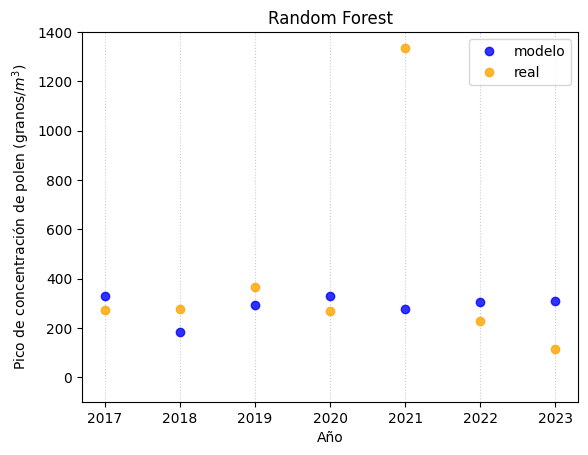

In [ ]:
# Ya se han calculado anteriormente
# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(concentracionreal, concentracionpred)
r2 = r2_score(concentracionreal, concentracionpred)

# Normalized Mean Bias y Normalized Mean Error
NMBPicoConcentracionRandomForest = np.sum(concentracionpred - concentracionreal)/np.sum(concentracionreal)*100
NMEPicoConcentracionRandomForest = np.sum(np.abs(concentracionpred - concentracionreal))/np.sum(concentracionreal)*100

# Media de los resultados con la desviación típica
MediaPicoConcentracion = np.mean(concentracionreal)
SDPicoConcentracion = np.std(concentracionreal)

MediaPicoConcentracionRandomForest = np.mean(concentracionpred)
SDPicoConcentracionRandomForest = np.std(concentracionpred)

# Crear la figura y los ejes
plt.plot(anos+2016, concentracionpred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, concentracionreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Random Forest')
ax.set_xlabel('Año')
ax.set_ylabel(r'Pico de concentración de polen (granos/$m^3$)')
ax.set_ylim([-100, 1400])
ax.legend()

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final -Pico de concentración de cada año - Random Forest.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Percentil 95

Mean absolute score = 140.70
r2 score = 0.00


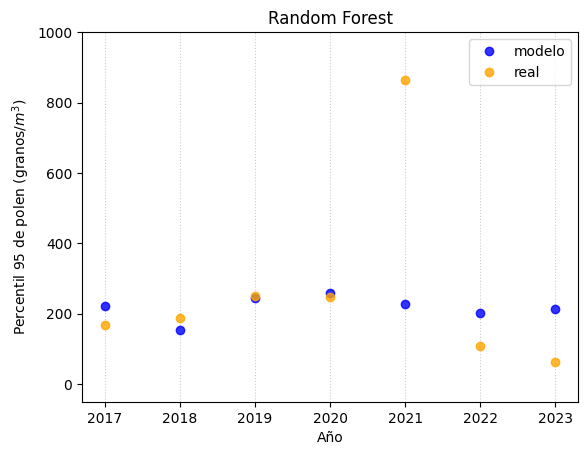

In [ ]:
## Se quiere comparar las concentraciones totales en las épocas de polen
ano = 1
percreal = np.nan * np.zeros(7)
percpred = np.nan * np.zeros(7)

# Calculo el percentil de cada año
while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year ==anofull]
  diasano = anoactual['día_del_año'].size

  diaemrealindx = int(diaemreal[ano-1])
  diafinrealindx = int(diafinreal[ano-1])
  percreal[ano-1]=np.percentile(anoactual['Poaceae (concentraciones)'].iloc[diaemrealindx:diafinrealindx], 95)

  indiceprin = anoactual.index[anoactual['día_del_año'] == diaem[ano-1]] - train_data['día_del_año'].size
  indiceprin = int(indiceprin[0])
  indicefin = anoactual.index[anoactual['día_del_año'] == diafin[ano-1]] - train_data['día_del_año'].size
  indicefin = int(indicefin[0])
  percpred[ano-1]=np.percentile(pred[indiceprin:indicefin], 95)

  ano = ano + 1

# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(percreal, percpred)
r2 = r2_score(percreal, percpred)

# Normalized Mean Bias y Normalized Mean Error
NMBPercentil95RandomForest = np.sum(percpred - percreal)/np.sum(percreal)*100
NMEPercentil95RandomForest = np.sum(np.abs(percpred - percreal))/np.sum(percreal)*100

# Media de los resultados con la desviación típica
MediaPercentil95 = np.mean(percreal)
SDPercentil95 = np.std(percreal)

MediaPercentil95RandomForest = np.mean(percpred)
SDPercentil95RandomForest = np.std(percpred)

# Crear la figura y los ejes
plt.plot(anos+2016, percpred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, percreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Random Forest')
ax.set_xlabel('Año')
ax.set_ylabel(r'Percentil 95 de polen (granos/$m^3$)')
ax.set_ylim([-50, 1000])
ax.legend()

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Percentil 95 de cada año - Random Forest.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

## Parámetros representativos: Temporales

Inicio (día)

Mean absolute score = 5.86
r2 score = -0.06


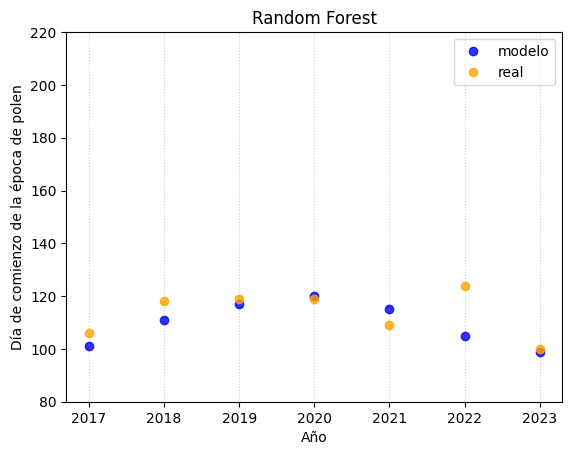

In [ ]:
# Ya tenemos los valores calculados
# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(diaemreal, diaem) # No estoy del todo contento de usar esto como el error
r2 = r2_score(diaemreal, diaem)

# Normalized Mean Bias y Normalized Mean Error
NMBInicioRandomForest = np.sum(diaem - diaemreal)/np.sum(diaemreal)*100
NMEInicioRandomForest = np.sum(np.abs(diaem - diaemreal))/np.sum(diaemreal)*100

# Media de los resultados con la desviación típica
MediaInicio = np.mean(diaemreal)
SDInicio = np.std(diaemreal)

MediaInicioRandomForest = np.mean(diaem)
SDInicioRandomForest = np.std(diaem)

# Crear la figura y los ejes
plt.plot(anos+2016, diaem, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, diaemreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Random Forest')
ax.set_xlabel('Año')
ax.set_ylabel('Día de comienzo de la época de polen')
ax.set_ylim([80, 220])
ax.legend(loc='upper right')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Día de comienzo de la época de polen - Random Forest.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Día del final

Mean absolute score = 18.86
r2 score = -1.71


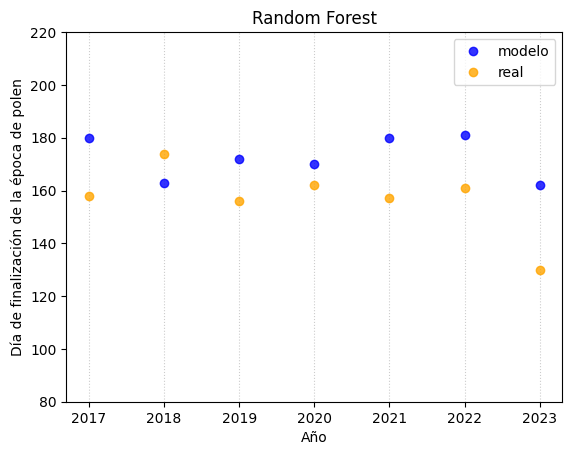

In [ ]:
# Ya tenemos los valores calculados
# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(diafinreal, diafin) # No estoy del todo contento de usar esto como el error
r2 = r2_score(diafinreal, diafin)

# Normalized Mean Bias y Normalized Mean Error
NMBFinalRandomForest = np.sum(diafin - diafinreal)/np.sum(diafinreal)*100
NMEFinalRandomForest = np.sum(np.abs(diafin - diafinreal))/np.sum(diafinreal)*100

# Media de los resultados con la desviación típica
MediaFinal = np.mean(diafinreal)
SDFinal = np.std(diafinreal)

MediaFinalRandomForest = np.mean(diafin)
SDFinalRandomForest = np.std(diafin)

# Crear la figura y los ejes
plt.plot(anos+2016, diafin, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, diafinreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Random Forest')
ax.set_xlabel('Año')
ax.set_ylabel('Día de finalización de la época de polen')
ax.set_ylim([80, 220])
ax.legend(loc='upper right')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Día de finalización de la época de polen - Random Forest.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Día de pico

Mean absolute score = 8.00
r2 score = 0.03


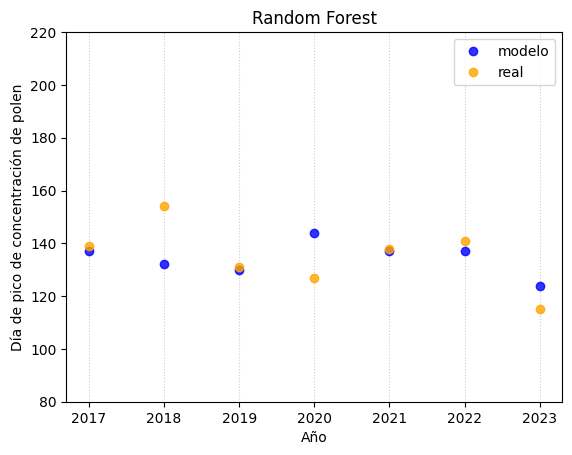

In [ ]:
# Ya se tienen los valores calculados
# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(picoreal, picopred) # No estoy del todo contento de usar esto como el error
r2 = r2_score(picoreal, picopred)

# Normalized Mean Bias y Normalized Mean Error
NMBPicoRandomForest = np.sum(picopred - picoreal)/np.sum(picoreal)*100
NMEPicoRandomForest = np.sum(np.abs(picopred - picoreal))/np.sum(picoreal)*100

# Media de los resultados con la desviación típica
MediaPico = np.mean(picoreal)
SDPico = np.std(picoreal)

MediaPicoRandomForest = np.mean(picopred)
SDPicoRandomForest = np.std(picopred)

# Crear la figura y los ejes
plt.plot(anos+2016, picopred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, picoreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Random Forest')
ax.set_xlabel('Año')
ax.set_ylabel('Día de pico de concentración de polen')
ax.set_ylim([80, 220])
ax.legend(loc='upper right')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Día de pico de concentración de polen - Random Forest.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Pico con los días por encima del percentil 95

Mean absolute score = 8.00
r2 score = 0.03


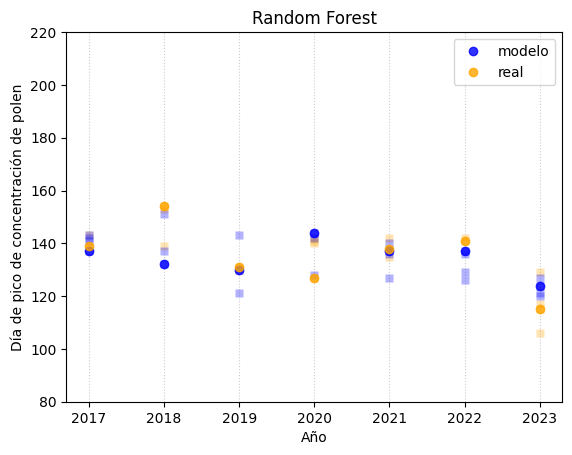

In [ ]:
# Ya se tienen los valores calculados
# Representación de los datos
fig, ax = plt.subplots()

# Determinar días que están por encima del percentil 95 real
# Primero declaro una matriz donde guardar los días por año (se ha asumido que no habrá más de 10 cada año)
dias95 = np.full((7,10), np.nan)
ano = 1

while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year == anofull]
  diasano = anoactual['día_del_año'].size

  i = 0
  d = 0
  while d < diasano:
    if anoactual['Poaceae (concentraciones)'].iloc[d] > percreal[ano-1]:
      dias95[ano-1,i] = anoactual['día_del_año'].iloc[d]
      i = i+1
    d = d+1
  ano = ano + 1

# Igual pero con las predicciónes
dias95pred = np.full((7,10), np.nan)
ano = 1
d = 0
diasanoacum = 0

while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year == anofull]
  diasano = anoactual['día_del_año'].size

  i = 0
  diasanoacum = diasanoacum + diasano
  while d < diasanoacum:
    if pred[d] > percpred[ano-1]:
      dias95pred[ano-1,i] = anoactual['día_del_año'].iloc[d+diasano-diasanoacum]
      i = i+1
    d = d+1
  ano = ano + 1

# Calcular errores
mae = mean_absolute_error(picoreal, picopred) # No estoy del todo contento de usar esto como el error
r2 = r2_score(picoreal, picopred)

# Normalized Mean Bias y Normalized Mean Error
NMBPicoRandomForest = np.sum(picopred - picoreal)/np.sum(picoreal)*100
NMEPicoRandomForest = np.sum(np.abs(picopred - picoreal))/np.sum(picoreal)*100

# Media de los resultados con la desviación típica
MediaPico = np.mean(picoreal)
SDPico = np.std(picoreal)

MediaPicoRandomForest = np.mean(picopred)
SDPicoRandomForest = np.std(picopred)

# Crear la figura y los ejes
# Valores de los días por encima de del percentil 95
ano = 1

while ano <= 7:
  anorep = np.full(10, ano+2016)
  plt.plot(anorep, dias95[ano-1,:], linestyle='', marker='s', color='orange', markeredgecolor='none', alpha=0.3)
  plt.plot(anorep, dias95pred[ano-1,:], linestyle='', marker='s', color='blue', markeredgecolor='none', alpha=0.3)
  ano = ano + 1

plt.plot(anos+2016, picopred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, picoreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Random Forest')
ax.set_xlabel('Año')
ax.set_ylabel('Día de pico de concentración de polen')
ax.set_ylim([80, 220])
ax.legend(loc='upper right')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Día de pico y 95 de concentración de polen - Random Forest.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

 # Predicción del comienzo, pico y final de las épocas de polen Nearest Neighbors

Se va a usar esta misma sección para los 3 modelos estudiados para ahorrar tiempo.

Toda esta parte de código es repetido del apartado de elección de modelo

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
from matplotlib.offsetbox import AnchoredText
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score

Los modulos no necesarios se han quitado

In [ ]:
# Leer los datos ya limpiados y reducidos desde un archivo excel
datos_reducidos = pd.read_excel("/content/drive/MyDrive/TFG/datos_reducidos.xlsx")

In [ ]:
# Definimos la fecha donde separamos los datos a entrenar y predecir
fecha_limite = '2017-01-01'

# Definir las columnas que se quiere usar en el modelo
# Donde y representa los datos que se quiere predecir y X representa los datos que entrenarán el modelo

# Datos de entrenamiento (antes de la fecha límite)
train_data = datos_reducidos[datos_reducidos['fecha'] < fecha_limite]
X_train = train_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                     'Humedad relativa (%)', 'Dirección del viento (º)',
                     'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_train = train_data['Poaceae (concentraciones)']

# Datos a testear (después de la fecha límite)
test_data = datos_reducidos[datos_reducidos['fecha'] >= fecha_limite]
X_test = test_data[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                   'Humedad relativa (%)', 'Dirección del viento (º)',
                   'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_test = test_data['Poaceae (concentraciones)']

# Datos totales
X_total = datos_reducidos[['Unnamed: 1', 'T_max (ºC)', 'T_Min (ºC)', 'T_Med (ºC)',
                          'Humedad relativa (%)', 'Dirección del viento (º)',
                          'Precipitacion', 'Velocidad del viento', 'día_del_año']]
y_total = datos_reducidos['Poaceae (concentraciones)']

In [ ]:
pipe = Pipeline([
    ("scale", QuantileTransformer()),
    ("PCA", PCA(n_components=6)),
    ("model", KNeighborsRegressor(metric='manhattan',
                                  n_neighbors=16,
                                  p=1,
                                  weights='distance'))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', QuantileTransformer()), ('PCA', PCA(n_components=6)),
                ('model',
                 KNeighborsRegressor(metric='manhattan', n_neighbors=16, p=1,
                                     weights='distance'))])

In [ ]:
pred = pipe.predict(X_test)

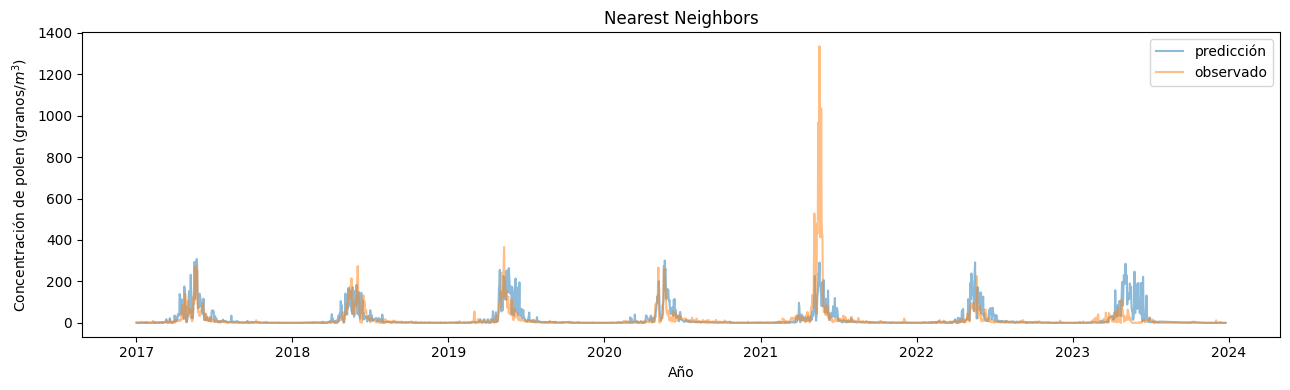

In [ ]:
fig, ax = plt.subplots(figsize=(13, 4))
plt.plot(test_data['fecha'], pred, label='predicción', alpha=0.5)
plt.plot(test_data['fecha'], test_data['Poaceae (concentraciones)'], label='observado', alpha=0.5)
plt.legend()
ax.set_title("Nearest Neighbors")
ax.set_xlabel('Año')
ax.set_ylabel(r"Concentración de polen (granos/$m^3$)")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/TFG/imagenes/Final - predicción completa Nearest Neighbors')

In [ ]:
# Calcular errores
mae = mean_absolute_error(test_data['Poaceae (concentraciones)'], pred) # No estoy del todo contento de usar esto como el error
r2 = r2_score(test_data['Poaceae (concentraciones)'], pred)

# Normalized Mean Bias y Normalized Mean Error
NMBEvTemporalNearestNeighbors = np.sum(test_data['Poaceae (concentraciones)'] - pred)/np.sum(test_data['Poaceae (concentraciones)'])*100
NMEEvTemporalNearestNeighbors = np.sum(np.abs(test_data['Poaceae (concentraciones)'] - pred))/np.sum(test_data['Poaceae (concentraciones)'])*100

# Media de los resultados con la desviación típica
MediaEvTemporal = np.mean(test_data['Poaceae (concentraciones)'])
SDEvTemporal = np.std(test_data['Poaceae (concentraciones)'])

MediaEvTemporalNearestNeighbors = np.mean(pred)
SDEvTemporalNearestNeighbors = np.std(pred)

print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")
print(f"Normalized Mean Bias = {NMBEvTemporalNearestNeighbors:.2f}")
print(f"Normalized Mean Error = {NMEEvTemporalNearestNeighbors:.2f}")

Mean absolute score = 17.16
r2 score = 0.26
Normalized Mean Bias = -18.10
Normalized Mean Error = 96.01


## Parámetros representativos: Concentración

Predicción del comienzo y final de la época de polen

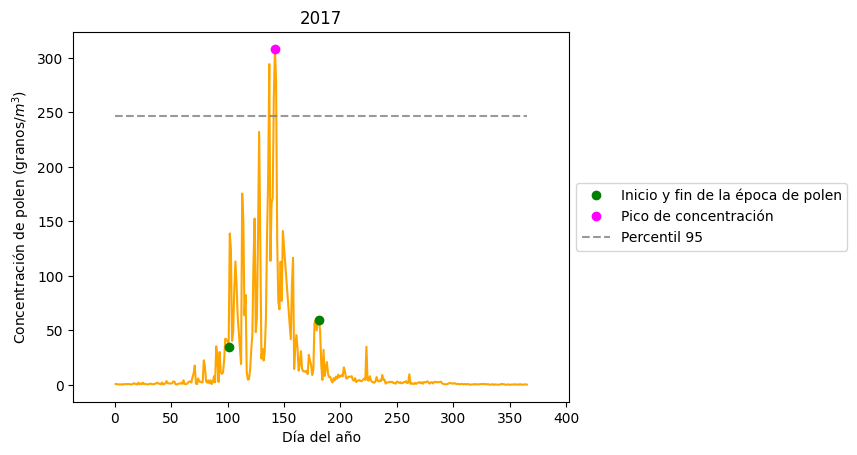

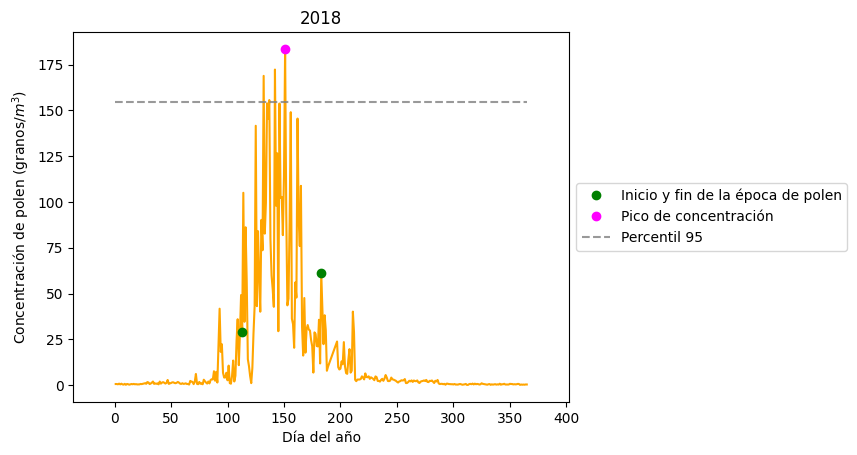

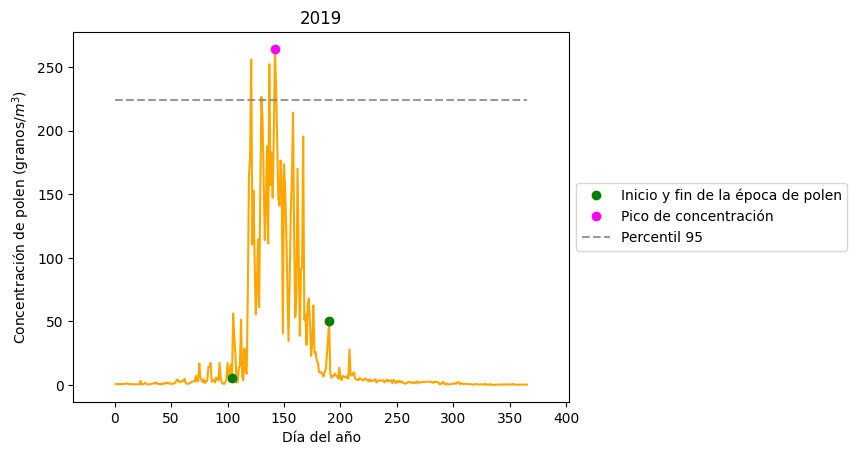

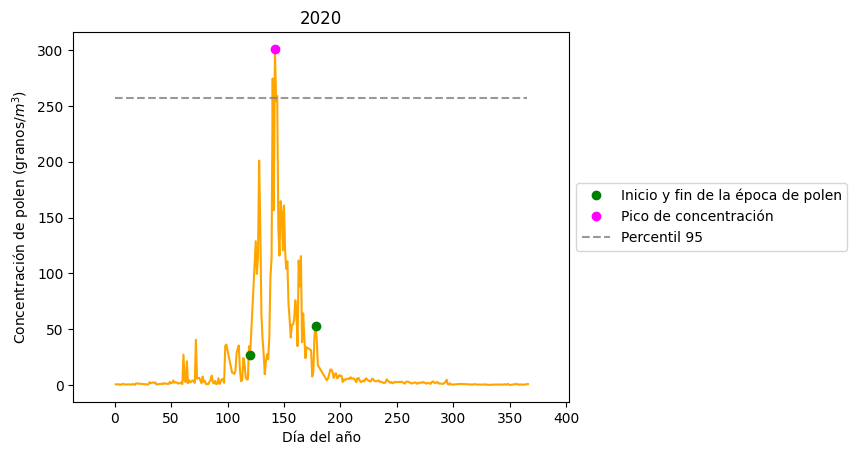

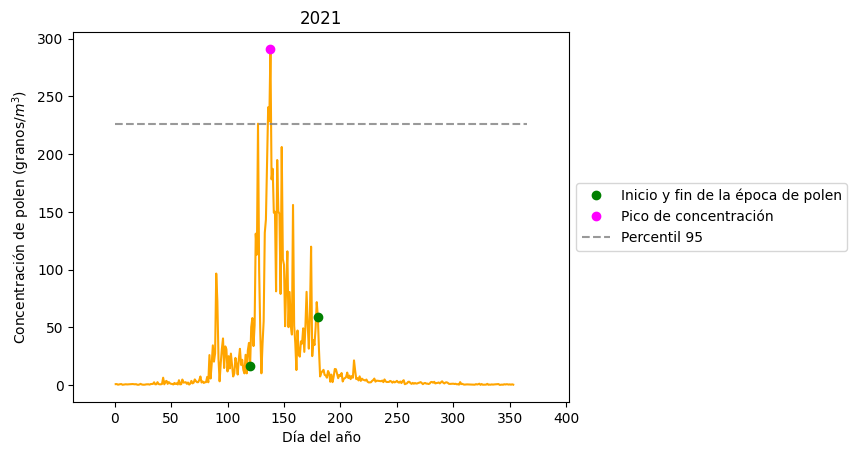

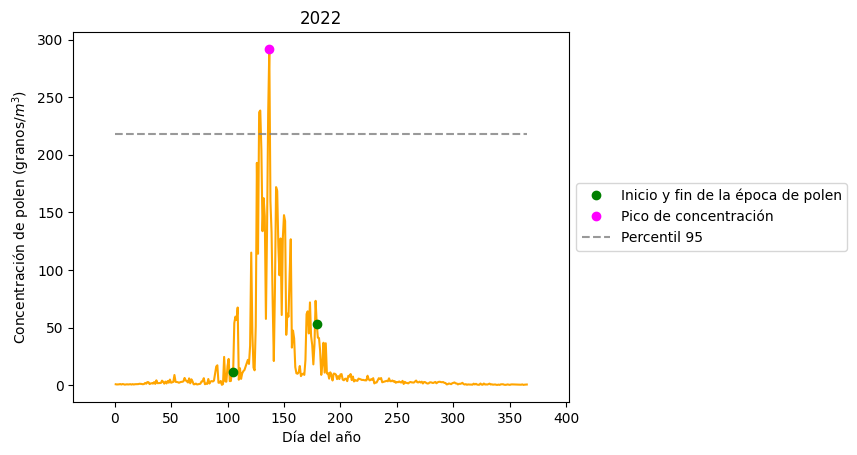

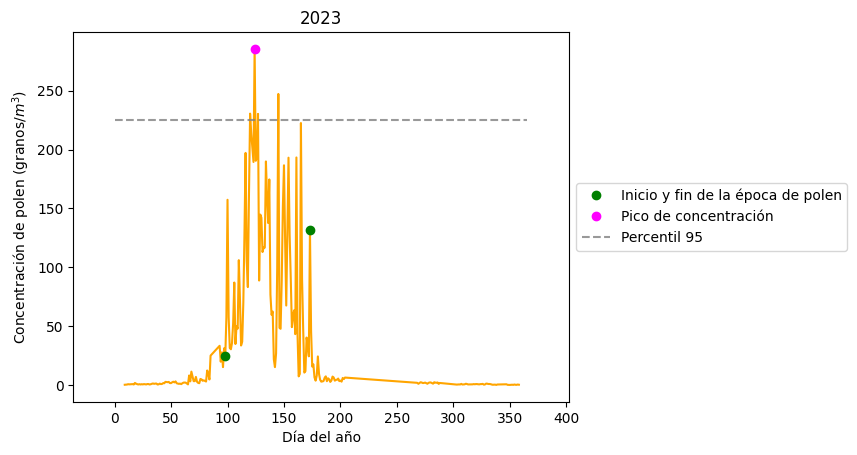

In [ ]:
# Declarar vectores - ajustados para el periodo 2017-2023 (7 años en lugar de 23)
anos = np.arange(1, 8, 1)  # 7 años (2017-2023)
concentracionpred = np.nan * np.zeros(7)
diaem = np.nan * np.zeros(7)
picopred = np.nan * np.zeros(7)

# Tomar máximo del año
ano = 1
n = 0

while ano <= 7:
    anofull = 2016 + ano  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size

    concentracionpred[ano-1] = np.max(pred[n:n+diasano])
    picopos = int(np.argmax(pred[n:n+diasano]))
    picopred[ano-1] = anoactual['día_del_año'].iloc[picopos]

    n = n + diasano
    ano = ano + 1

# Tomar el día que empieza la época de polen
ano = 1
n = 0

while ano <= 7:
    anofull = 2016 + ano  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size

    d = 0
    while d <= diasano:
        if np.nanmean(pred[n+d:n+d+30]) > concentracionpred[ano-1]*0.1 and pred[n+d] > 50:
            diaem[ano-1] = test_data['día_del_año'].iloc[n+d-1]
            break
        d = d + 1

    n = n + diasano
    ano = ano + 1

# Tomar el día que termina la época de polen
ano = 1
n = 0
diafin = np.nan * np.zeros(7)

while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year ==anofull]
  diasano = anoactual['fecha'].size

  d = 60
  while d<=diasano:
    if np.nanmean(pred[n+d-60:n+d]) > concentracionpred[ano-1]*0.1 and pred[n+d] > 50:
      diafin[ano-1] = test_data['día_del_año'].iloc[n+d]
    d=d+1

  n = n + diasano
  ano = ano + 1

# Declarar variables
i = 1
j = 0

# Loop para representar cada año (2017-2023)
while i <= 7:
    # Tomar datos contando los bisiestos
    anofull = 2016 + i  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size
    concentracion = anoactual['Poaceae (concentraciones)']

    # Crear la figura y los ejes
    fig, ax = plt.subplots()
    #plt.plot(anoactual['día_del_año'], concentracion, linestyle='-', color='orange', label='Concentración de polen', alpha=0.5)

    # Represento el polen predicho
    plt.plot(anoactual['día_del_año'], pred[j:j+diasano], color='orange')

    # Representar el día de comienzo calculado
    indice = anoactual.index[anoactual['día_del_año'] == diaem[i-1]] - train_data['día_del_año'].size
    plt.plot(diaem[i-1], pred[indice], color='green', linestyle='', marker='o', label='Inicio y fin de la época de polen')

    # Representar el día de fin calculado
    indice = anoactual.index[anoactual['día_del_año'] == diafin[i-1]] - train_data['día_del_año'].size
    plt.plot(diafin[i-1], pred[indice], color='green', marker='o')

    # Representar el día de máximo calculado (solo si se ejecuta el resto del código antes)
    #indice = anoactual.index[anoactual['día_del_año'] == picopred[i-1]] - train_data['día_del_año'].size
    #plt.plot(picopred[i-1], pred[indice], color='magenta', linestyle='', marker='o', label='Pico de concentración')

    # Etiquetas y título
    ax.set_xlabel('Día del año')
    ax.set_ylabel(r'Concentración de polen (granos/$m^3$)')
    #ax.set_ylim(top=max(test_data['Poaceae (concentraciones)']) * 1.1)
    #ax.set_ylim(bottom=-max(test_data['Poaceae (concentraciones)']) * 0.1)
    ax.set_xlim(right=366*1.1)
    ax.set_xlim(left=-366*0.1)

    ax.hlines(y=percpred[i-1], linestyle='--', color='gray', alpha=0.8, xmin=0, xmax=365, label='Percentil 95')

    ano_str = str(anofull)
    ax.set_title(ano_str)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Guardar el gráfico
    plt.savefig("/content/drive/MyDrive/TFG/imagenes/" + "Final - debut_y_fin_" + ano_str + "Nearest Neighbors.png",  bbox_inches='tight')

    # Aumento el año
    if i == 4:  # 2020 es bisiesto
        n = n + 1

    j = j + diasano
    i = i + 1

Principio y final de las concentraciones reales

In [ ]:
## Se requiere ejecutar el código anterior
# Declarar vectores - ajustados para el periodo 2017-2023 (7 años en lugar de 23)
anos = np.arange(1, 8, 1)  # 7 años (2017-2023)
concentracionreal = np.nan * np.zeros(7)
diaemreal = np.nan * np.zeros(7)
picoreal = np.nan * np.zeros(7)

# Tomar máximo del año
ano = 1

while ano <= 7:
    anofull = 2016 + ano  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size

    concentracionreal[ano-1] = np.max(anoactual['Poaceae (concentraciones)'])
    picopos = int(np.argmax(anoactual['Poaceae (concentraciones)']))
    picoreal[ano-1] = anoactual['día_del_año'].iloc[picopos]

    ano = ano + 1

# Tomar el día que empieza la época de polen
ano = 1
n = 0

while ano <= 7:
    anofull = 2016 + ano  # Empieza en 2017 (2016+1)
    anoactual = test_data[test_data['fecha'].dt.year == anofull]
    diasano = anoactual['fecha'].size

    d = 0
    while d <= diasano:
        if np.nanmean(test_data['Poaceae (concentraciones)'].iloc[n+d:n+d+30]) > concentracionreal[ano-1]*0.1 and test_data['Poaceae (concentraciones)'].iloc[n+d] > 50:
            diaemreal[ano-1] = test_data['día_del_año'].iloc[n+d-1]
            break
        d = d + 1

    n = n + diasano
    ano = ano + 1

# Tomar el día que termina la época de polen
ano = 1
n = 0
diafinreal = np.nan * np.zeros(7)

while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year ==anofull]
  diasano = anoactual['fecha'].size

  d = 60
  while d<=diasano:
    if np.nanmean(test_data['Poaceae (concentraciones)'].iloc[n+d-60:n+d]) > concentracionreal[ano-1]*0.1 and test_data['Poaceae (concentraciones)'].iloc[n+d] > 50:
      diafinreal[ano-1] = test_data['día_del_año'].iloc[n+d]
    d=d+1

  n = n + diasano
  ano = ano + 1


Suma de concentraciones

Mean absolute score = 3661.32
r2 score = -0.47


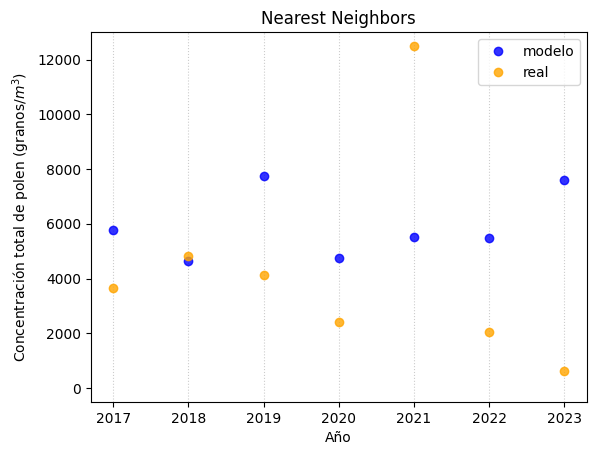

In [ ]:
## Se quiere comparar las concentraciones totales en las épocas de polen
ano = 1
concentotalreal = np.nan * np.zeros(7)
concentotalpred = np.nan * np.zeros(7)

# Calculo de la concentración cada año
while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year ==anofull]
  diasano = anoactual['día_del_año'].size

  diaemrealindx = int(diaemreal[ano-1])
  diafinrealindx = int(diafinreal[ano-1])
  concentotalreal[ano-1]=np.sum(anoactual['Poaceae (concentraciones)'].iloc[diaemrealindx:diafinrealindx])

  indiceprin = anoactual.index[anoactual['día_del_año'] == diaem[ano-1]] - train_data['día_del_año'].size
  indiceprin = int(indiceprin[0])
  indicefin = anoactual.index[anoactual['día_del_año'] == diafin[ano-1]] - train_data['día_del_año'].size
  indicefin = int(indicefin[0])
  concentotalpred[ano-1]=np.sum(pred[indiceprin:indicefin])

  ano = ano + 1

# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(concentotalreal, concentotalpred)
r2 = r2_score(concentotalreal, concentotalpred)

# Normalized Mean Bias y Normalized Mean Error
NMBSumaConcentracionesNearestNeighbors = np.sum(concentotalpred - concentotalreal)/np.sum(concentotalreal)*100
NMESumaConcentracionesNearestNeighbors = np.sum(np.abs(concentotalpred - concentotalreal))/np.sum(concentotalreal)*100

# Media de los resultados con la desviación típica
MediaSumaConcentraciones = np.mean(concentotalreal)
SDSumaConcentraciones = np.std(concentotalreal)

MediaSumaConcentracionesNearestNeighbors = np.mean(concentotalpred)
SDSumaConcentracionesNearestNeighbors = np.std(concentotalpred)

# Crear la figura y los ejes
plt.plot(anos+2016, concentotalpred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, concentotalreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Nearest Neighbors')
ax.set_xlabel('Año')
ax.set_ylabel(r'Concentración total de polen (granos/$m^3$)')
ax.set_ylim([-500, 13000])
ax.legend()

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Concentración total de cada año - Nearest Neighbors.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Pico de concentración

Mean absolute score = 220.84
r2 score = -0.10


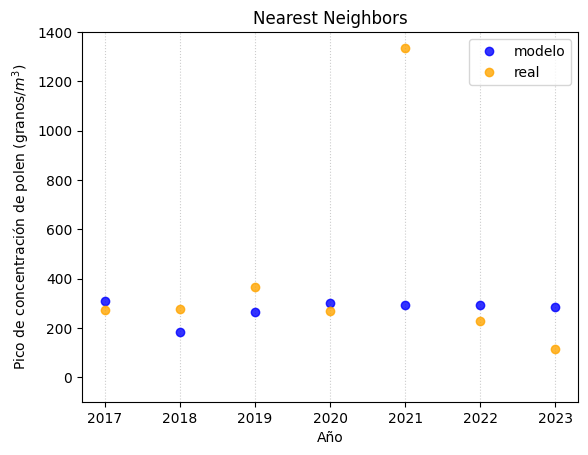

In [ ]:
# Ya se han calculado anteriormente
# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(concentracionreal, concentracionpred)
r2 = r2_score(concentracionreal, concentracionpred)

# Normalized Mean Bias y Normalized Mean Error
NMBPicoConcentracionNearestNeighbors = np.sum(concentracionpred - concentracionreal)/np.sum(concentracionreal)*100
NMEPicoConcentracionNearestNeighbors = np.sum(np.abs(concentracionpred - concentracionreal))/np.sum(concentracionreal)*100

# Media de los resultados con la desviación típica
MediaPicoConcentracion = np.mean(concentracionreal)
SDPicoConcentracion = np.std(concentracionreal)

MediaPicoConcentracionNearestNeighbors = np.mean(concentracionpred)
SDPicoConcentracionNearestNeighbors = np.std(concentracionpred)

# Crear la figura y los ejes
plt.plot(anos+2016, concentracionpred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, concentracionreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Nearest Neighbors')
ax.set_xlabel('Año')
ax.set_ylabel(r'Pico de concentración de polen (granos/$m^3$)')
ax.set_ylim([-100, 1400])
ax.legend()

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final -Pico de concentración de cada año - Nearest Neighbors.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Percentil 95

Mean absolute score = 151.21
r2 score = -0.03


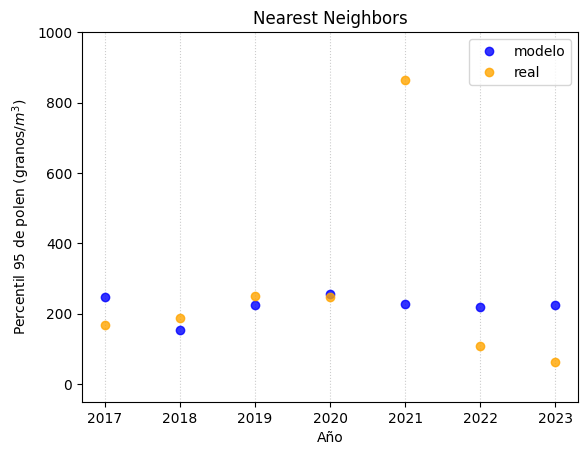

In [ ]:
## Se quiere comparar las concentraciones totales en las épocas de polen
ano = 1
percreal = np.nan * np.zeros(7)
percpred = np.nan * np.zeros(7)

# Calculo el percentil de cada año
while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year ==anofull]
  diasano = anoactual['día_del_año'].size

  diaemrealindx = int(diaemreal[ano-1])
  diafinrealindx = int(diafinreal[ano-1])
  percreal[ano-1]=np.percentile(anoactual['Poaceae (concentraciones)'].iloc[diaemrealindx:diafinrealindx], 95)

  indiceprin = anoactual.index[anoactual['día_del_año'] == diaem[ano-1]] - train_data['día_del_año'].size
  indiceprin = int(indiceprin[0])
  indicefin = anoactual.index[anoactual['día_del_año'] == diafin[ano-1]] - train_data['día_del_año'].size
  indicefin = int(indicefin[0])
  percpred[ano-1]=np.percentile(pred[indiceprin:indicefin], 95)

  ano = ano + 1

# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(percreal, percpred)
r2 = r2_score(percreal, percpred)

# Normalized Mean Bias y Normalized Mean Error
NMBPercentil95NearestNeighbors = np.sum(percpred - percreal)/np.sum(percreal)*100
NMEPercentil95NearestNeighbors = np.sum(np.abs(percpred - percreal))/np.sum(percreal)*100

# Media de los resultados con la desviación típica
MediaPercentil95 = np.mean(percreal)
SDPercentil95 = np.std(percreal)

MediaPercentil95NearestNeighbors = np.mean(percpred)
SDPercentil95NearestNeighbors = np.std(percpred)

# Crear la figura y los ejes
plt.plot(anos+2016, percpred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, percreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Nearest Neighbors')
ax.set_xlabel('Año')
ax.set_ylabel(r'Percentil 95 de polen (granos/$m^3$)')
ax.set_ylim([-50, 1000])
ax.legend()

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Percentil 95 de cada año - Nearest Neighbors.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

## Parámetros representativos: Temporales

Inicio (día)

Mean absolute score = 8.29
r2 score = -0.69


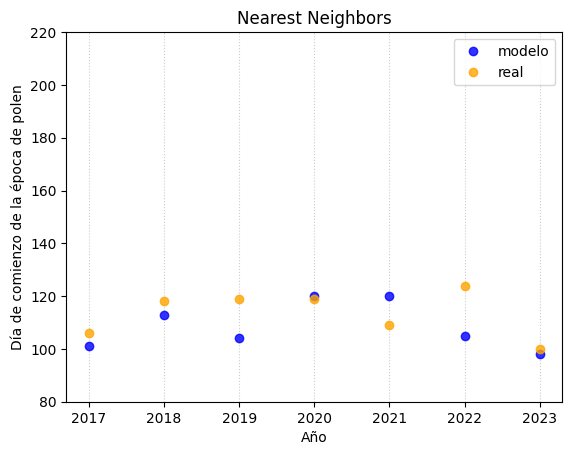

In [ ]:
# Ya tenemos los valores calculados
# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(diaemreal, diaem) # No estoy del todo contento de usar esto como el error
r2 = r2_score(diaemreal, diaem)

# Normalized Mean Bias y Normalized Mean Error
NMBInicioNearestNeighbors = np.sum(diaem - diaemreal)/np.sum(diaemreal)*100
NMEInicioNearestNeighbors = np.sum(np.abs(diaem - diaemreal))/np.sum(diaemreal)*100

# Media de los resultados con la desviación típica
MediaInicio = np.mean(diaemreal)
SDInicio = np.std(diaemreal)

MediaInicioNearestNeighbors = np.mean(diaem)
SDInicioNearestNeighbors = np.std(diaem)

# Crear la figura y los ejes
plt.plot(anos+2016, diaem, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, diaemreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Nearest Neighbors')
ax.set_xlabel('Año')
ax.set_ylabel('Día de comienzo de la época de polen')
ax.set_ylim([80, 220])
ax.legend(loc='upper right')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Día de comienzo de la época de polen - Nearest Neighbors.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Día del final

Mean absolute score = 23.71
r2 score = -3.45


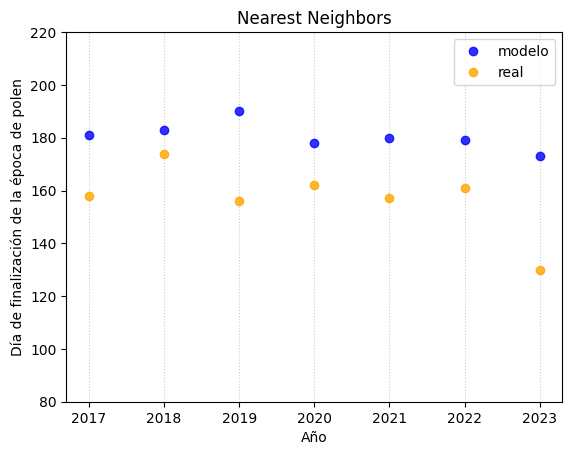

In [ ]:
# Ya tenemos los valores calculados
# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(diafinreal, diafin) # No estoy del todo contento de usar esto como el error
r2 = r2_score(diafinreal, diafin)

# Normalized Mean Bias y Normalized Mean Error
NMBFinalNearestNeighbors = np.sum(diafin - diafinreal)/np.sum(diafinreal)*100
NMEFinalNearestNeighbors = np.sum(np.abs(diafin - diafinreal))/np.sum(diafinreal)*100

# Media de los resultados con la desviación típica
MediaFinal = np.mean(diafinreal)
SDFinal = np.std(diafinreal)

MediaFinalNearestNeighbors = np.mean(diafin)
SDFinalNearestNeighbors = np.std(diafin)

# Crear la figura y los ejes
plt.plot(anos+2016, diafin, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, diafinreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Nearest Neighbors')
ax.set_xlabel('Año')
ax.set_ylabel('Día de finalización de la época de polen')
ax.set_ylim([80, 220])
ax.legend(loc='upper right')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Día de finalización de la época de polen - Nearest Neighbors.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Día de pico

Mean absolute score = 6.43
r2 score = 0.49


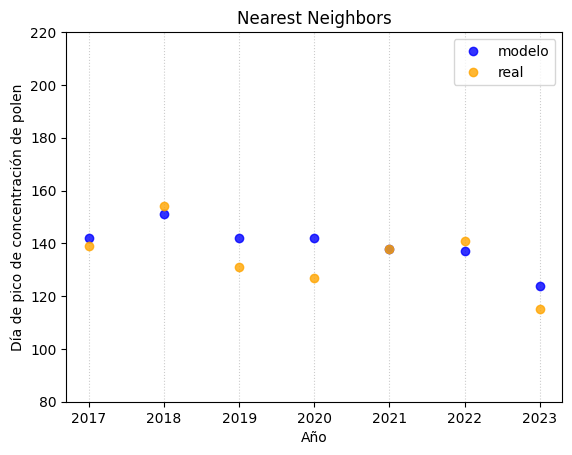

In [ ]:
# Ya se tienen los valores calculados
# Representación de los datos
fig, ax = plt.subplots()

# Calcular errores
mae = mean_absolute_error(picoreal, picopred) # No estoy del todo contento de usar esto como el error
r2 = r2_score(picoreal, picopred)

# Normalized Mean Bias y Normalized Mean Error
NMBPicoNearestNeighbors = np.sum(picopred - picoreal)/np.sum(picoreal)*100
NMEPicoNearestNeighbors = np.sum(np.abs(picopred - picoreal))/np.sum(picoreal)*100

# Media de los resultados con la desviación típica
MediaPico = np.mean(picoreal)
SDPico = np.std(picoreal)

MediaPicoNearestNeighbors = np.mean(picopred)
SDPicoNearestNeighbors = np.std(picopred)

# Crear la figura y los ejes
plt.plot(anos+2016, picopred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, picoreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Nearest Neighbors')
ax.set_xlabel('Año')
ax.set_ylabel('Día de pico de concentración de polen')
ax.set_ylim([80, 220])
ax.legend(loc='upper right')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Día de pico de concentración de polen - Nearest Neighbors.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

Pico con los días por encima del percentil 95

Mean absolute score = 6.43
r2 score = 0.49


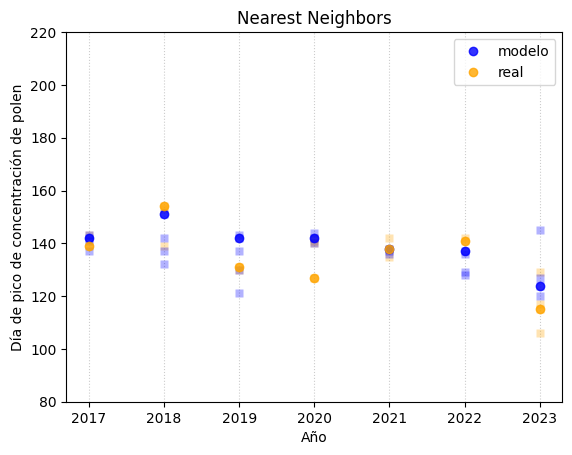

In [ ]:
# Ya se tienen los valores calculados
# Representación de los datos
fig, ax = plt.subplots()

# Determinar días que están por encima del percentil 95 real
# Primero declaro una matriz donde guardar los días por año (se ha asumido que no habrá más de 10 cada año)
dias95 = np.full((7,10), np.nan)
ano = 1

while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year == anofull]
  diasano = anoactual['día_del_año'].size

  i = 0
  d = 0
  while d < diasano:
    if anoactual['Poaceae (concentraciones)'].iloc[d] > percreal[ano-1]:
      dias95[ano-1,i] = anoactual['día_del_año'].iloc[d]
      i = i+1
    d = d+1
  ano = ano + 1

# Igual pero con las predicciónes
dias95pred = np.full((7,10), np.nan)
ano = 1
d = 0
diasanoacum = 0

while ano <= 7:
  anofull = 2016 + ano
  anoactual = test_data[test_data['fecha'].dt.year == anofull]
  diasano = anoactual['día_del_año'].size

  i = 0
  diasanoacum = diasanoacum + diasano
  while d < diasanoacum:
    if pred[d] > percpred[ano-1]:
      dias95pred[ano-1,i] = anoactual['día_del_año'].iloc[d+diasano-diasanoacum]
      i = i+1
    d = d+1
  ano = ano + 1

# Calcular errores
mae = mean_absolute_error(picoreal, picopred) # No estoy del todo contento de usar esto como el error
r2 = r2_score(picoreal, picopred)

# Normalized Mean Bias y Normalized Mean Error
NMBPicoNearestNeighbors = np.sum(picopred - picoreal)/np.sum(picoreal)*100
NMEPicoNearestNeighbors = np.sum(np.abs(picopred - picoreal))/np.sum(picoreal)*100

# Media de los resultados con la desviación típica
MediaPico = np.mean(picoreal)
SDPico = np.std(picoreal)

MediaPicoNearestNeighbors = np.mean(picopred)
SDPicoNearestNeighbors = np.std(picopred)

# Crear la figura y los ejes
# Valores de los días por encima de del percentil 95
ano = 1

while ano <= 7:
  anorep = np.full(10, ano+2016)
  plt.plot(anorep, dias95[ano-1,:], linestyle='', marker='s', color='orange', markeredgecolor='none', alpha=0.3)
  plt.plot(anorep, dias95pred[ano-1,:], linestyle='', marker='s', color='blue', markeredgecolor='none', alpha=0.3)
  ano = ano + 1

plt.plot(anos+2016, picopred, linestyle='',marker='o', color='blue', label='modelo', alpha=0.8)
plt.plot(anos+2016, picoreal, linestyle='',marker='o', color='orange', label='real', alpha=0.8)

# Líneas para visualizar mejor la distancia entre predicción y real
plt.grid(axis='x', which='minor', linestyle=':', color='gray', alpha=0.4)
plt.grid(axis='x', which='major', linestyle=':', color='gray', alpha=0.4)
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Etiquetas y título
ax.set_title('Nearest Neighbors')
ax.set_xlabel('Año')
ax.set_ylabel('Día de pico de concentración de polen')
ax.set_ylim([80, 220])
ax.legend(loc='upper right')

# Guardar el gráfico
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Día de pico y 95 de concentración de polen - Nearest Neighbors.png")
print(f"Mean absolute score = {mae:.2f}")
print(f"r2 score = {r2:.2f}")

# Comparación de modelos

IMPORTANTE: Hay que ejecutar las celdas de las predicciónes para poder ejecutar éstas debido a que los valores se calculan ahí.

Primero, se va a comparar las medias de las predicciones con los valores reales.

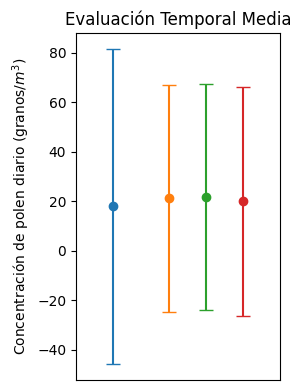

In [ ]:
# Evaluación Temporal Completa
fig, ax = plt.subplots(figsize=(3,4))
plt.errorbar(0.5, MediaEvTemporal, yerr=SDEvTemporal, linestyle='', marker='o', capsize=5, label='Real')
plt.errorbar(2, MediaEvTemporalNearestNeighbors, yerr=SDEvTemporalNearestNeighbors, linestyle='', marker='o', capsize=5, label='Nearest Neighbors')
plt.errorbar(3, MediaEvTemporalRandomForest, yerr=SDEvTemporalRandomForest, linestyle='', marker='o', capsize=5, label='Random Forest')
plt.errorbar(4, MediaEvTemporalRedNeuronal, yerr=SDEvTemporalRedNeuronal, linestyle='', marker='o', capsize=5, label='Red Neuronal')

ax.set_title('Evaluación Temporal Media')
ax.set_ylabel(r'Concentración de polen diario (granos/$m^3$)')
ax.set_xlim([-0.5,5])

x_positions = [0.5, 2, 3, 4]
plt.xticks([])
#x_labels = ['Real', 'Nearest Neighbors', 'Random Forest', 'Red Neuronal']
#ax.set_xticks(x_positions)
#ax.set_xticklabels(x_labels, rotation=45, ha='right')

#ax.axvline(x=0.5, color='gray', linestyle='--', alpha=0.3)
#ax.axvline(x=2, color='gray', linestyle='--', alpha=0.3)
#ax.axvline(x=3, color='gray', linestyle='--', alpha=0.3)
#ax.axvline(x=4, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()

plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Comparación Evaluación Temporal.png", bbox_inches='tight')

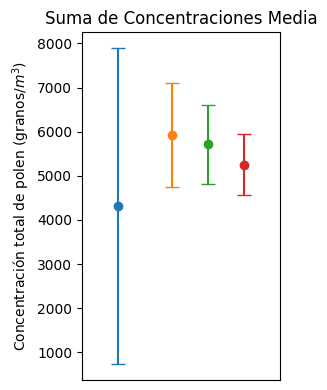

In [ ]:
# Suma de Concentraciones
fig, ax = plt.subplots(figsize=(3,4))
plt.errorbar(0.5, MediaSumaConcentraciones, yerr=SDSumaConcentraciones, linestyle='', marker='o', capsize=5, label='Real')
plt.errorbar(2, MediaSumaConcentracionesNearestNeighbors, yerr=SDSumaConcentracionesNearestNeighbors, linestyle='', marker='o', capsize=5, label='Nearest Neighbors')
plt.errorbar(3, MediaSumaConcentracionesRandomForest, yerr=SDSumaConcentracionesRandomForest, linestyle='', marker='o', capsize=5, label='Random Forest')
plt.errorbar(4, MediaSumaConcentracionesRedNeuronal, yerr=SDSumaConcentracionesRedNeuronal, linestyle='', marker='o', capsize=5, label='Red Neuronal')

ax.set_title('Suma de Concentraciones Media')
ax.set_ylabel(r'Concentración total de polen (granos/$m^3$)')
ax.set_xlim([-0.5,5])

x_positions = [0.5, 2, 3, 4]
plt.xticks([])
#x_labels = ['Real', 'Nearest Neighbors', 'Random Forest', 'Red Neuronal']
#ax.set_xticks(x_positions)
#ax.set_xticklabels(x_labels, rotation=45, ha='right')

#ax.axvline(x=0.5, color='gray', linestyle='--', alpha=0.3)
#ax.axvline(x=2, color='gray', linestyle='--', alpha=0.3)
#ax.axvline(x=3, color='gray', linestyle='--', alpha=0.3)
#ax.axvline(x=4, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()

plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Comparación Suma de Concentraciones.png", bbox_inches='tight')

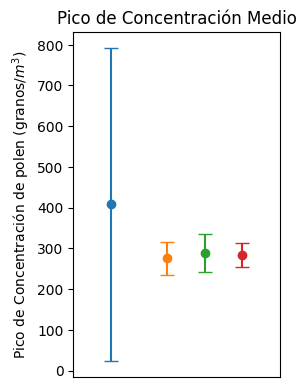

In [ ]:
# Picos de concentración
fig, ax = plt.subplots(figsize=(3,4))
plt.errorbar(0.5, MediaPicoConcentracion, yerr=SDPicoConcentracion, linestyle='', marker='o', capsize=5, label='Real')
plt.errorbar(2, MediaPicoConcentracionNearestNeighbors, yerr=SDPicoConcentracionNearestNeighbors, linestyle='', marker='o', capsize=5, label='Nearest Neighbors')
plt.errorbar(3, MediaPicoConcentracionRandomForest, yerr=SDPicoConcentracionRandomForest, linestyle='', marker='o', capsize=5, label='Random Forest')
plt.errorbar(4, MediaPicoConcentracionRedNeuronal, yerr=SDPicoConcentracionRedNeuronal, linestyle='', marker='o', capsize=5, label='Red Neuronal')

ax.set_title('Pico de Concentración Medio')
ax.set_ylabel(r'Pico de Concentración de polen (granos/$m^3$)')
ax.set_xlim([-0.5,5])

x_positions = [0.5, 2, 3, 4]
plt.xticks([])
#x_labels = ['Real', 'Nearest Neighbors', 'Random Forest', 'Red Neuronal']
#ax.set_xticks(x_positions)
#ax.set_xticklabels(x_labels, rotation=45, ha='right')

#ax.axvline(x=0.5, color='gray', linestyle='--', alpha=0.3)
#ax.axvline(x=2, color='gray', linestyle='--', alpha=0.3)
#ax.axvline(x=3, color='gray', linestyle='--', alpha=0.3)
#ax.axvline(x=4, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()

plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Comparación Pico de Concentraciones.png", bbox_inches='tight')

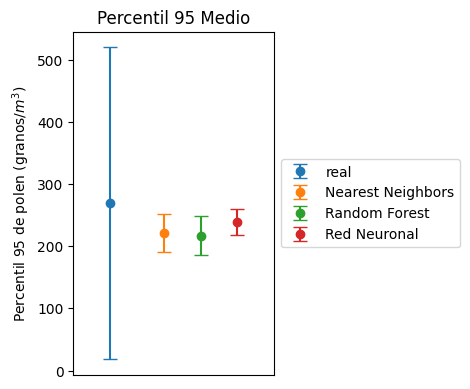

In [ ]:
# Percentil 95 de concentración
fig, ax = plt.subplots(figsize=(4.8,4))
plt.errorbar(0.5, MediaPercentil95, yerr=SDPercentil95, linestyle='', marker='o', capsize=5, label='real')
plt.errorbar(2, MediaPercentil95NearestNeighbors, yerr=SDPercentil95NearestNeighbors, linestyle='', marker='o', capsize=5, label='Nearest Neighbors')
plt.errorbar(3, MediaPercentil95RandomForest, yerr=SDPercentil95RandomForest, linestyle='', marker='o', capsize=5, label='Random Forest')
plt.errorbar(4, MediaPercentil95RedNeuronal, yerr=SDPercentil95RedNeuronal, linestyle='', marker='o', capsize=5, label='Red Neuronal')

ax.set_title('Percentil 95 Medio')
ax.set_ylabel(r'Percentil 95 de polen (granos/$m^3$)')
ax.set_xlim([-0.5,5])

x_positions = [0.5, 2, 3, 4]
plt.xticks([])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#x_labels = ['Real', 'Nearest Neighbors', 'Random Forest', 'Red Neuronal']
#ax.set_xticks(x_positions)
#ax.set_xticklabels(x_labels, rotation=45, ha='right')

#ax.axvline(x=0.5, color='gray', linestyle='--', alpha=0.3)
#ax.axvline(x=2, color='gray', linestyle='--', alpha=0.3)
#ax.axvline(x=3, color='gray', linestyle='--', alpha=0.3)
#ax.axvline(x=4, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()

plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Comparación Percentil 95 de Concentraciones.png")

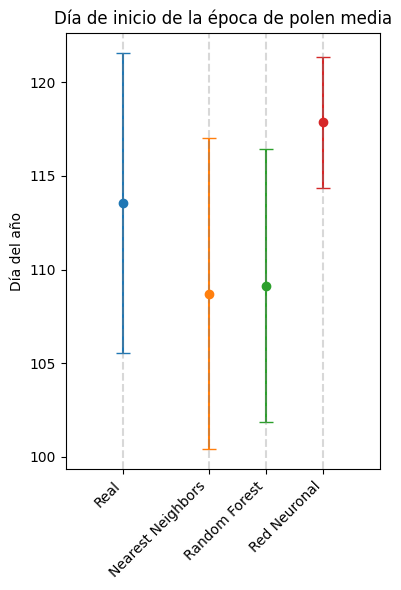

In [ ]:
# Día de inicio
fig, ax = plt.subplots(figsize=(4,6))
plt.errorbar(0.5, MediaInicio, yerr=SDInicio, linestyle='', marker='o', capsize=5, label='Real')
plt.errorbar(2, MediaInicioNearestNeighbors, yerr=SDInicioNearestNeighbors, linestyle='', marker='o', capsize=5, label='Nearest Neighbors')
plt.errorbar(3, MediaInicioRandomForest, yerr=SDInicioRandomForest, linestyle='', marker='o', capsize=5, label='Random Forest')
plt.errorbar(4, MediaInicioRedNeuronal, yerr=SDInicioRedNeuronal, linestyle='', marker='o', capsize=5, label='Red Neuronal')

ax.set_title('Día de inicio de la época de polen media')
ax.set_ylabel('Día del año')
ax.set_xlim([-0.5, 5])

x_positions = [0.5, 2, 3, 4]
x_labels = ['Real', 'Nearest Neighbors', 'Random Forest', 'Red Neuronal']
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, rotation=45, ha='right')

ax.axvline(x=0.5, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=2, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=3, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=4, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()

plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Comparación Inicio de la época de polen.png")

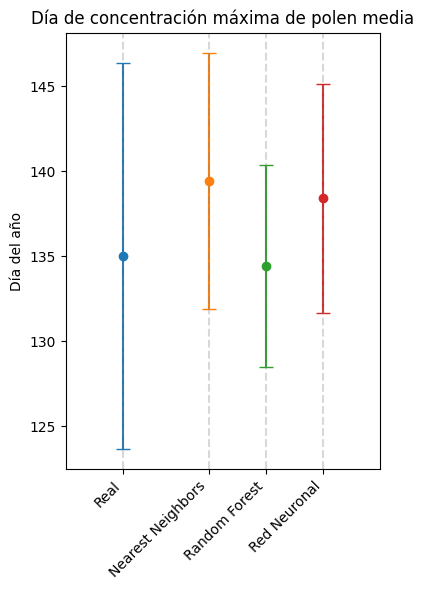

In [ ]:
# Día de pico
fig, ax = plt.subplots(figsize=(4,6))
plt.errorbar(0.5, MediaPico, yerr=SDPico, linestyle='', marker='o', capsize=5, label='Real')
plt.errorbar(2, MediaPicoNearestNeighbors, yerr=SDPicoNearestNeighbors, linestyle='', marker='o', capsize=5, label='Nearest Neighbors')
plt.errorbar(3, MediaPicoRandomForest, yerr=SDPicoRandomForest, linestyle='', marker='o', capsize=5, label='Random Forest')
plt.errorbar(4, MediaPicoRedNeuronal, yerr=SDPicoRedNeuronal, linestyle='', marker='o', capsize=5, label='Red Neuronal')

ax.set_title('Día de concentración máxima de polen media')
ax.set_ylabel('Día del año')
ax.set_xlim([-0.5,5])

x_positions = [0.5, 2, 3, 4]
x_labels = ['Real', 'Nearest Neighbors', 'Random Forest', 'Red Neuronal']
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, rotation=45, ha='right')

ax.axvline(x=0.5, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=2, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=3, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=4, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()

plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Comparación Día de Pico de polen.png", bbox_inches='tight')

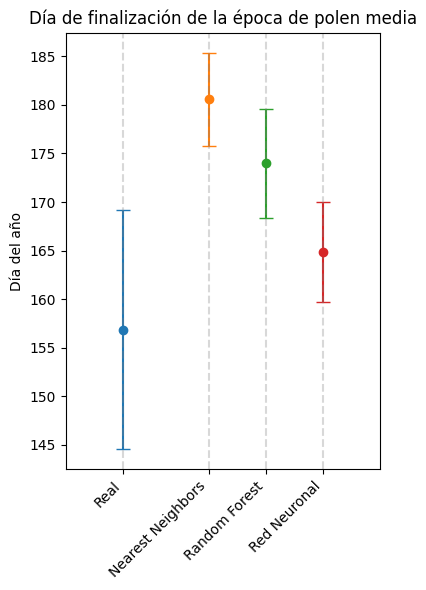

In [ ]:
# Fin de la época de polen
fig, ax = plt.subplots(figsize=[4,6])
plt.errorbar(0.5, MediaFinal, yerr=SDFinal, linestyle='', marker='o', capsize=5, label='Real')
plt.errorbar(2, MediaFinalNearestNeighbors, yerr=SDFinalNearestNeighbors, linestyle='', marker='o', capsize=5, label='Nearest Neighbors')
plt.errorbar(3, MediaFinalRandomForest, yerr=SDFinalRandomForest, linestyle='', marker='o', capsize=5, label='Random Forest')
plt.errorbar(4, MediaFinalRedNeuronal, yerr=SDFinalRedNeuronal, linestyle='', marker='o', capsize=5, label='Red Neuronal')

ax.set_title('Día de finalización de la época de polen media')
ax.set_ylabel('Día del año')
ax.set_xlim([-0.5,5])

x_positions = [0.5, 2, 3, 4]
x_labels = ['Real', 'Nearest Neighbors', 'Random Forest', 'Red Neuronal']
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, rotation=45, ha='right')

ax.axvline(x=0.5, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=2, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=3, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=4, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()

plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Comparación Fin de la época de polen.png", bbox_inches='tight')

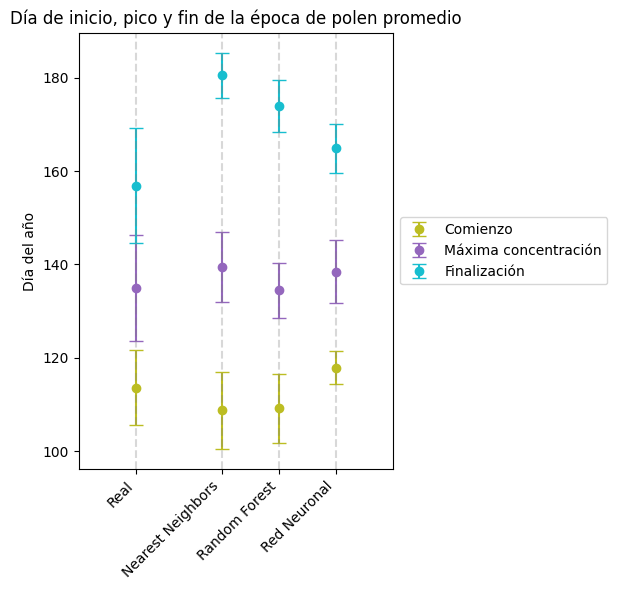

In [ ]:
# Principio, Pico y Fin de la época de polen
fig, ax = plt.subplots(figsize=(4,6))

plt.errorbar(0.5, MediaInicio, yerr=SDInicio, linestyle='', marker='o', color='tab:olive', capsize=5, label='Comienzo')
plt.errorbar(2, MediaInicioNearestNeighbors, yerr=SDInicioNearestNeighbors, linestyle='', marker='o', color='tab:olive', capsize=5)
plt.errorbar(3, MediaInicioRandomForest, yerr=SDInicioRandomForest, linestyle='', marker='o', color='tab:olive', capsize=5)
plt.errorbar(4, MediaInicioRedNeuronal, yerr=SDInicioRedNeuronal, linestyle='', marker='o', color='tab:olive', capsize=5)

plt.errorbar(0.5, MediaPico, yerr=SDPico, linestyle='', marker='o', color='tab:purple', capsize=5)
plt.errorbar(2, MediaPicoNearestNeighbors, yerr=SDPicoNearestNeighbors, linestyle='', marker='o', color='tab:purple', capsize=5, label='Máxima concentración')
plt.errorbar(3, MediaPicoRandomForest, yerr=SDPicoRandomForest, linestyle='', marker='o', color='tab:purple', capsize=5)
plt.errorbar(4, MediaPicoRedNeuronal, yerr=SDPicoRedNeuronal, linestyle='', marker='o', color='tab:purple', capsize=5)

plt.errorbar(0.5, MediaFinal, yerr=SDFinal, linestyle='', marker='o', color='tab:cyan', capsize=5)
plt.errorbar(2, MediaFinalNearestNeighbors, yerr=SDFinalNearestNeighbors, linestyle='', marker='o', color='tab:cyan', capsize=5, label='Finalización')
plt.errorbar(3, MediaFinalRandomForest, yerr=SDFinalRandomForest, linestyle='', marker='o', color='tab:cyan', capsize=5)
plt.errorbar(4, MediaFinalRedNeuronal, yerr=SDFinalRedNeuronal, linestyle='', marker='o', color='tab:cyan', capsize=5)

ax.set_title('Día de inicio, pico y fin de la época de polen promedio')
ax.set_ylabel('Día del año')
ax.set_xlim([-0.5,5])

x_positions = [0.5, 2, 3, 4]
x_labels = ['Real', 'Nearest Neighbors', 'Random Forest', 'Red Neuronal']
ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, rotation=45, ha='right')

ax.axvline(x=0.5, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=2, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=3, color='gray', linestyle='--', alpha=0.3)
ax.axvline(x=4, color='gray', linestyle='--', alpha=0.3)

plt.tight_layout()

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Save figure with bbox_inches='tight' to include the legend
plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Comparación Principio, Pico y Fin de la época de polen.png",
            bbox_inches='tight',  # This ensures the legend is included
            dpi=300)             # Higher resolution for better quality

# Estimación del mejor modelo

Se va a realizar una gráfica con los errores 'Normalized Mean Bias' y 'Normalized Mean Error'.

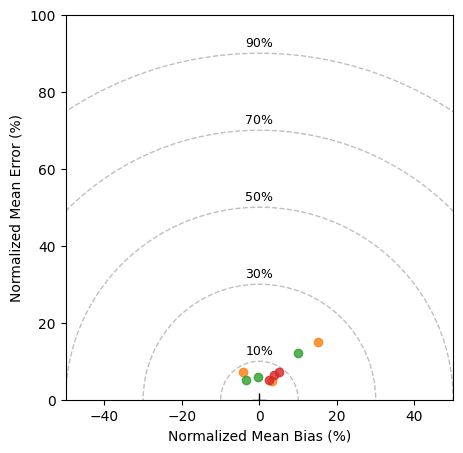

In [ ]:
from matplotlib.patches import Circle

fig, ax = plt.subplots(figsize=[5,5])

# Nearest Neighbors
#plt.plot(NMBEvTemporalNearestNeighbors, NMEEvTemporalNearestNeighbors, linestyle='', marker='o', color='tab:orange', label='Nearest Neighbors', alpha=0.8)
plt.plot(NMBFinalNearestNeighbors, NMEFinalNearestNeighbors, linestyle='', marker='o', color='tab:orange', label='Nearest Neighbors', alpha=0.8)
plt.plot(NMBInicioNearestNeighbors, NMEInicioNearestNeighbors, linestyle='', marker='o', color='tab:orange', alpha=0.8)
#plt.plot(NMBPercentil95NearestNeighbors, NMEPercentil95NearestNeighbors, linestyle='', marker='o', color='tab:orange', alpha=0.8)
#plt.plot(NMBPicoConcentracionNearestNeighbors, NMEPicoConcentracionNearestNeighbors, linestyle='', marker='o', color='tab:orange', alpha=0.8)
plt.plot(NMBPicoNearestNeighbors, NMEPicoNearestNeighbors, linestyle='', marker='o', color='tab:orange', alpha=0.8)
#plt.plot(NMBSumaConcentracionesNearestNeighbors, NMESumaConcentracionesNearestNeighbors, linestyle='', marker='o', color='tab:orange', alpha=0.8)

# Random Forest
#plt.plot(NMBEvTemporalRandomForest, NMEEvTemporalRandomForest, linestyle='', marker='o', color='tab:green', label='Random Forest', alpha=0.8)
plt.plot(NMBFinalRandomForest, NMEFinalRandomForest, linestyle='', marker='o', color='tab:green', label='Random Forest', alpha=0.8)
plt.plot(NMBInicioRandomForest, NMEInicioRandomForest, linestyle='', marker='o', color='tab:green', alpha=0.8)
#plt.plot(NMBPercentil95RandomForest, NMEPercentil95RandomForest, linestyle='', marker='o', color='tab:green', alpha=0.8)
#plt.plot(NMBPicoConcentracionRandomForest, NMEPicoConcentracionRandomForest, linestyle='', marker='o', color='tab:green', alpha=0.8)
plt.plot(NMBPicoRandomForest, NMEPicoRandomForest, linestyle='', marker='o', color='tab:green', alpha=0.8)
#plt.plot(NMBSumaConcentracionesRandomForest, NMESumaConcentracionesRandomForest, linestyle='', marker='o', color='tab:green', alpha=0.8)

# Red Neuronal
#plt.plot(NMBEvTemporalRedNeuronal, NMEEvTemporalRedNeuronal, linestyle='', marker='o', color='tab:red', label='Red Neuronal', alpha=0.8)
plt.plot(NMBFinalRedNeuronal, NMEFinalRedNeuronal, linestyle='', marker='o', color='tab:red', label='Red Neuronal', alpha=0.8)
plt.plot(NMBInicioRedNeuronal, NMEInicioRedNeuronal, linestyle='', marker='o', color='tab:red', alpha=0.8)
#plt.plot(NMBPercentil95RedNeuronal, NMEPercentil95RedNeuronal, linestyle='', marker='o', color='tab:red', alpha=0.8)
#plt.plot(NMBPicoConcentracionRedNeuronal, NMEPicoConcentracionRedNeuronal, linestyle='', marker='o', color='tab:red', alpha=0.8)
plt.plot(NMBPicoRedNeuronal, NMEPicoRedNeuronal, linestyle='', marker='o', color='tab:red', alpha=0.8)
#plt.plot(NMBSumaConcentracionesRedNeuronal, NMESumaConcentracionesRedNeuronal, linestyle='', marker='o', color='tab:red', alpha=0.8)

# Circulos centrados en 0,0
radii = np.arange(10, 110, 20)
percent = ["10%", "30%", "50%", "70%", "90%"]
for radius,percent in zip(radii, percent):
    circle = Circle((0, 0), radius, fill=False, edgecolor='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax.add_patch(circle)

    ax.text(0, radius+1, percent, ha='center', va='bottom', fontsize=9,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

plt.plot(0, 0, 'k+', markersize=10)

# Otros ajustes
ax.set_xlim([-50,50])
ax.set_ylim([0,100])
#ax.legend(loc='lower left')
ax.set_xlabel('Normalized Mean Bias (%)')
ax.set_ylabel('Normalized Mean Error (%)')

plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Estimación del mejor modelo temporales.png")

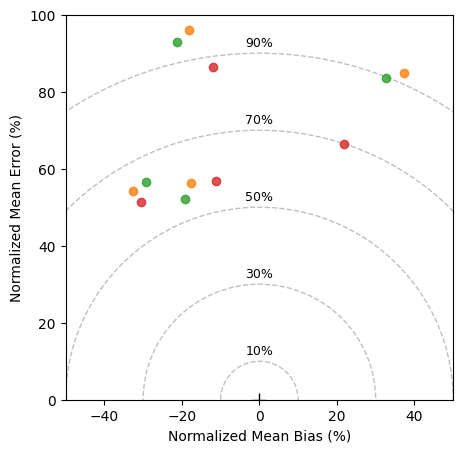

In [ ]:
from matplotlib.patches import Circle

fig, ax = plt.subplots(figsize=[5,5])

# Nearest Neighbors
plt.plot(NMBEvTemporalNearestNeighbors, NMEEvTemporalNearestNeighbors, linestyle='', marker='o', color='tab:orange', label='Nearest Neighbors', alpha=0.8)
#plt.plot(NMBFinalNearestNeighbors, NMEFinalNearestNeighbors, linestyle='', marker='o', color='tab:orange', alpha=0.8)
#plt.plot(NMBInicioNearestNeighbors, NMEInicioNearestNeighbors, linestyle='', marker='o', color='tab:orange', alpha=0.8)
plt.plot(NMBPercentil95NearestNeighbors, NMEPercentil95NearestNeighbors, linestyle='', marker='o', color='tab:orange', alpha=0.8)
plt.plot(NMBPicoConcentracionNearestNeighbors, NMEPicoConcentracionNearestNeighbors, linestyle='', marker='o', color='tab:orange', alpha=0.8)
#plt.plot(NMBPicoNearestNeighbors, NMEPicoNearestNeighbors, linestyle='', marker='o', color='tab:orange', alpha=0.8)
plt.plot(NMBSumaConcentracionesNearestNeighbors, NMESumaConcentracionesNearestNeighbors, linestyle='', marker='o', color='tab:orange', alpha=0.8)

# Random Forest
plt.plot(NMBEvTemporalRandomForest, NMEEvTemporalRandomForest, linestyle='', marker='o', color='tab:green', label='Random Forest', alpha=0.8)
#plt.plot(NMBFinalRandomForest, NMEFinalRandomForest, linestyle='', marker='o', color='tab:green', alpha=0.8)
#plt.plot(NMBInicioRandomForest, NMEInicioRandomForest, linestyle='', marker='o', color='tab:green', alpha=0.8)
plt.plot(NMBPercentil95RandomForest, NMEPercentil95RandomForest, linestyle='', marker='o', color='tab:green', alpha=0.8)
plt.plot(NMBPicoConcentracionRandomForest, NMEPicoConcentracionRandomForest, linestyle='', marker='o', color='tab:green', alpha=0.8)
#plt.plot(NMBPicoRandomForest, NMEPicoRandomForest, linestyle='', marker='o', color='tab:green', alpha=0.8)
plt.plot(NMBSumaConcentracionesRandomForest, NMESumaConcentracionesRandomForest, linestyle='', marker='o', color='tab:green', alpha=0.8)

# Red Neuronal
plt.plot(NMBEvTemporalRedNeuronal, NMEEvTemporalRedNeuronal, linestyle='', marker='o', color='tab:red', label='Red Neuronal', alpha=0.8)
#plt.plot(NMBFinalRedNeuronal, NMEFinalRedNeuronal, linestyle='', marker='o', color='tab:red', alpha=0.8)
#plt.plot(NMBInicioRedNeuronal, NMEInicioRedNeuronal, linestyle='', marker='o', color='tab:red', alpha=0.8)
plt.plot(NMBPercentil95RedNeuronal, NMEPercentil95RedNeuronal, linestyle='', marker='o', color='tab:red', alpha=0.8)
plt.plot(NMBPicoConcentracionRedNeuronal, NMEPicoConcentracionRedNeuronal, linestyle='', marker='o', color='tab:red', alpha=0.8)
#plt.plot(NMBPicoRedNeuronal, NMEPicoRedNeuronal, linestyle='', marker='o', color='tab:red', alpha=0.8)
plt.plot(NMBSumaConcentracionesRedNeuronal, NMESumaConcentracionesRedNeuronal, linestyle='', marker='o', color='tab:red', alpha=0.8)

# Circulos centrados en 0,0
radii = np.arange(10, 110, 20)
percent = ["10%", "30%", "50%", "70%", "90%"]
for radius,percent in zip(radii, percent):
    circle = Circle((0, 0), radius, fill=False, edgecolor='gray', linestyle='--', linewidth=1, alpha=0.5)
    ax.add_patch(circle)

    ax.text(0, radius+1, percent, ha='center', va='bottom', fontsize=9,
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

plt.plot(0, 0, 'k+', markersize=10)

# Otros ajustes
ax.set_xlim([-50,50])
ax.set_ylim([0,100])
#ax.legend(loc='lower left')
ax.set_xlabel('Normalized Mean Bias (%)')
ax.set_ylabel('Normalized Mean Error (%)')

plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Estimación del mejor modelo Concentraciones.png")

Error promedio de cada modelo

In [ ]:
ErrNearestNeighbors = np.average([NMBEvTemporalNearestNeighbors,NMBFinalNearestNeighbors,NMBInicioNearestNeighbors,NMBPercentil95NearestNeighbors,
                                  NMBPicoConcentracionNearestNeighbors,NMBPicoNearestNeighbors,NMBSumaConcentracionesNearestNeighbors,
                                  NMEEvTemporalNearestNeighbors,NMEFinalNearestNeighbors,NMEInicioNearestNeighbors,NMEPercentil95NearestNeighbors,
                                  NMEPicoConcentracionNearestNeighbors,NMEPicoNearestNeighbors,NMESumaConcentracionesNearestNeighbors])

ErrRandomForest = np.average([NMBEvTemporalRandomForest,NMBFinalRandomForest,NMBInicioRandomForest,NMBPercentil95RandomForest,
                              NMBPicoConcentracionRandomForest,NMBPicoRandomForest,NMBSumaConcentracionesRandomForest,
                              NMEEvTemporalRandomForest,NMEFinalRandomForest,NMEInicioRandomForest,NMEPercentil95RandomForest,
                              NMEPicoConcentracionRandomForest,NMEPicoRandomForest,NMESumaConcentracionesRandomForest])

ErrRedNeuronal = np.average([NMBEvTemporalRedNeuronal,NMBFinalRedNeuronal,NMBInicioRedNeuronal,NMBPercentil95RedNeuronal,
                             NMBPicoConcentracionRedNeuronal,NMBPicoRedNeuronal,NMBSumaConcentracionesRedNeuronal,
                             NMEEvTemporalRedNeuronal,NMEFinalRedNeuronal,NMEInicioRedNeuronal,NMEPercentil95RedNeuronal,
                             NMEPicoConcentracionRedNeuronal,NMEPicoRedNeuronal,NMESumaConcentracionesRedNeuronal])

print(f'Error promedio del modelo Nearest Neighbors: {ErrNearestNeighbors:.2f}')
print(f'Error promedio del modelo Random Forest: {ErrRandomForest:.2f}')
print(f'Error promedio del modelo Red Neuronal: {ErrRedNeuronal:.2f}')

Error promedio del modelo Nearest Neighbors: 21.55
Error promedio del modelo Random Forest: 19.86
Error promedio del modelo Red Neuronal: 18.57


# Cosas para la redacción

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

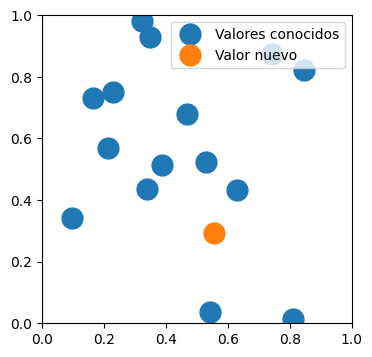

In [ ]:
fig, ax = plt.subplots(figsize=[4,4])

X1 = np.random.rand(15)
X2 = np.random.rand(15)
y1 = np.random.rand(1)
y2 = np.random.rand(1)

plt.plot(X1, X2, linestyle='', marker='o', markersize=15, label='Valores conocidos')
plt.plot(y1, y2, linestyle='', marker='o', markersize=15, label='Valor nuevo')

ax.set_ylim([0,1])
ax.set_xlim([0,1])
ax.legend()

plt.savefig("/content/drive/MyDrive/TFG/imagenes/Final - Ejemplo Nearest Neighbors.png")